---

<center><h1 style="color: #183A1D; font-family: 'Trebuchet MS', sans-serif; font-size: 32px;">Capstone Project: Credit Card Fraud Detection</h1></center>
<hr style="border: 1px solid #183A1D; margin-top: 10px; margin-bottom: 20px;">

<div style="padding: 10px; background-color: #E9F5F5; border-radius: 5px;">
    <h2 style="color: #287271; font-family: 'Georgia', serif; font-size: 24px;">Problem Statement</h2>
    <p style="color: #4D6A6D; font-family: 'Calibri', sans-serif; font-size: 18px;">
        This project examines a dataset with <strong>284,807 credit card transactions</strong>, of which <strong>492 are flagged as fraudulent</strong>. The dataset is highly imbalanced, necessitating specialized techniques to accurately train a detection model. The main objective is to build an effective machine learning model to <strong>identify fraudulent transactions</strong> with high precision.
    </p>
</div>

<div style="padding: 10px; background-color: #FAF2E4; border-radius: 5px; margin-top: 20px;">
    <h2 style="color: #8A5C2D; font-family: 'Georgia', serif; font-size: 24px;">Business Context</h2>
    <p style="color: #5C4D4D; font-family: 'Calibri', sans-serif; font-size: 18px;">
        Banks prioritize retaining profitable customers, but <strong>fraudulent transactions</strong> pose a serious threat, leading to potential <strong>financial losses</strong> and risking <strong>customer trust</strong>. According to Nilson Report, by 2020, losses due to fraud were projected to reach <strong>$30 billion</strong> globally. As digital transactions grow, the incidence and types of fraudulent activity are rising, making robust fraud detection models critical for banking security.
    </p>
</div>

<div style="padding: 10px; background-color: #E7E9F0; border-radius: 5px; margin-top: 20px;">
    <h2 style="color: #283593; font-family: 'Georgia', serif; font-size: 24px;">Dataset Overview</h2>
    <p style="color: #4C5C7C; font-family: 'Calibri', sans-serif; font-size: 18px;">
        The dataset covers transactions by European cardholders over two days in September 2013. It includes <strong>284,807 transactions</strong>, with <strong>fraudulent cases accounting for only 0.172%</strong> of the total. Key details are:
    </p>
    <ul style="color: #4C5C7C; font-family: 'Calibri', sans-serif; font-size: 18px;">
        <li><strong>Imbalanced Data</strong>: With a small fraction of fraud cases, handling this imbalance is essential for model accuracy.</li>
        <li><strong>Anonymized Features (V1-V28)</strong>: Confidentiality is preserved using <strong>Principal Component Analysis (PCA)</strong>, resulting in anonymized components.</li>
        <li><strong>Time</strong>: Captures seconds elapsed from the first transaction, aiding in identifying patterns over time.</li>
        <li><strong>Amount</strong>: Represents the transaction amount, which can correlate with fraud tendencies.</li>
        <li><strong>Class Label</strong>: The target variable, with <strong>1 for fraud</strong> and <strong>0 for non-fraud</strong> transactions.</li>
    </ul>
    <p style="color: #4C5C7C; font-family: 'Calibri', sans-serif; font-size: 18px;">
        By leveraging this data, the project seeks to build a high-performing fraud detection model that can tackle the challenges of imbalanced data and safeguard financial transactions.
    </p>
</div>

<b><font color=black style = 'font-family:cambria; font-size:20px'> The `Credit Card Fraud Detection`  Analysis is divided into 7 parts</font></b>
<br>


<img src="ml image.jpg" alt="An example image" width=400px>

#### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
import time


from sklearn import metrics
from sklearn.metrics import precision_recall_curve,accuracy_score,confusion_matrix,f1_score,roc_auc_score,roc_curve
from sklearn import preprocessing
pd.set_option('display.max_columns',50)
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler

<h3 style="color: brown; font-family: 'Georgia', serif; font-size: 20px;"> Step 1: Reading and Understanding the Data</h3> <ul style="color: #4F6367; font-family: 'Calibri', sans-serif; font-size: 18px; line-height: 1.6;"> <li><strong>Checking Dataset Shape</strong>: Understand the number of rows and columns to gauge dataset size.</li> <li><strong>Inspecting Dataset Info</strong>: View data types, column names, and non-null counts to gain a basic understanding of the dataset structure.</ul>  <h3 style="color: brown; font-family: 'Georgia', serif; font-size: 20px;"> Step 2: Checking for Missing Values</h3> <ul style="color: #4F6367; font-family: 'Calibri', sans-serif; font-size: 18px; line-height: 1.6;"> <li><strong>Identifying Missing Values</strong>: Scan the dataset for any missing entries to determine if imputation or other handling is necessary.</li> <li><strong>Handling Missing Data</strong>: If missing values are found, apply appropriate techniques (e.g., imputation, removal) based on data type and distribution.</li> 

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [3]:
# check the shape of the data
data.shape

(284807, 31)

In [4]:
# checking the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<span style="color:#2E86C1; font-weight:bold">- Total Entries</span>: <span style="color:#117A65">284,807</span>  
<span style="color:#2E86C1; font-weight:bold">- Features</span>: <span style="color:#117A65">31 columns (30 <span style="color:#E74C3C">float64</span> features and 1 <span style="color:#E74C3C">int64</span> target label)</span>  
<span style="color:#2E86C1; font-weight:bold">- Data Completeness</span>: <span style="color:#117A65">No missing values detected</span>  




In [5]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

<b><font color=teal style = 'font-family:cambria; font-size:15px'>Checking The `Correlation`</font><b>

In [6]:
corr=data.corr()
corr

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

<b><font color=teal style = 'font-family:cambria; font-size:15px'>Checking The Percentage Of `Fraud` </font><b>

In [7]:
(data['Class'].value_counts())/len(data['Class'])*100

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

<span style="color:TEAL">Out of a total of <strong>`284,807` credit card transactions</strong>, only <strong>`492` are fraudulent</strong>. This creates a highly imbalanced dataset, where the majority class consists of genuine transactions. As a result, a model could easily achieve high accuracy by simply predicting the majority class, without effectively identifying fraudulent transactions.</span>

<span style="color:TEAL">To overcome this limitation, we will use alternative evaluation metrics such as <strong>ROC-AUC</strong>, <strong>precision</strong>, and <strong>recall</strong>. These metrics will give us a more meaningful understanding of the model's performance, particularly in detecting fraud despite the class imbalance.</span>


<b style="color: brown; font-family: 'Georgia', serif; font-size: 20px;"> Step 3:Data Visualisation</hb>

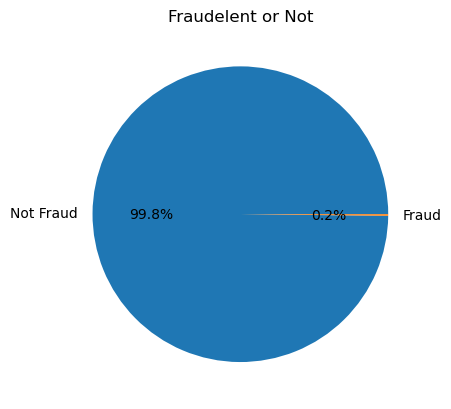

In [8]:
plt.title("Fraudelent or Not")
plt.pie(data['Class'].value_counts(),labels=['Not Fraud','Fraud'],autopct='%1.1f%%')
plt.show()

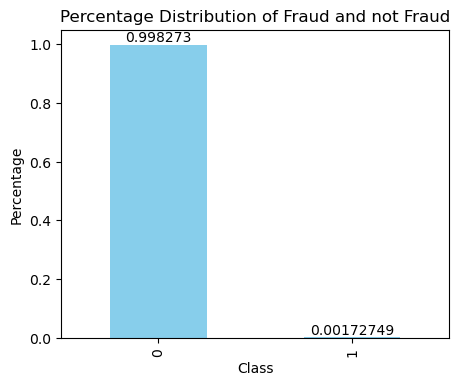

In [9]:
plt.figure(figsize=(5,4))
ax=data['Class'].value_counts(normalize = True).plot.bar(color=['skyblue','skyblue'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Percentage Distribution of Fraud and not Fraud')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

<b><font color="black" style="font-family:cambria; font-size:15px">
<strong>Note:</strong> Observe the strong imbalance in our dataset: the majority of transactions are <span style="color:#2E8B57">non-fraudulent</span>. Using this dataset without adjustments could lead to inaccurate predictions, as models might <span style="color:#DC143C">overfit</span> by assuming most transactions are genuine. Our goal is not for the model to "assume" but to <span style="color:#4169E1">identify patterns</span> that indicate fraud!
</font></b>


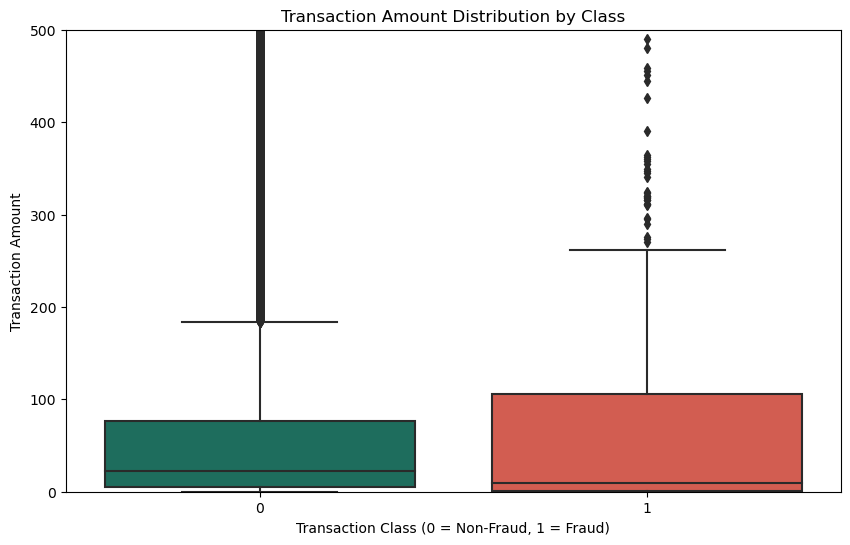

In [10]:
plt.figure(figsize=(10, 6))

# Box plot for transaction amount by class
sns.boxplot(x='Class', y='Amount', data=data, palette=['#117A65', '#E74C3C'])
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.ylim(0, 500) 
plt.show()

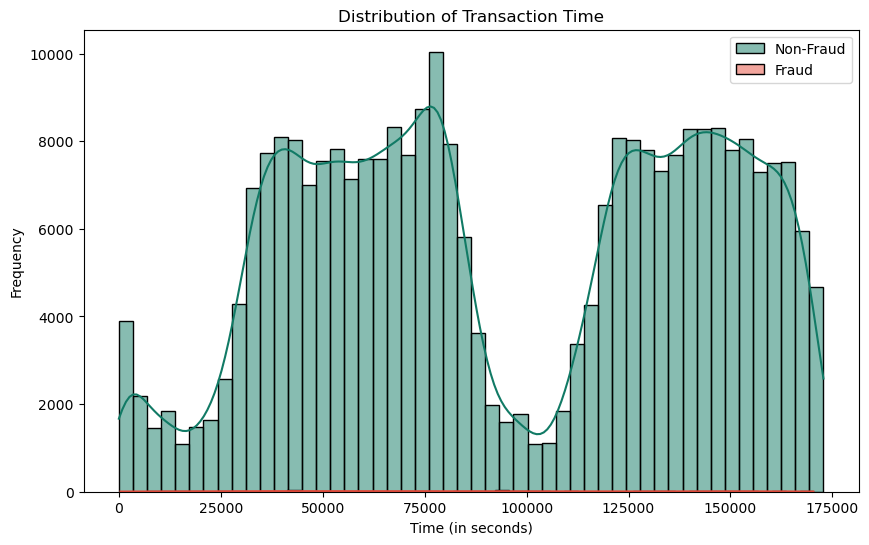

In [11]:
plt.figure(figsize=(10, 6))

# Plot distribution of transaction time by class
sns.histplot(data[data['Class'] == 0]['Time'], color='#117A65', label='Non-Fraud', kde=True, bins=50)
sns.histplot(data[data['Class'] == 1]['Time'], color='#E74C3C', label='Fraud', kde=True, bins=50)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

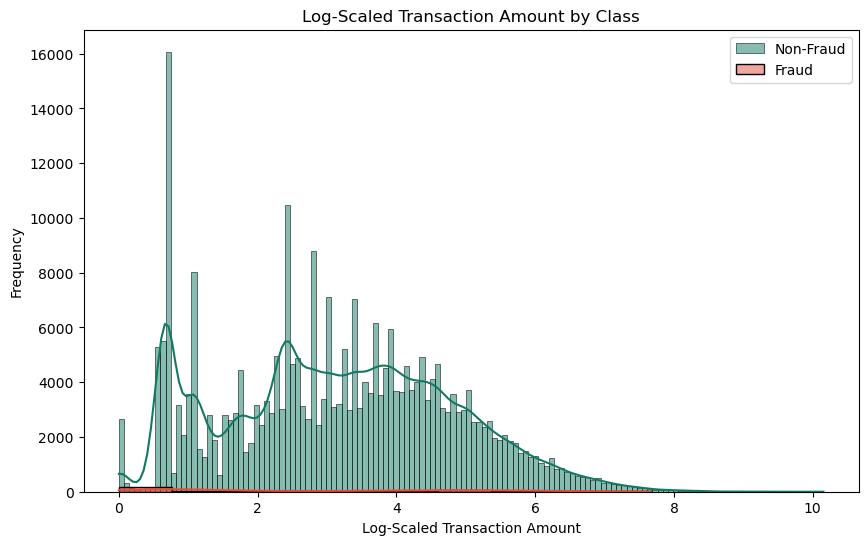

In [12]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(data[data['Class'] == 0]['Amount']), color='#117A65', label='Non-Fraud', kde=True)
sns.histplot(np.log1p(data[data['Class'] == 1]['Amount']), color='#E74C3C', label='Fraud', kde=True)
plt.title('Log-Scaled Transaction Amount by Class')
plt.xlabel('Log-Scaled Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [13]:
fraud=data[data['Class']==1]
no_fraud=data[data['Class']==0]

In [14]:
fraud.shape,no_fraud.shape

((492, 31), (284315, 31))

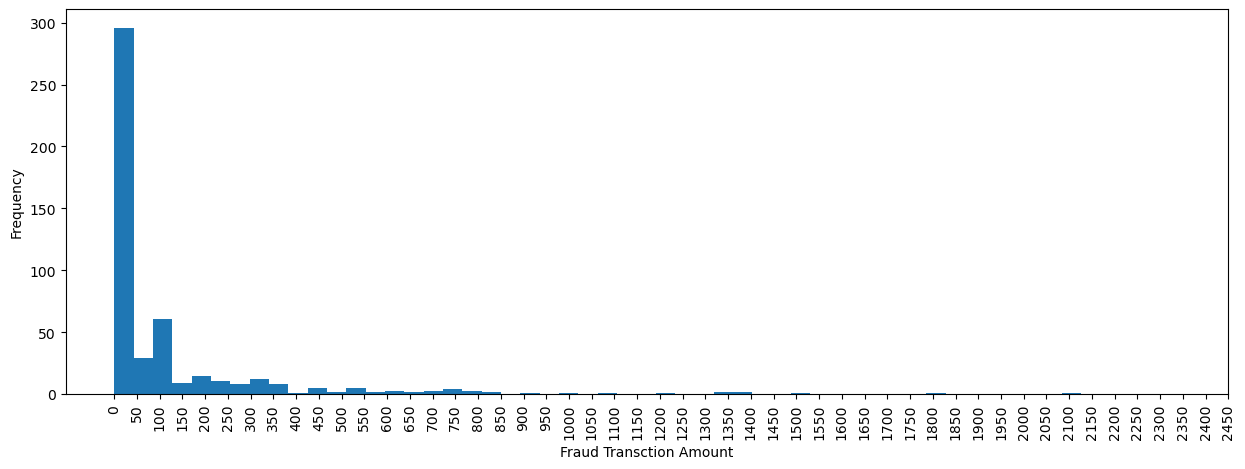

In [15]:
plt.figure(figsize=(15,5))
plt.hist(fraud['Amount'],bins=50)
plt.xticks(range(0, 2500, 50), rotation=90)
plt.xlabel('Fraud Transction Amount')
plt.ylabel('Frequency')
plt.show()

### Key Insights from the Plot Analysis

Observing the plot reveals interesting trends in fraud incidents based on transaction amounts:

- **High Frequency of Fraud for Smaller Amounts**: Transactions **below 50 Rupees** show the **highest fraud occurrence**.
- **Moderate Fraud Cases for Mid-Range Amounts**: A significant number of fraud incidents also occur within the **100 to 350 Rupees range**.
- **Rare Frauds for Large Amounts**: Fraud incidents involving **very large amounts** are rare but still present.

These insights provide guidance for developing targeted strategies in fraud detection across varying transaction sizes.


In [16]:
data_corr=pd.DataFrame(data.corr()['Class'].sort_values(ascending=False)).rename(columns={'Class':'Correlation'})


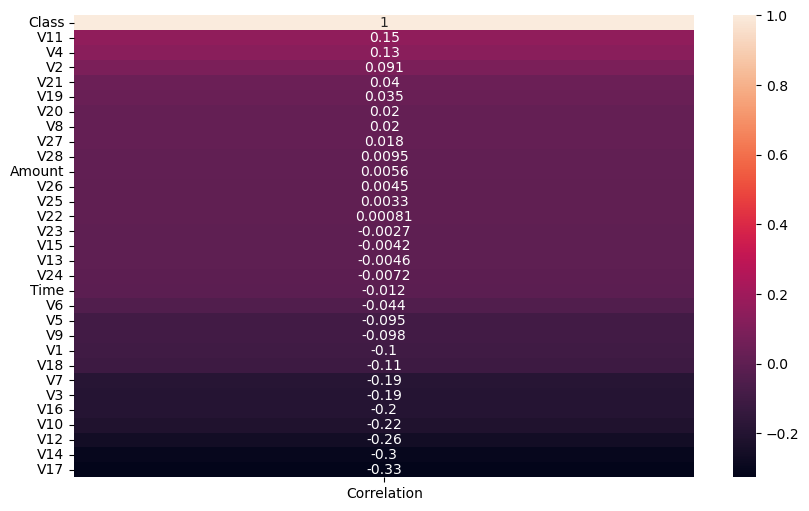

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data_corr,annot=True)
plt.show()

In [18]:
cols=list(data.columns.values)

In [19]:
print(cols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


<b><font color=black style = 'font-family:cambria; font-size:18px'> Plotting All The Variables And Seeing Wheather They Are Fraud or Not Fraud</font><b><br>
 

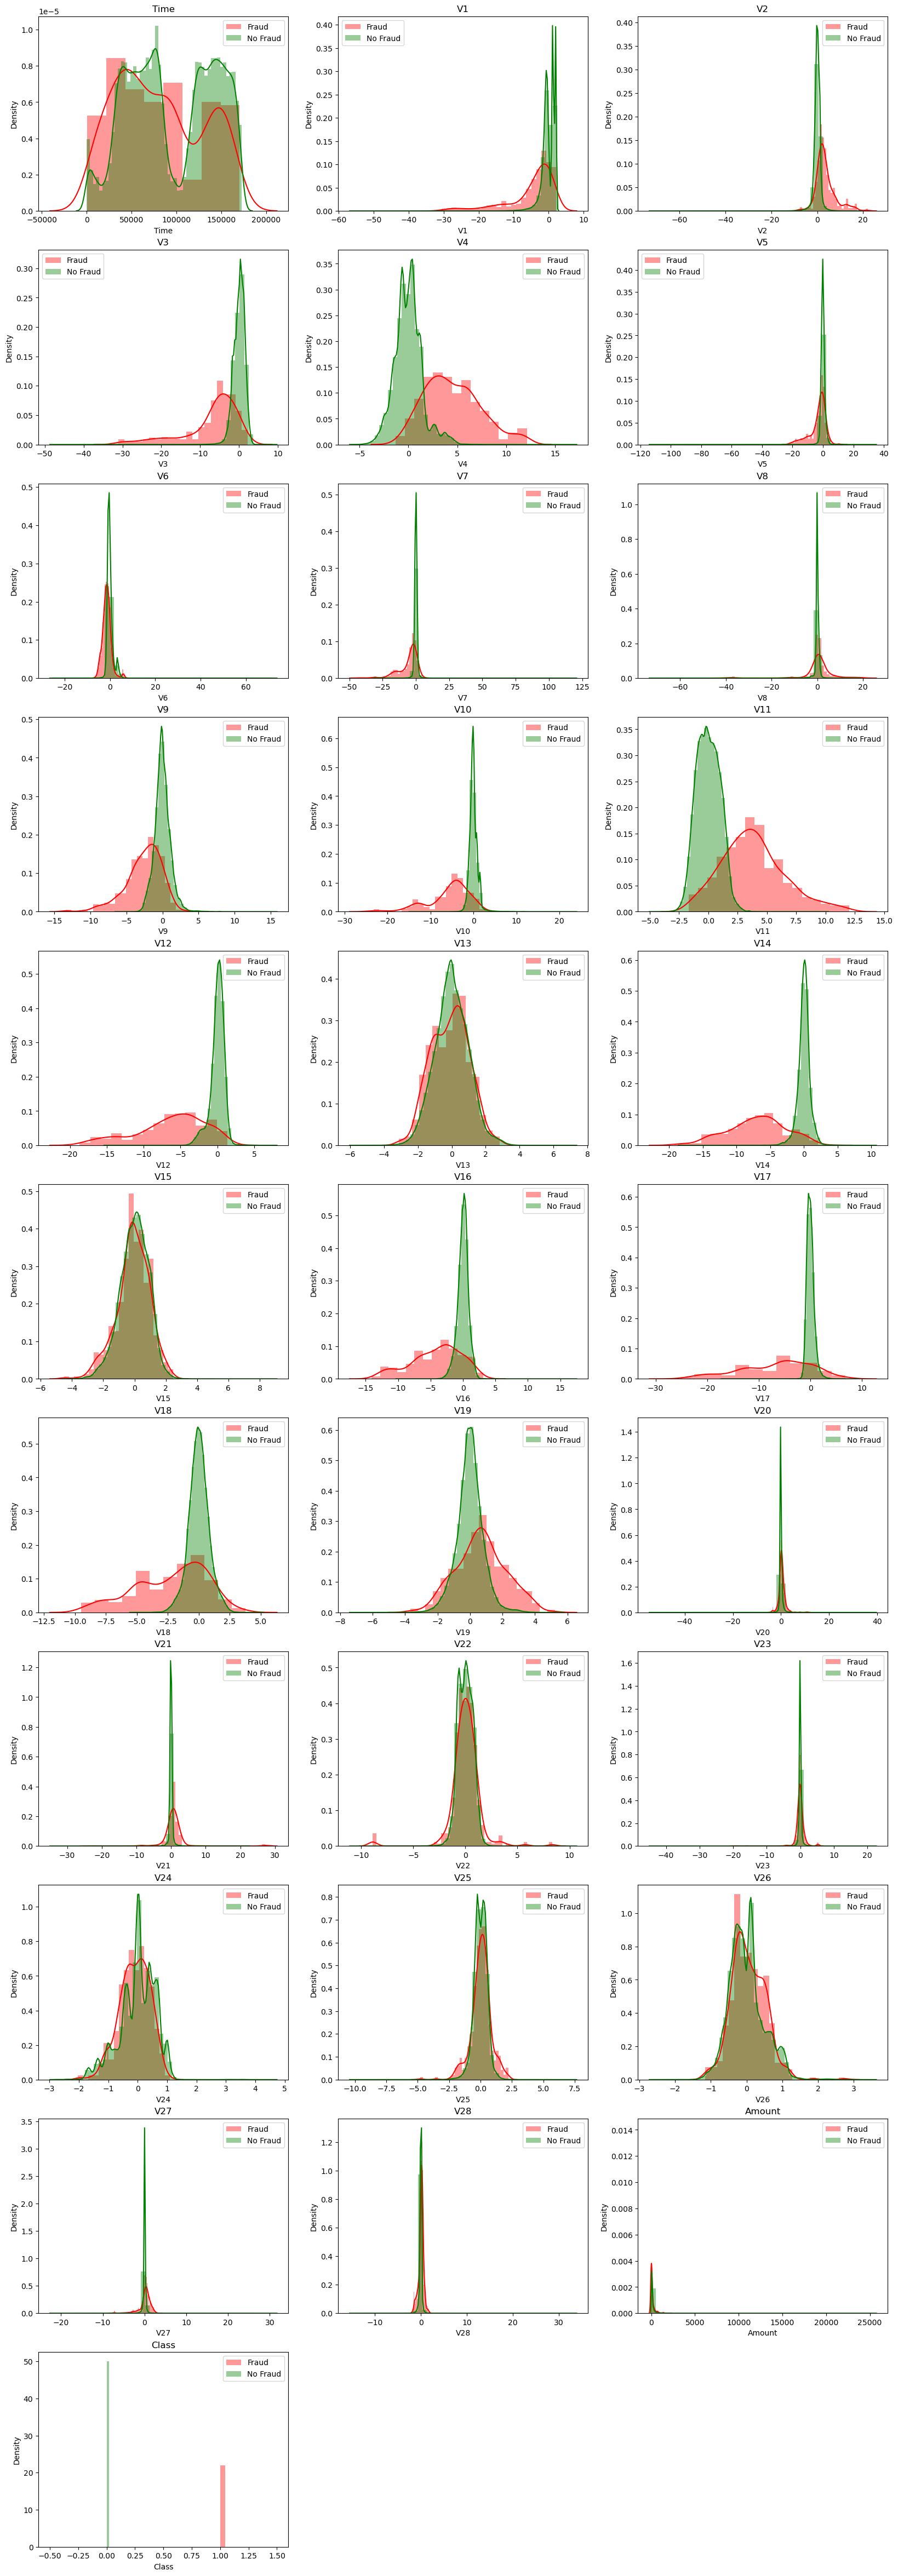

In [20]:
plt.figure(figsize=(20,60))

for i,j in enumerate(cols):
    plt.subplot(11,3,i+1)
    sns.distplot(data[j][data.Class==1],color='red',label='Fraud')
    sns.distplot(data[j][data.Class==0],color='green',label='No Fraud')
    plt.legend()
    plt.title(j)
plt.show()

<b style="color: brown; font-family: 'Georgia', serif; font-size: 20px;"> Step 4: Model selection and Train-Test split</b>

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=data.drop(['Class'],axis=1)

In [23]:
y=data['Class']

In [24]:
X.shape

(284807, 30)

In [25]:
y.shape

(284807,)

In [26]:
X.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   

   Amount  
0  149.62  
1    2.69

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

<b><font color=black style = 'font-family:cambria; font-size:15px'>Splitting The Data Into `Train_Test_split` </font><b>

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=21)

In [29]:
print('The Shape Of The X_train Is',X_train.shape)
print('The Shape Of The X_test Is',X_test.shape)
print('The Shape Of The y_train Is',y_train.shape)
print('The Shape Of The y_test Is',y_test.shape)

The Shape Of The X_train Is (227845, 30)
The Shape Of The X_test Is (56962, 30)
The Shape Of The y_train Is (227845,)
The Shape Of The y_test Is (56962,)


**Feature Scaling**


We only need to scale the `Amount`,`Time` columns since the other columns are already scaled using PCA.



Feature scaling is important because it ensures that all features are on a similar scale, preventing models from being biased toward features with larger numerical ranges. It improves the convergence speed and accuracy of algorithms

In [30]:
scaler=StandardScaler()

##### Scaling The Train Data

In [31]:
# before scaling
X_train.head()

Time        V1        V2        V3        V4        V5        V6  \
1865      1441.0 -0.568089  0.223634  2.784809  1.398554 -0.976417  1.181462   
47141    43099.0  1.005389 -0.382836  1.280514  1.682977 -0.950041  0.752944   
155271  104967.0 -3.633303 -1.481175  0.094030 -0.287921 -0.630724  0.531253   
250359  154865.0 -0.111852  0.255704  1.589792 -0.007662 -0.400043  0.183738   
234143  147846.0 -3.063601  2.554788 -0.294903 -1.092867 -0.770817 -0.987801   

              V7        V8        V9       V10       V11       V12       V13  \
1865   -0.350213  0.544987  0.184840 -0.298910  1.063224  0.987810  0.106468   
47141  -0.764272  0.535072  1.297392 -0.189560  0.413669  0.613984 -2.502414   
155271  1.667692 -0.881678  3.188153  0.232909  0.108605 -2.586208  1.941486   
250359 -0.123587 -0.053031  1.720502 -1.091077 -1.173797  0.899706  1.035325   
234143 -0.270569  0.883005  1.513483  0.350049 -0.754589  0.019737 -0.411277   

             V14       V15       V16       V17       V18       V19       V20  \
1865   -0.464711 -0.032505 -0.387102  0.141813  0.633135  0.515119  0.200905   
47141  -0.110522 -2.186754 -0.909957  0.719510 -0.664504  0.398578 -0.324470   
155271  0.329011 -0.096898  0.291858 -0.170605  0.273648 -0.358689 -1.484212   
250359 -3.069098 -2.081416 -0.079278  0.861474 -0.010396  0.058697 -0.043861   
234143 -1.240001  0.562413  0.631872  0.715448  0.330676 -0.503271  0.399471   

             V21       V22       V23       V24       V25       V26       V27  \
1865    0.434369  1.419537  0.025451  0.259867 -0.494201 -0.114422  0.237891   
47141  -0.369828 -0.745843  0.115125  0.161388  0.293618 -0.532962  0.072516   
155271 -0.662555  0.624292 -0.853519  0.725182 -0.153942 -0.000339 -0.042111   
250359 -0.140866  0.232427 -0.068752  0.039753 -0.629515  0.449097 -0.340204   
234143 -0.342669 -0.687045  0.222549 -0.183433  0.065646 -0.250951  0.383166   

             V28  Amount  
1865    0.169842   82.74  
47141   0.017359   18.58  
155271  1.383515  500.00  
250359 -0.168181   14.84  
234143  0.480414    1.54

In [32]:
X_train[['Time','Amount']]=scaler.fit_transform(X_train[['Time','Amount']])

In [33]:
# after scaling
X_train.head(4)

Time        V1        V2        V3        V4        V5        V6  \
1865   -1.966629 -0.568089  0.223634  2.784809  1.398554 -0.976417  1.181462   
47141  -1.089159  1.005389 -0.382836  1.280514  1.682977 -0.950041  0.752944   
155271  0.214008 -3.633303 -1.481175  0.094030 -0.287921 -0.630724  0.531253   
250359  1.265042 -0.111852  0.255704  1.589792 -0.007662 -0.400043  0.183738   

              V7        V8        V9       V10       V11       V12       V13  \
1865   -0.350213  0.544987  0.184840 -0.298910  1.063224  0.987810  0.106468   
47141  -0.764272  0.535072  1.297392 -0.189560  0.413669  0.613984 -2.502414   
155271  1.667692 -0.881678  3.188153  0.232909  0.108605 -2.586208  1.941486   
250359 -0.123587 -0.053031  1.720502 -1.091077 -1.173797  0.899706  1.035325   

             V14       V15       V16       V17       V18       V19       V20  \
1865   -0.464711 -0.032505 -0.387102  0.141813  0.633135  0.515119  0.200905   
47141  -0.110522 -2.186754 -0.909957  0.719510 -0.664504  0.398578 -0.324470   
155271  0.329011 -0.096898  0.291858 -0.170605  0.273648 -0.358689 -1.484212   
250359 -3.069098 -2.081416 -0.079278  0.861474 -0.010396  0.058697 -0.043861   

             V21       V22       V23       V24       V25       V26       V27  \
1865    0.434369  1.419537  0.025451  0.259867 -0.494201 -0.114422  0.237891   
47141  -0.369828 -0.745843  0.115125  0.161388  0.293618 -0.532962  0.072516   
155271 -0.662555  0.624292 -0.853519  0.725182 -0.153942 -0.000339 -0.042111   
250359 -0.140866  0.232427 -0.068752  0.039753 -0.629515  0.449097 -0.340204   

             V28    Amount  
1865    0.169842 -0.022345  
47141   0.017359 -0.276484  
155271  1.383515  1.630434  
250359 -0.168181 -0.291298

##### Scaling The Test Data

In [34]:
# before scaling
X_test.head(4)

Time        V1        V2        V3        V4        V5        V6  \
234721  148082.0  1.946305 -0.511462 -0.458261  0.395096 -0.300224  0.525437   
151554   95669.0 -7.290632  5.392193 -2.101657 -1.565481 -0.693676 -0.338955   
46794    42928.0  1.134607  0.130074  0.380272  1.409226 -0.197326 -0.183836   
163972  116356.0  1.798070 -0.885743 -1.175621  0.143376 -0.160843  0.160874   

              V7        V8        V9       V10       V11       V12       V13  \
234721 -0.690892  0.264120  1.489920 -0.175138  0.080315  1.299188 -0.214589   
151554  0.454925  0.384947  7.012826  7.421964 -0.164766 -2.023180  1.436729   
46794   0.062061  0.003161  0.348476 -0.120379 -0.603154  0.321578 -0.520735   
163972 -0.273504 -0.058693  1.440568 -0.319191 -1.712946  0.483158  0.597202   

             V14       V15       V16       V17       V18       V19       V20  \
234721 -0.247069 -1.469201 -0.125424 -0.416573  0.011794  0.885008 -0.206689   
151554 -1.038882 -2.237434 -1.355986  0.577715 -1.058369 -0.299684  2.971650   
46794   0.147355 -0.048961 -0.702694  0.286478 -0.926894 -0.369999 -0.183884   
163972 -0.321330 -0.073569 -0.083363 -0.516619  0.156476  0.329231  0.142970   

             V21       V22       V23       V24       V25       V26       V27  \
234721 -0.352712 -0.744355  0.353720  0.312596 -0.309885 -0.683268  0.036474   
151554 -1.552659 -1.296349  0.298171  0.433301  1.322267  0.032207  1.585013   
46794  -0.096954 -0.096690 -0.070878  0.084917  0.644266 -0.313145  0.034390   
163972  0.216608  0.628998 -0.137847  0.116018  0.133029  0.219625 -0.027029   

             V28  Amount  
234721 -0.040600    9.59  
151554  0.977621    0.01  
46794   0.017891   23.86  
163972 -0.026418  148.99

In [35]:
X_test[['Time','Amount']]=scaler.fit_transform(X_test[['Time','Amount']])

In [36]:
# after scaling
X_test.head()

Time        V1        V2        V3        V4        V5        V6  \
234721  1.119915  1.946305 -0.511462 -0.458261  0.395096 -0.300224  0.525437   
151554  0.017407 -7.290632  5.392193 -2.101657 -1.565481 -0.693676 -0.338955   
46794  -1.092001  1.134607  0.130074  0.380272  1.409226 -0.197326 -0.183836   
163972  0.452558  1.798070 -0.885743 -1.175621  0.143376 -0.160843  0.160874   
211004  0.912405 -1.092804 -0.140712  0.608619 -2.621535  0.095963  0.487388   

              V7        V8        V9       V10       V11       V12       V13  \
234721 -0.690892  0.264120  1.489920 -0.175138  0.080315  1.299188 -0.214589   
151554  0.454925  0.384947  7.012826  7.421964 -0.164766 -2.023180  1.436729   
46794   0.062061  0.003161  0.348476 -0.120379 -0.603154  0.321578 -0.520735   
163972 -0.273504 -0.058693  1.440568 -0.319191 -1.712946  0.483158  0.597202   
211004 -0.482433  0.700699 -1.178947 -0.196379 -0.269245  0.004373  1.236105   

             V14       V15       V16       V17       V18       V19       V20  \
234721 -0.247069 -1.469201 -0.125424 -0.416573  0.011794  0.885008 -0.206689   
151554 -1.038882 -2.237434 -1.355986  0.577715 -1.058369 -0.299684  2.971650   
46794   0.147355 -0.048961 -0.702694  0.286478 -0.926894 -0.369999 -0.183884   
163972 -0.321330 -0.073569 -0.083363 -0.516619  0.156476  0.329231  0.142970   
211004 -0.359932 -0.817803  2.171112 -0.834646 -0.027426  0.308520  0.385637   

             V21       V22       V23       V24       V25       V26       V27  \
234721 -0.352712 -0.744355  0.353720  0.312596 -0.309885 -0.683268  0.036474   
151554 -1.552659 -1.296349  0.298171  0.433301  1.322267  0.032207  1.585013   
46794  -0.096954 -0.096690 -0.070878  0.084917  0.644266 -0.313145  0.034390   
163972  0.216608  0.628998 -0.137847  0.116018  0.133029  0.219625 -0.027029   
211004  0.491765  1.098492 -0.283557 -0.300498  0.308604 -0.115833  0.211657   

             V28    Amount  
234721 -0.040600 -0.326916  
151554  0.977621 -0.366744  
46794   0.017891 -0.267589  
163972 -0.026418  0.252633  
211004  0.057599 -0.117338

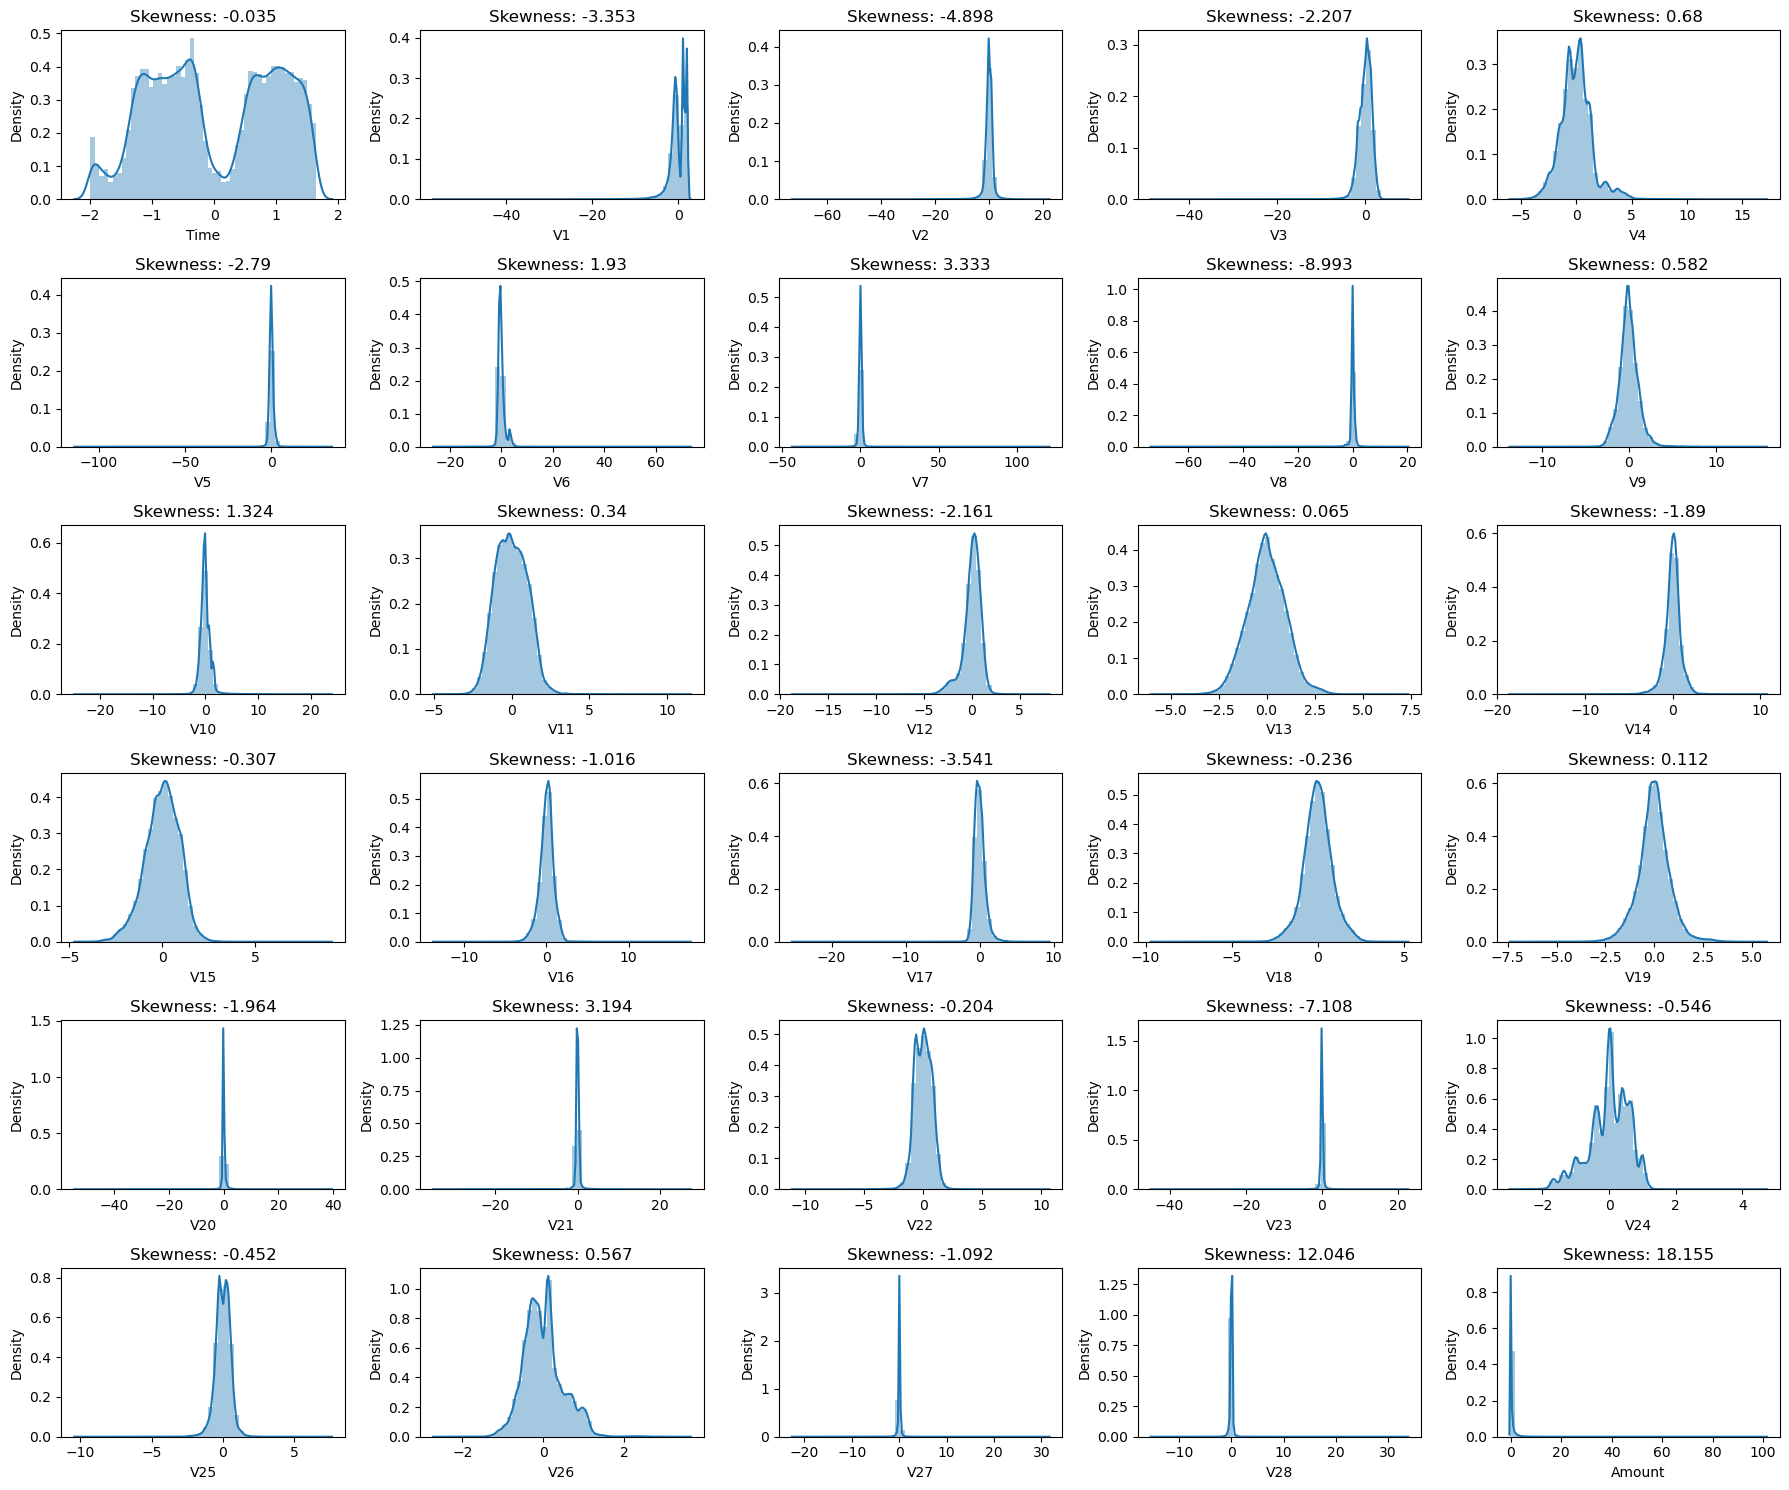

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))
k = 0
num_plots = len(cols) - 1  # Adjust number of subplots to fit the number of features

for i in cols[:-1]:
    k += 1
    if k > num_plots:  # Prevent excess subplot creation
        break
    plt.subplot(6, 5, k)
    sns.distplot(X_train[i], kde=True)  # `kde=True` for smoothness in distribution plot
    plt.tight_layout()
    plt.title(f'Skewness: {round(X_train[i].skew(), 3)}')

plt.show()

<font color="teal" style="font-family: cambria; font-size: 18px"><b>Handling Skewness in Data</b></font>

> <font color="brown" style="font-family: cambria; font-size: 16px"><b>Observation:</b> The dataset displays significant skewness, which may introduce biases in model training. Many features are heavily skewed, so reducing skewness is crucial for achieving a more balanced distribution.</font>

<font color="teal" style="font-family: cambria; font-size: 16px"><b>Effective Methods to Address Skewness:</b></font>

1. **Log Transformation** - Compresses the data range by applying a logarithmic function.
2. **Square Root Transformation** - Reduces high values in right-skewed data.
3. **Cube Root Transformation** - A moderate transformation for handling skewness.
4. **Box-Cox Transformation** - Approximates a normal distribution; best for positive values.
5. **Yeo-Johnson Transformation** - Extends Box-Cox to support negative values.
6. **Power Transformation** - Applies power functions to balance data and normalize distributions.
7. **Winsorizing** - Limits extreme values, reducing the impact of outliers.
8. **Binning/Discretization** - Groups data into intervals for balance.
9. **Square or Cube Transformation** - Adjusts for both right and left skewness.

<font color="brown" style="font-family: cambria; font-size: 15px">For this dataset, we use **Power Transformation** as it helps to stabilize variance, making the data more suitable for machine learning models and enhancing accuracy and reliability.</font>


In [38]:
# import power transformation 
from sklearn.preprocessing import PowerTransformer

In [39]:
pt=PowerTransformer(method='yeo-johnson',standardize=True,copy=False)

In [40]:
columns=X_train.columns

In [41]:
X_train=pt.fit_transform(X_train)

In [42]:
X_train=pd.DataFrame(X_train)
X_train.columns=columns
X_train.head(3)

Time        V1        V2        V3        V4        V5        V6  \
0 -1.956747 -0.560373  0.061289  2.445683  0.997344 -0.710176  0.936322   
1 -1.088335  0.468098 -0.326726  0.905905  1.170356 -0.691455  0.655243   
2  0.210075 -1.653454 -0.946734 -0.087467 -0.133325 -0.464170  0.502381   

         V7        V8        V9       V10       V11       V12       V13  \
0 -0.280283  0.493499  0.221513 -0.239960  1.040326  1.169566  0.117367   
1 -0.614782  0.482406  1.161519 -0.134062  0.443925  0.602914 -2.563695   
2  1.340689 -0.862715  2.610628  0.261050  0.152085 -2.106569  1.927039   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.557060 -0.093794 -0.511224  0.136780  0.751316  0.638751  0.255774   
1 -0.196994 -2.196741 -1.051594  0.870802 -0.799497  0.497534 -0.423271   
2  0.291466 -0.163858  0.276026 -0.240993  0.311031 -0.432050 -1.909666   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.608670  2.009481  0.027605  0.362065 -0.954775 -0.154294  0.585014   
1 -0.503317 -1.026328  0.173679  0.182528  0.542497 -1.166145  0.168689   
2 -0.924370  0.857399 -1.353885  1.286390 -0.333318  0.093840 -0.116109   

        V28    Amount  
0  0.526274  0.858497  
1  0.064930 -0.465018  
2  3.988726  2.007782

In [43]:
X_test=pt.transform(X_test)

In [44]:
X_test=pd.DataFrame(X_test)
X_test.columns=columns
X_test.head()

Time        V1        V2        V3        V4        V5        V6  \
0  1.121163  1.336134 -0.403775 -0.456701  0.352977 -0.227467  0.498291   
1  0.013221 -2.548065  4.483300 -1.341837 -1.160050 -0.509079 -0.172566   
2 -1.091153  0.577595 -0.001636  0.129205  1.003899 -0.153414 -0.041573   
3  0.449414  1.188995 -0.620382 -0.870903  0.179783 -0.127112  0.232202   
4  0.911988 -0.794646 -0.177250  0.313524 -2.084912  0.058796  0.471423   

         V7        V8        V9       V10       V11       V12       V13  \
0 -0.555461  0.187938  1.315829 -0.120199  0.124530  1.687890 -0.206057   
1  0.368137  0.317128  5.268013  5.715079 -0.118246 -1.778214  1.433955   
2  0.052112 -0.078240  0.366359 -0.067794 -0.568615  0.205717 -0.516852   
3 -0.218380 -0.138533  1.276457 -0.259748 -1.775285  0.419960  0.606679   
4 -0.387034  0.670460 -1.106013 -0.140626 -0.223855 -0.174459  1.237160   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.338856 -1.536908 -0.221873 -0.528777 -0.004755  1.084499 -0.271443   
1 -1.096821 -2.242306 -1.483321  0.686996 -1.252063 -0.358829  3.887407   
2  0.083661 -0.111770 -0.842498  0.316676 -1.101672 -0.446099 -0.242021   
3 -0.414327 -0.138558 -0.173858 -0.643830  0.169151  0.413305  0.180659   
4 -0.453128 -0.908382  2.951735 -1.003084 -0.051631  0.388118  0.495631   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.478930 -1.024355  0.567334  0.460644 -0.622168 -1.565079  0.078790   
1 -2.242412 -1.748823  0.475079  0.692474  2.776880  0.162273  4.148816   
2 -0.118034 -0.152527 -0.128042  0.047377  1.274228 -0.615703  0.073602   
3  0.314381  0.864115 -0.235500  0.101883  0.219984  0.537872 -0.078821   
4  0.685546  1.540545 -0.467382 -0.576573  0.573024 -0.157441  0.518571   

        V28    Amount  
0 -0.112666 -0.870143  
1  2.863481 -1.232189  
2  0.066556 -0.399340  
3 -0.069093  1.453356  
4  0.187482  0.483441

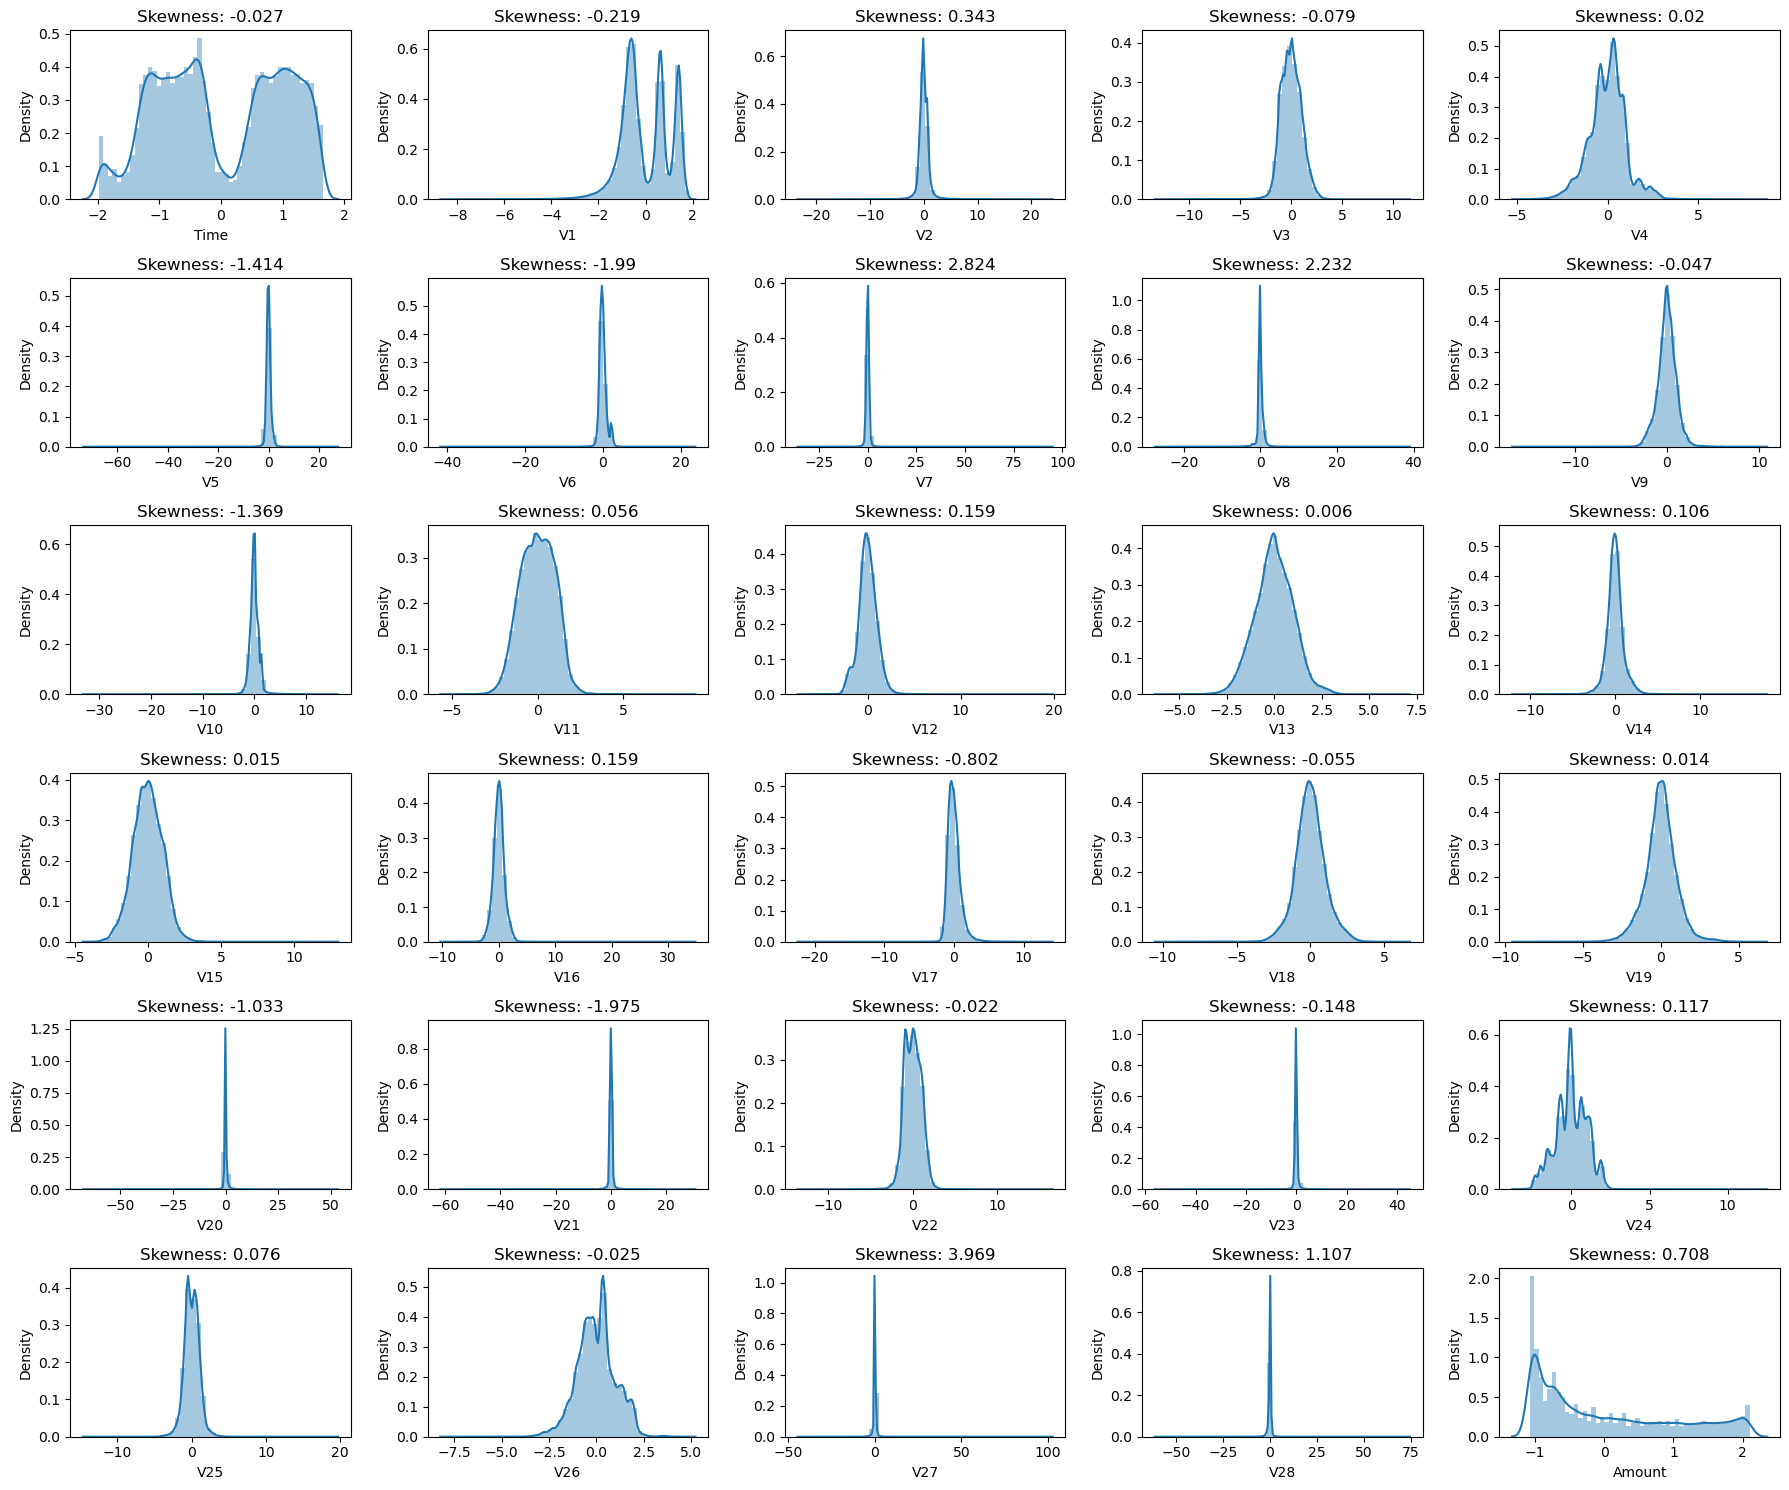

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))
num_plots = min(len(cols) - 1, 30)  # Limit to 30 subplots to fit 6x5 grid

for k, i in enumerate(cols[:-1][:num_plots]):  # Limit loop to `num_plots`
    plt.subplot(6, 5, k + 1)  # Using `k + 1` here as `k` starts from 0
    sns.distplot(X_train[i], kde=True)  # `kde=True` for a smoother plot
    plt.tight_layout()
    plt.title(f'Skewness: {round(X_train[i].skew(), 3)}')

plt.show()


<font color="brown" style="font-family:cambria; font-size:15px">

**Skewness Adjustment**: Power transformations are used to **reduce or eliminate skewness** in data, addressing any asymmetry within the distribution. **After transformation**, the data becomes **more balanced and symmetric**, which is ideal for analysis.

<br>

**Normalization**: These transformations also help shape the data to **closely resemble a normal distribution**, supporting **statistical and machine learning techniques** that rely on normality assumptions for optimal performance.

</font>

<br>

<font color="black" style="font-family:cambria; font-size:15px">

**• Observation**: With these transformations applied, we observe that **all variables now appear to follow a normal distribution** in the plots, enhancing both model accuracy and interpretability.

</font>



<b><font color="black" style="font-family:Verdana; font-size:20px">Model Selection and Key Insights:</font></b>
<hr style="height:1px">

<font color="green" style="font-family:Cambria; font-size:15px">

- **Logistic Regression**: Ideal when **data is linearly separable**, offering clear and interpretable outputs.
- **K-Nearest Neighbors (KNN)**: Though **interpretable and intuitive**, KNN is inefficient with large datasets due to **high memory and computation costs**.
- **Decision Trees**: Often chosen for their intuitive results, yet they can **overfit easily** without constraints.
- **KNN Voting Mechanism**: Works best with **odd k-values** to ensure clear majority decisions from neighboring data points.
- **Gradient Boosting**: Iteratively enhances predictions by **minimizing previous errors**.
- **XGBoost**: Expands on gradient boosting by incorporating **regularization and parallel processing**, leading to faster, more accurate outcomes.

</font>

<font color="teal" style="font-family:Cambria; font-size:15px"> Given our large dataset of **284,807 records**, KNN isn't practical as it requires substantial memory for all data points and is computationally heavy. </font>

<b><font color="green" style="font-family:Cambria; font-size:20px">Step 5: Model Performance Assessment on Imbalanced Data</font></b>
<hr style="height:1px">

<b><font color="black" style="font-family:Cambria; font-size:17px">1. Managing Imbalanced Data:</font></b><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">For datasets with only **0.17% fraudulent transactions**, selecting metrics that assess **minority class performance** is essential for reliable evaluation.</font>

<b><font color="black" style="font-family:Cambria; font-size:17px">2. Limitations of Accuracy:</font></b><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Relying on **accuracy** alone in imbalanced cases can be misleading, as high accuracy often reflects a bias toward the majority class rather than effective fraud detection.</font>

<b><font color="black" style="font-family:Cambria; font-size:17px">3. Emphasizing ROC-AUC for Balanced Assessment:</font></b><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">The **ROC-AUC score** provides a balanced measure by evaluating how well the model can **differentiate between positive and negative classes**.</font>

<b><font color="black" style="font-family:Cambria; font-size:17px">4. Leveraging the ROC Curve:</font></b><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Using the **ROC curve** enables a visual representation of the model’s **sensitivity and specificity** across different threshold settings, aiding in robust assessment.</font>

<b><font color="black" style="font-family:Cambria; font-size:17px">5. Choosing an Optimal Threshold:</font></b><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">Rather than the typical 0.5 threshold, a custom threshold is selected to **maximize true positives** and minimize **false positives**, thereby enhancing predictive accuracy.</font>

<b><font color="black" style="font-family:Cambria; font-size:17px">6. Calculating F1 Score for Balanced Performance:</font></b><br>
- <font color="brown" style="font-family:Cambria; font-size:15px">After threshold optimization, the **F1 Score** provides a balanced view of **precision and recall**, ensuring a thorough evaluation of model performance on critical classes.</font>


<center><b><font color=black style = 'font-family:cambria; font-size:25px'> Logistic Regression</font><b><center>

In [46]:
# importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [47]:
# creating k fold with 5 splits
folds = KFold(n_splits=5, random_state=4, shuffle=True)

# Specifying score as recall as we are more focused on achieving higher sensitivity
params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Using 'recall' as the scoring metric
model_cv = GridSearchCV(estimator=LogisticRegression(), 
                        param_grid=params, 
                        scoring='recall',  # Use 'recall' as the scoring metric
                        cv=folds, 
                        verbose=1, 
                        return_train_score=True)

In [48]:
# fitting the model
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [49]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.475929      0.072310         0.030397        0.003003    0.01   
1       0.457229      0.021534         0.040977        0.004876     0.1   
2       0.450775      0.035883         0.040672        0.005358       1   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.602740           0.589744           0.556962   
1   {'C': 0.1}           0.630137           0.602564           0.594937   
2     {'C': 1}           0.630137           0.615385           0.632911   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.655172           0.636364         0.608196        0.034628   
1           0.712644           0.662338         0.640524        0.043137   
2           0.712644           0.623377         0.642891        0.035398   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.635514            0.585443   
1                5            0.666667            0.623418   
2                1            0.669782            0.639241   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.580952            0.596091            0.618297   
1            0.641270            0.644951            0.656151   
2            0.644444            0.644951            0.665615   

   mean_train_score  std_train_score  
0          0.603259         0.020654  
1          0.646491         0.014577  
2          0.652807         0.012393

In [50]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [51]:
cv_results[['param_C','rank_test_score','mean_train_score','mean_test_score']]

param_C  rank_test_score  mean_train_score  mean_test_score
0    0.01                6          0.603259         0.608196
1     0.1                5          0.646491         0.640524
2       1                1          0.652807         0.642891
3      10                1          0.652807         0.642891
4     100                1          0.653438         0.642891
5    1000                1          0.653438         0.642891

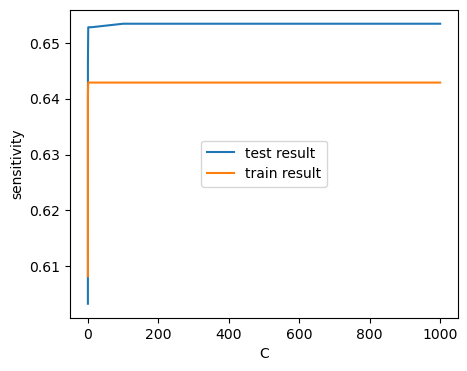

In [52]:
plt.figure(figsize=(5,4))
plt.plot(cv_results['param_C'],cv_results['mean_train_score'])
plt.plot(cv_results['param_C'],cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='center')
# plt.xscale('log')
plt.show()

In [53]:
# best score
best_score=model_cv.best_score_
# best params
best_params=model_cv.best_params_

In [54]:
print(f"The Best Score Is {best_score}")
print(f"The Best Params Is {best_params}")

The Best Score Is 0.6428906591257183
The Best Params Is {'C': 1}


In [55]:
logistic_=LogisticRegression(C=1)

In [56]:
# fiitting the model on train set
logistic_model1=logistic_.fit(X_train,y_train)

In [57]:
y_train_pred_logistic=logistic_model1.predict(X_train)

In [58]:
confusion_matrix_logistic_train=metrics.confusion_matrix(y_train,y_train_pred_logistic)

In [59]:
confusion_matrix_logistic_train

array([[227420,     31],
       [   138,    256]], dtype=int64)

In [60]:
TN = confusion_matrix_logistic_train[0,0] # True negative
FP = confusion_matrix_logistic_train[0,1] # False positive
FN = confusion_matrix_logistic_train[1,0] # False negative
TP = confusion_matrix_logistic_train[1,1] # True positive



In [61]:
def calculation_metrics(TN,FP,FN,TP,):
    c=TP / float(TP+FN)
    print('The Sensitivity  is :' ,c)
    
    d=TN / float(TN+FP)
    print('The Specificity  is :',d)
    
    
calculation_metrics(TN,FP,FN,TP)

The Sensitivity  is : 0.649746192893401
The Specificity  is : 0.9998637069083012


In [62]:
accuracy=metrics.accuracy_score(y_train,y_train_pred_logistic)
print('The Accuracy of Logistic Regression For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train,y_train_pred_logistic)
print("The F1-score of Logistic Regression For Train is :", F1_score)

The Accuracy of Logistic Regression For Train is : 0.9992582676819768
The F1-score of Logistic Regression For Train is : 0.7518355359765051


In [63]:
# classificatino report
print(classification_report(y_train,y_train_pred_logistic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.65      0.75       394

    accuracy                           1.00    227845
   macro avg       0.95      0.82      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [64]:
# predicted probability
y_train_pred_logistic_proba=logistic_model1.predict_proba(X_train)[:,1]

In [65]:
def draw_roc_curve(actual,probas):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probas,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probas)
#     plt.figure(figsize=(5,3))
    plt.plot(fpr,tpr,label='Roc curve (Area=%0.2f)'%auc_score)
    plt.plot((0,1))
    
#     -------------------------------
    plt.title('ROC CURVE',fontdict={'size':10,'color':'brown'})
    plt.xlim([-0.05,1.2])
    plt.ylim([0.0,1.2])
    plt.xlabel('FALSE POSITIVE RATE',fontdict={'size':10,'color':'red'})
    plt.ylabel('TRUE POSITIVE RATE',fontdict={'size':10,'color':'red'})
    plt.legend(loc='upper left')
    
    
    return

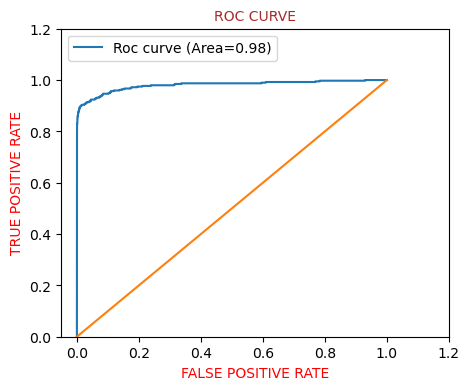

In [66]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train,y_train_pred_logistic_proba)

##### Let's Do Predictions On The Test Set

In [67]:
y_test_pred_logistic=logistic_model1.predict(X_test)

In [68]:
y_test_pred_logistic_proba=logistic_model1.predict_proba(X_test)[:,1]

In [69]:
confusion_matrix_logistic_test=confusion_matrix(y_test,y_test_pred_logistic)
confusion_matrix_logistic_test

array([[56853,    11],
       [   36,    62]], dtype=int64)

In [70]:
TN = confusion_matrix_logistic_test[0,0] # True negative
FP = confusion_matrix_logistic_test[0,1] # False positive
FN = confusion_matrix_logistic_test[1,0] # False negative
TP = confusion_matrix_logistic_test[1,1] # True positive

In [71]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.6326530612244898
The Specificity  is : 0.9998065559932471


In [72]:
    accuracy=metrics.accuracy_score(y_test,y_test_pred_logistic)
print('The Accuracy of Logistic Regression For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_logistic)
print("The F1-score of Logistic Regression For Test is :", F1_score)

The Accuracy of Logistic Regression For Test is : 0.9991748885221726
The F1-score of Logistic Regression For Test is : 0.7251461988304093


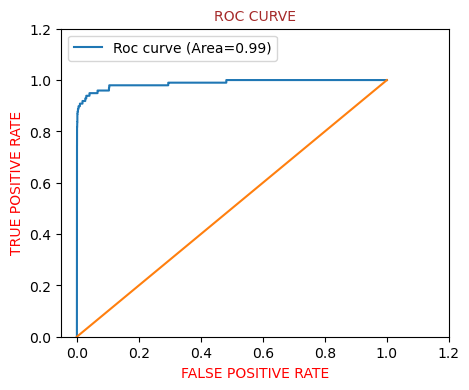

In [73]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_logistic_proba)

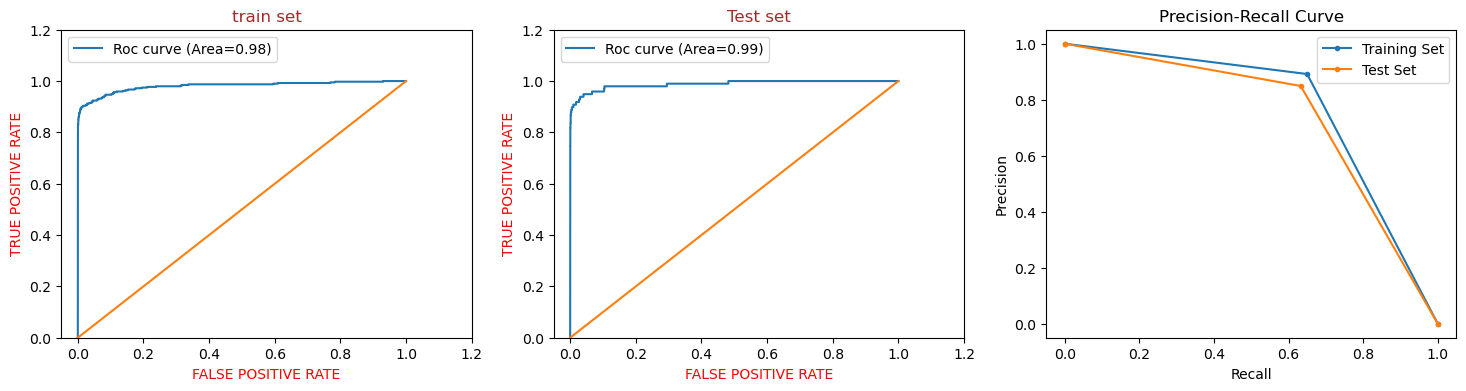

In [74]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train,y_train_pred_logistic_proba)
plt.title('train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_logistic_proba)
plt.title('Test set')


plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_logistic)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_logistic)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()

### Logistic Regression Model Performance Summary

| Metric                        | Training Set                     | Test Set                        |
|-------------------------------|-----------------------------------|---------------------------------|
| **Best Hyperparameter (C)**    | 1                                 | 1                               |
| **Best Recall (Sensitivity)**  | 0.6497                            | 0.6327                          |
| **Best Specificity**           | 0.9999                            | 0.9998                          |
| **Accuracy**                   | 99.93%                            | 99.92%                          |
| **F1-Score**                   | 0.7518                            | 0.7251                          |
| **Confusion Matrix**           | TN=227420, FP=31, FN=138, TP=256  | TN=56853, FP=11, FN=36, TP=62   |
| **Precision-Recall Curve**     | Plotted (Training Set)            | Plotted (Test Set)              |
| **ROC Curve AUC**              | High (closer to 1)                | High (closer to 1)              |

### Summary:
- **Recall (Sensitivity)** is fairly good, showing that the model is reasonably effective at identifying fraud in both training and test sets.
- **Specificity** is very high, indicating minimal false positives.
- The **F1-score** demonstrates a balanced performance between precision and recall, though there is room for improvement, particularly in terms of recall.
- **Confusion matrices** reveal that the model correctly identifies a vast majority of non-fraudulent transactions but misses some fraud cases, which is common in imbalanced datasets.


<center><b><font color=black style = 'font-family:cambria; font-size:25px'> XG Boost</font><b><center>

In [75]:
# !pip install xgboost

In [76]:
# importing Libraries
# !pip install xgboost
from xgboost import XGBClassifier

In [77]:
folds=3  #creating a KFold object
param_grid={'learning_rate':[0.2,0.6,0.8],'subsample':[0.3,0.6,0.9]}

# model creating
xgb_model=XGBClassifier(max_depth=2,n_estimators=200)


In [78]:
model_cv=GridSearchCV(estimator=xgb_model,
                      param_grid=param_grid,cv=folds,
                      scoring='roc_auc',verbose=1,return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6, 0.8],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [79]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.553027      0.222773         0.163812        0.007824   
1       4.648237      0.217798         0.174835        0.003959   
2       4.584842      0.302095         0.149773        0.014528   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.985331   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.985168   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.983280   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.958823           0.974203         0.972785        0.010868   
1           0.966389           0.980712         0.977423        0.008011   
2           0.969903           0.978769         0.977317        0.005557   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.999299            0.999812   
1                1            0.999942            0.999935   
2                2            0.999876            0.999833   

   split2_train_score  mean_train_score  std_train_score  
0            0.999689          0.999600         0.000219  
1            0.999956          0.999944         0.000009  
2            0.999933          0.999881         0.000041

In [80]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_subsample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [81]:
cv_results[['param_learning_rate', 'param_subsample','rank_test_score','mean_train_score','mean_test_score']]

param_learning_rate param_subsample  rank_test_score  mean_train_score  \
0                 0.2             0.3                5          0.999600   
1                 0.2             0.6                1          0.999944   
2                 0.2             0.9                2          0.999881   
3                 0.6             0.3                8          0.999981   
4                 0.6             0.6                6          1.000000   
5                 0.6             0.9                3          1.000000   
6                 0.8             0.3                9          0.999993   
7                 0.8             0.6                7          1.000000   
8                 0.8             0.9                4          1.000000   

   mean_test_score  
0         0.972785  
1         0.977423  
2         0.977317  
3         0.959511  
4         0.968934  
5         0.973811  
6         0.957660  
7         0.964242  
8         0.972887

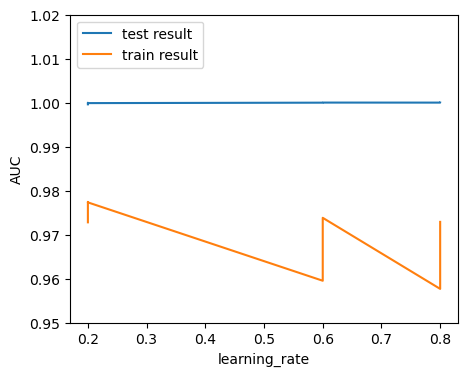

In [82]:
plt.figure(figsize=(5,4))
plt.plot(cv_results['param_learning_rate'],cv_results['mean_train_score'])
plt.plot(cv_results['param_learning_rate'],cv_results['mean_test_score'])
plt.xlabel('learning_rate')
plt.ylabel('AUC')
plt.legend(['test result', 'train result'], loc='upper left')
plt.ylim(0.95,1.02)
plt.show()

# plt.xscale('log')

In [83]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'learning_rate': 0.2, 'subsample': 0.6}
The Best score Is 0.9774228373889476


In [84]:
# chosen hyperparameters
# 'objective':'binary:logistic' which outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}



In [85]:
# fit model on training data
xgb_model1 = XGBClassifier(params = params)
xgb_model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

Top var = 15
2nd Top var = 11
3rd Top var = 13


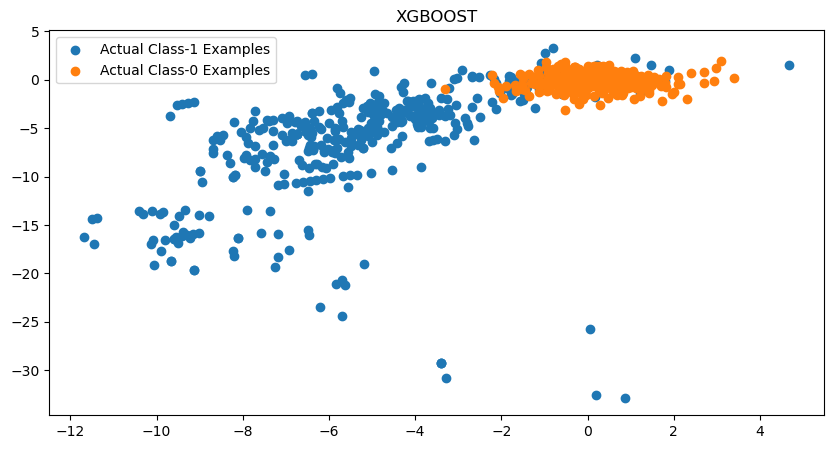

In [86]:
var_imp = []
for i in xgb_model1.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_model1.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_model1.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_model1.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_model1.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_model1.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('XGBOOST')
plt.legend()
plt.show()

In [87]:
y_train_pred_xgboost=xgb_model1.predict(X_train)

In [88]:
confusion_matrix_xgboost_train=metrics.confusion_matrix(y_train,y_train_pred_xgboost)

In [89]:
confusion_matrix_xgboost_train

array([[227451,      0],
       [     0,    394]], dtype=int64)

In [90]:
TN = confusion_matrix_xgboost_train[0,0] # True negative
FP = confusion_matrix_xgboost_train[0,1] # False positive
FN = confusion_matrix_xgboost_train[1,0] # False negative
TP = confusion_matrix_xgboost_train[1,1] # True positive

In [91]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 1.0
The Specificity  is : 1.0


In [92]:
print('The Accurays For The Train Set Of Xgboost is ',metrics.accuracy_score(y_train,y_train_pred_xgboost))
print('The F1-Score For The Train Set Of Xgboost is ',metrics.f1_score(y_train,y_train_pred_xgboost))

The Accurays For The Train Set Of Xgboost is  1.0
The F1-Score For The Train Set Of Xgboost is  1.0


In [93]:
# classificatino report
print(classification_report(y_train,y_train_pred_xgboost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [94]:
# predicted probability
y_train_pred_xgboost_proba=xgb_model1.predict_proba(X_train)[:,1]

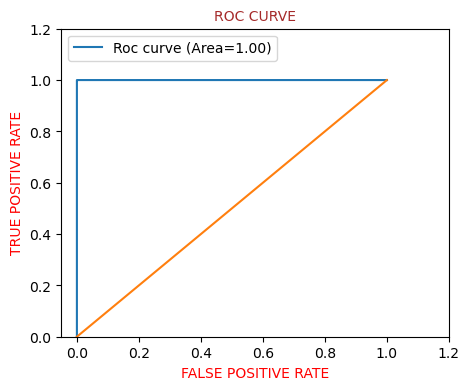

In [95]:
plt.figure(figsize=(5,4))

draw_roc_curve(y_train,y_train_pred_xgboost_proba)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [96]:
y_test_pred_xgboost=xgb_model1.predict(X_test)

In [97]:
y_test_pred_xgboost_proba=xgb_model1.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For XGBoost `Test Case`  </b></font><br>


In [98]:
confusion_matrix_xgboost_test=confusion_matrix(y_test,y_test_pred_xgboost)
confusion_matrix_xgboost_test

array([[56858,     6],
       [   17,    81]], dtype=int64)

In [99]:
TN = confusion_matrix_xgboost_test[0,0] # True negative
FP = confusion_matrix_xgboost_test[0,1] # False positive
FN = confusion_matrix_xgboost_test[1,0] # False negative
TP = confusion_matrix_xgboost_test[1,1] # True positive

In [100]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.826530612244898
The Specificity  is : 0.9998944850872257


In [101]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_xgboost)
print('The Accuracy of XG Boost For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_xgboost)
print("The F1-score of XG Boost For Test is :", F1_score)

The Accuracy of XG Boost For Test is : 0.9995962220427653
The F1-score of XG Boost For Test is : 0.8756756756756757



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `XGBoost`  </b></font><br>


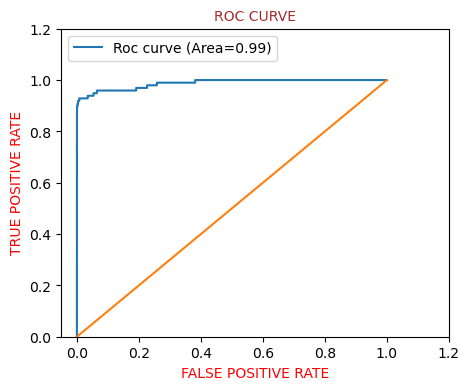

In [102]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_xgboost_proba)

In [103]:
from sklearn.model_selection import learning_curve

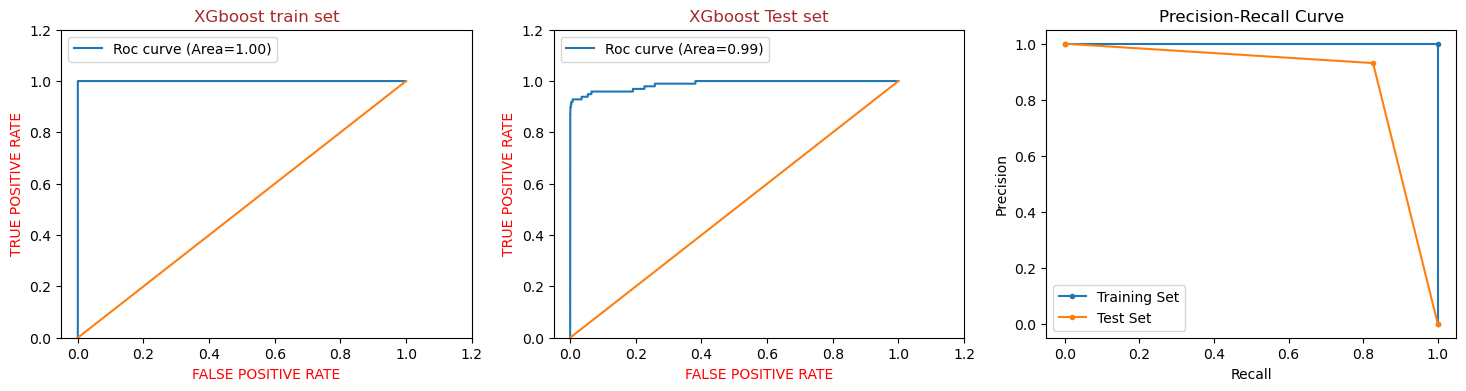

In [104]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train,y_train_pred_xgboost_proba)

plt.title('XGboost train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_xgboost_proba)
plt.title('XGboost Test set')

plt.subplot(1,3,3)
# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_xgboost)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_xgboost)

# size
# plt.figure(figsize=(5,3))

# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
plt.show()

### XGBoost Model Metrics

| Metric        | Train Set          | Test Set           |
|---------------|--------------------|--------------------|
| Accuracy      | 1.0                | 0.9996             |
| Sensitivity   | 1.0                | 0.8265             |
| Specificity   | 1.0                | 0.9999             |
| F1-Score      | 1.0                | 0.8757             |


<center><b><font color=black style = 'font-family:cambria; font-size:25px'> Decision Trees </font><b><center>

In [105]:
# Importing libraries 
from sklearn.tree import DecisionTreeClassifier

In [106]:
# Create the parameter grid 

start_time = time.time()


param_grid = {
    'criterion': ['gini'],
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(20, 70, 10),
    'min_samples_split': range(20, 70, 10),
}


#  Instantiate the grid search model
dtree = DecisionTreeClassifier()

model_cv = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
model_cv.fit(X_train,y_train)


end_time = time.time()



elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Elapsed Time (Minutes): 23.61


In [107]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.947303      0.332517         0.041944        0.001672   
1       7.948617      0.815913         0.036772        0.010644   
2       7.663947      0.281054         0.029319        0.003629   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                     20   
1            gini               5                     20   
2            gini               5                     20   

  param_min_samples_split                                             params  \
0                      20  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
1                      30  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
2                      40  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.931820           0.900647           0.927380         0.919949   
1           0.931804           0.900665           0.919764         0.917411   
2           0.924244           0.893040           0.919762         0.912349   

   std_test_score  rank_test_score  
0        0.013768               41  
1        0.012821               45  
2        0.013775               50

In [108]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [109]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 60, 'min_samples_split': 50}
The Best score Is 0.9510262949996475


In [110]:
dtree_model1=DecisionTreeClassifier(random_state=100,criterion='gini',max_depth=10,min_samples_leaf=20,min_samples_split=30)

In [111]:
dtree_model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=30,
                       random_state=100)

Top var = 18
2nd Top var = 15
3rd Top var = 11


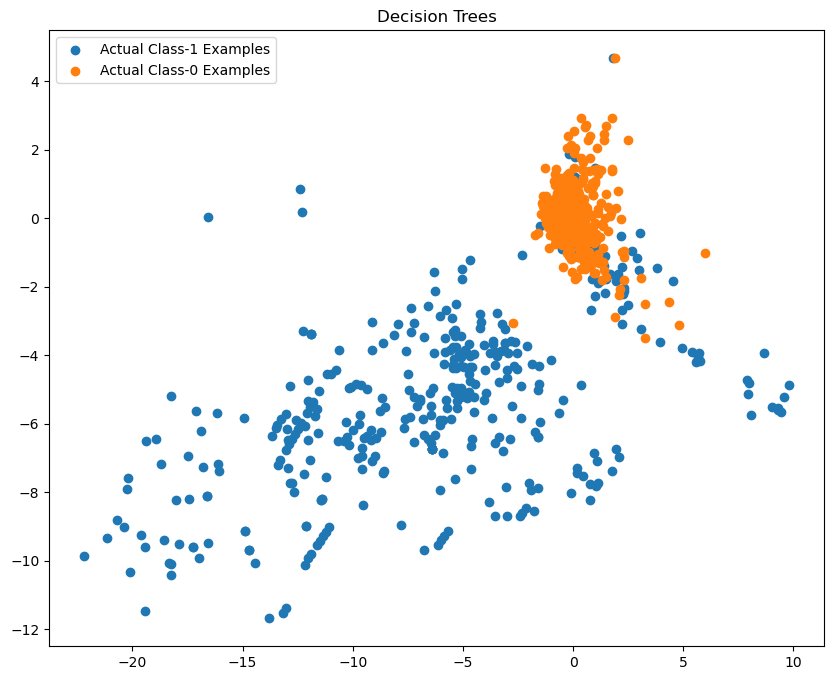

In [112]:
var_imp = []
for i in dtree_model1.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(dtree_model1.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(dtree_model1.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(dtree_model1.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(dtree_model1.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(dtree_model1.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('Decision Trees')
plt.legend()
plt.show()

In [113]:
y_train_pred_dtree=dtree_model1.predict(X_train)

In [114]:
confusion_matrix_dtree_train=confusion_matrix(y_train,y_train_pred_dtree)

In [115]:
confusion_matrix_dtree_train

array([[227413,     38],
       [    96,    298]], dtype=int64)

In [116]:
TN = confusion_matrix_dtree_train[0,0] # True negative
FP = confusion_matrix_dtree_train[0,1] # False positive
FN = confusion_matrix_dtree_train[1,0] # False negative
TP = confusion_matrix_dtree_train[1,1] # True positive

In [117]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.7563451776649747
The Specificity  is : 0.9998329310488853


In [118]:
accuracy=metrics.accuracy_score(y_train,y_train_pred_dtree)
print('The Accuracy of Decision Trees For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train,y_train_pred_dtree)
print("The F1-score of  Decision Trees For Train is :", F1_score)

The Accuracy of Decision Trees For Train is : 0.9994118808839343
The F1-score of  Decision Trees For Train is : 0.8164383561643835


In [119]:
# classification_report
print(classification_report(y_train, y_train_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.76      0.82       394

    accuracy                           1.00    227845
   macro avg       0.94      0.88      0.91    227845
weighted avg       1.00      1.00      1.00    227845



In [120]:
y_train_pred_dtree_proba=dtree_model1.predict_proba(X_train)[:,1]

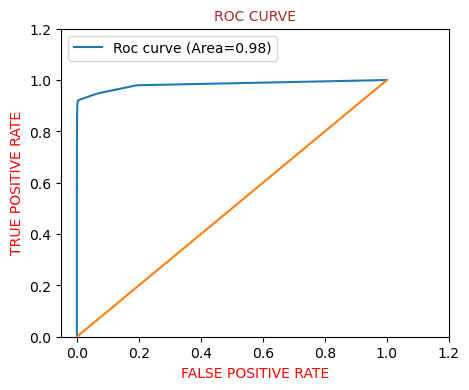

In [121]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train,y_train_pred_dtree_proba)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [122]:
y_test_pred_dtree=dtree_model1.predict(X_test)

In [123]:
y_test_pred_dtree_proba=dtree_model1.predict_proba(X_test)[:,1]

In [124]:
confusion_matrix_dtree_test=confusion_matrix(y_test,y_test_pred_dtree)
confusion_matrix_dtree_test

array([[56854,    10],
       [   22,    76]], dtype=int64)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Decision `Test Case`  </b></font><br>


In [125]:
TN = confusion_matrix_dtree_test[0,0] # True negative
FP = confusion_matrix_dtree_test[0,1] # False positive
FN = confusion_matrix_dtree_test[1,0] # False negative
TP = confusion_matrix_dtree_test[1,1] # True positive

In [126]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.7755102040816326
The Specificity  is : 0.9998241418120428


In [127]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_dtree)
print('The Accuracy of Decision Tree For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_dtree)
print("The F1-score of Decision Tree For Test is :", F1_score)

The Accuracy of Decision Tree For Test is : 0.9994382219725431
The F1-score of Decision Tree For Test is : 0.8260869565217391


In [128]:
    # classification_report
print(classification_report(y_test, y_test_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Decision Tree`  </b></font><br>


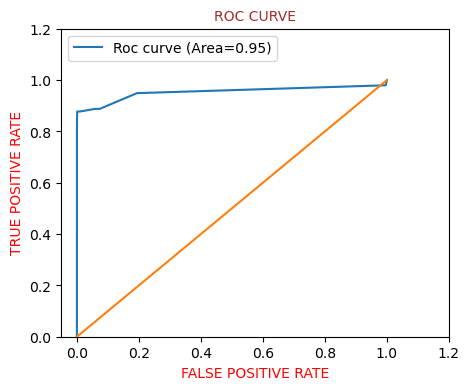

In [129]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_dtree_proba)

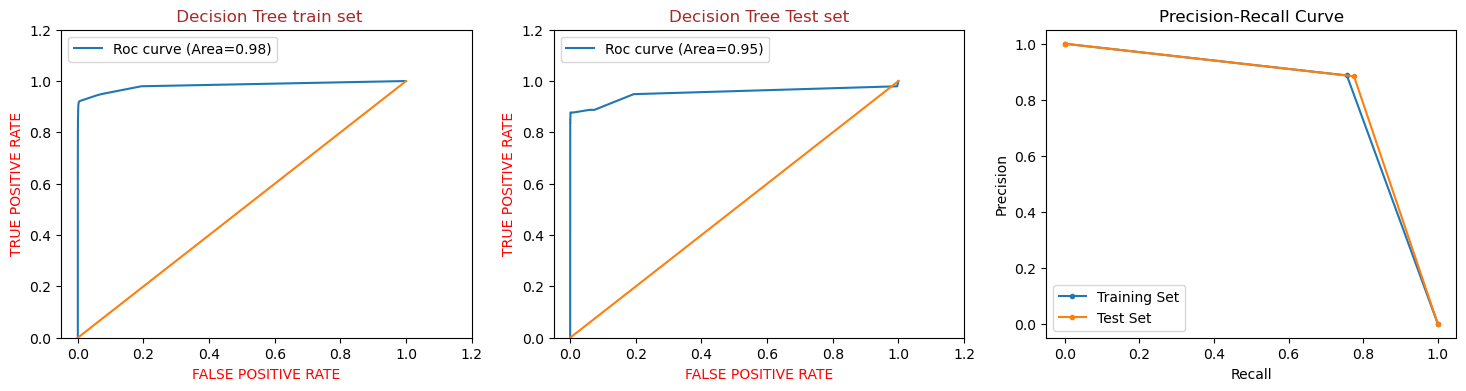

In [130]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train,y_train_pred_dtree_proba)

plt.title(' Decision Tree train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_dtree_proba)

plt.title('Decision Tree Test set')

plt.subplot(1,3,3)
# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_dtree)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_dtree)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


plt.show()

### Decision Trees Model Metrics

| Metric        | Train Set        | Test Set         |
|---------------|------------------|------------------|
| Accuracy      | 0.9994           | 0.9994           |
| Sensitivity   | 0.7563           | 0.7755           |
| Specificity   | 0.9998           | 0.9998           |
| F1-Score      | 0.8164           | 0.8261           |


<center><b><font color=black style = 'font-family:cambria; font-size:25px'> Random Forest </font><b><center>

In [131]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier

In [132]:
# Record the start time
start_time = time.time()

# Create the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

random_forest=RandomForestClassifier()

model_cv = GridSearchCV(estimator=random_forest,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=3,
                        verbose=2,
                        n_jobs=-1,
                       return_train_score=True)



model_cv .fit(X_train,y_train)




# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Elapsed Time (Minutes): 19.85


In [133]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
The Best score Is 0.9735733695069739


In [134]:
random_forest=RandomForestClassifier(random_state=100,
                                     criterion='gini',
                                     max_depth=model_cv.best_params_['max_depth'],
                                     min_samples_leaf=model_cv.best_params_['min_samples_leaf'],
                                     min_samples_split=model_cv.best_params_['min_samples_split'],
                                     n_estimators=model_cv.best_params_['n_estimators'],bootstrap=True)

In [135]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=100)

Top var = 18
2nd Top var = 13
3rd Top var = 15


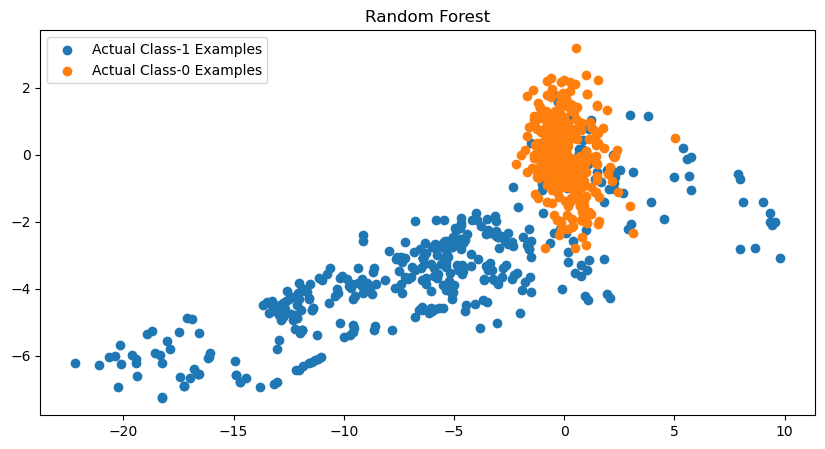

In [136]:
var_imp = []
for i in random_forest.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(random_forest.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(random_forest.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(random_forest.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(random_forest.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(random_forest.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('Random Forest')
plt.legend()
plt.show()

In [137]:
y_train_pred_random_forest=random_forest.predict(X_train)

In [138]:
confusion_matrix_random_forest_train=confusion_matrix(y_train,y_train_pred_random_forest)

In [139]:
confusion_matrix_random_forest_train

array([[227450,      1],
       [    67,    327]], dtype=int64)

In [140]:
    TN = confusion_matrix_random_forest_train[0,0] # True negative
FP = confusion_matrix_random_forest_train[0,1] # False positive
FN = confusion_matrix_random_forest_train[1,0] # False negative
TP = confusion_matrix_random_forest_train[1,1] # True positive

In [141]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8299492385786802
The Specificity  is : 0.9999956034486549


In [142]:
accuracy=metrics.accuracy_score(y_train,y_train_pred_random_forest)
print('The Accuracy of random_forest For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train,y_train_pred_random_forest)
print("The F1-score of  random_forest For Train is :", F1_score)

The Accuracy of random_forest For Train is : 0.9997015514933397
The F1-score of  random_forest For Train is : 0.9058171745152355


In [143]:
# classification_report
print(classification_report(y_train, y_train_pred_random_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.83      0.91       394

    accuracy                           1.00    227845
   macro avg       1.00      0.91      0.95    227845
weighted avg       1.00      1.00      1.00    227845



In [144]:
y_train_pred_random_forest_proba=random_forest.predict_proba(X_train)[:,1]

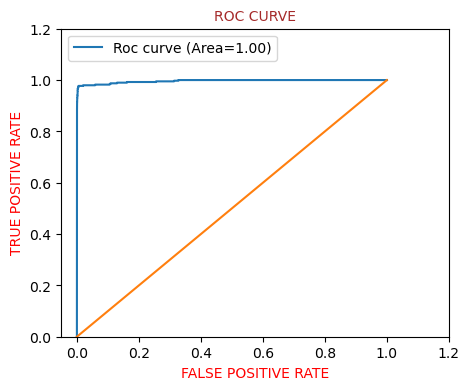

In [145]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train,y_train_pred_random_forest_proba)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [146]:
y_test_pred_random_forest=random_forest.predict(X_test)

In [147]:
y_test_pred_random_forest_proba=random_forest.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Random Forest `Test Case`  </b></font><br>


In [148]:
confusion_matrix_random_forest_test=confusion_matrix(y_test,y_test_pred_random_forest)
confusion_matrix_random_forest_test

array([[56859,     5],
       [   18,    80]], dtype=int64)

In [149]:
TN = confusion_matrix_random_forest_test[0,0] # True negative
FP = confusion_matrix_random_forest_test[0,1] # False positive
FN = confusion_matrix_random_forest_test[1,0] # False negative
TP = confusion_matrix_random_forest_test[1,1] # True positive

In [150]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8163265306122449
The Specificity  is : 0.9999120709060214


In [151]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_random_forest)
print('The Accuracy of random_forest For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_random_forest)
print("The F1-score of random_forest For Test is :", F1_score)

The Accuracy of random_forest For Test is : 0.9995962220427653
The F1-score of random_forest For Test is : 0.8743169398907104


In [152]:
# classification_report
print(classification_report(y_test, y_test_pred_random_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Random Forest`  </b></font><br>


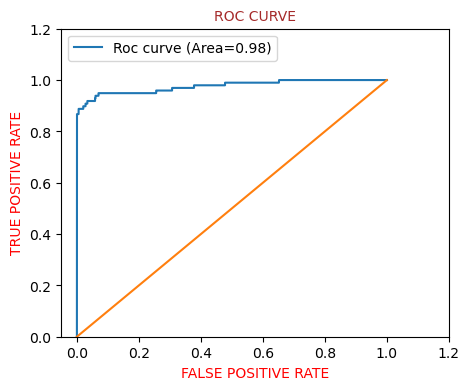

In [153]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_random_forest_proba)

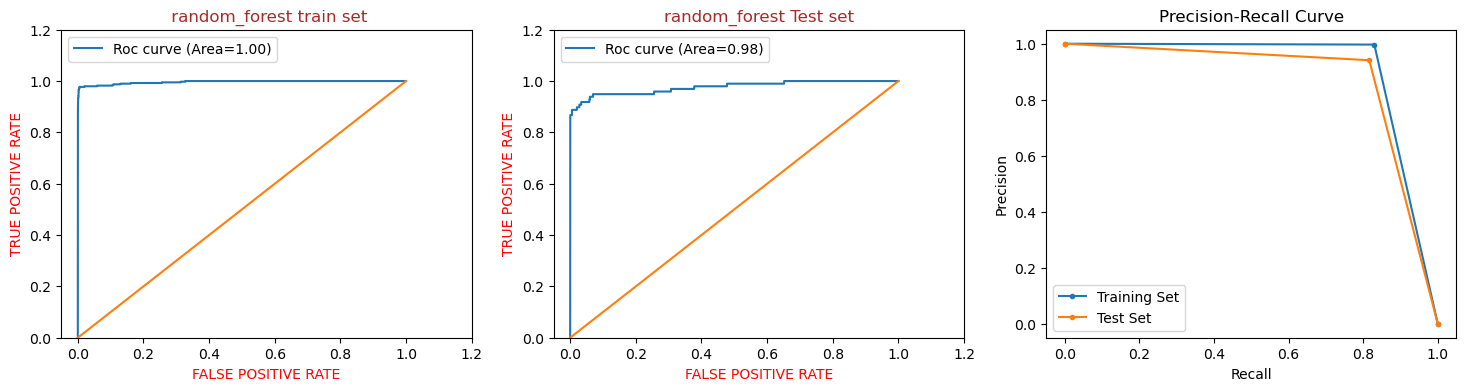

In [154]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train,y_train_pred_random_forest_proba)

plt.title(' random_forest train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_random_forest_proba)

plt.title('random_forest Test set')

plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_random_forest)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_random_forest)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()

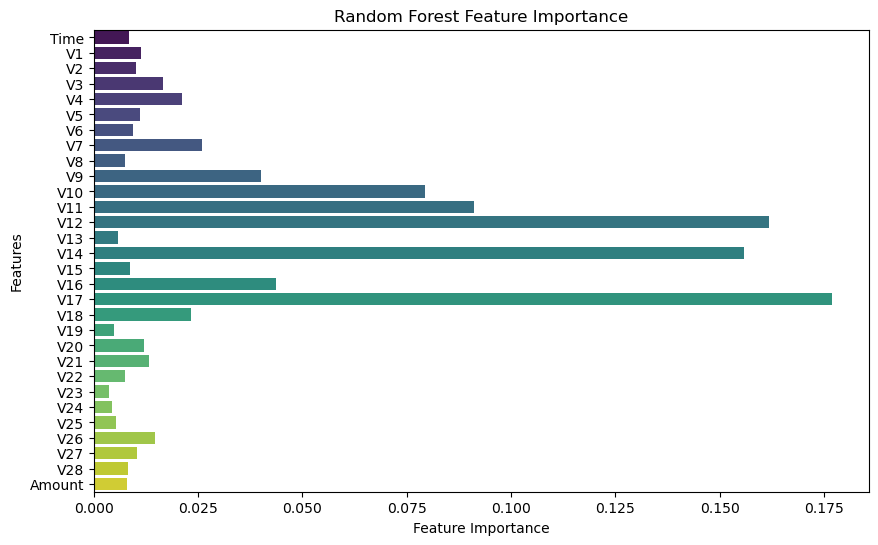

In [155]:
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt

# Assuming clf is your trained Random Forest classifier
feature_importances = random_forest.feature_importances_

# Get feature names if available
feature_names = X.columns if 'X' in locals() else range(len(feature_importances))

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, orient='h', palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


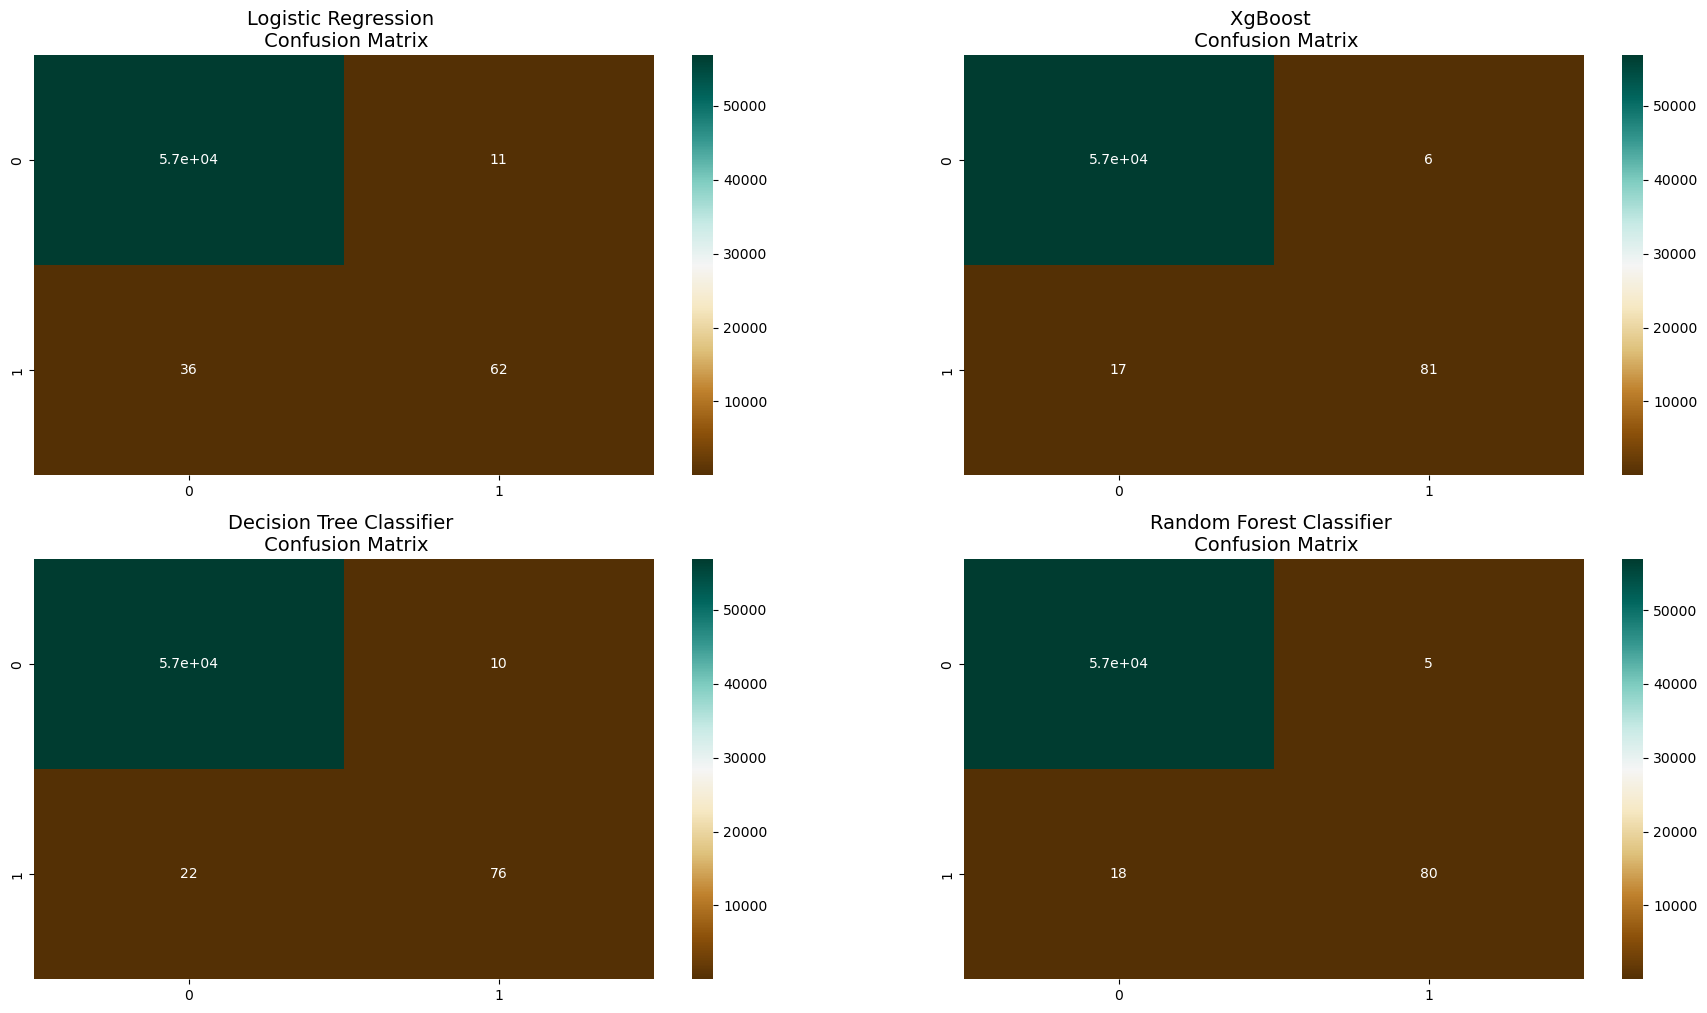

In [156]:
from sklearn.metrics import confusion_matrix

# all models fitted using SMOTE technique
y_test_pred_logistic = logistic_model1.predict(X_test)

y_test_pred_xgboost = xgb_model1.predict(X_test)
y_test_pred_dtree = dtree_model1.predict(X_test)
y_test_pred_random_forest = random_forest.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_test_pred_logistic)
xgboost_cf = confusion_matrix(y_test, y_test_pred_xgboost)
dtree_cf = confusion_matrix(y_test, y_test_pred_dtree)
random_forest_cf = confusion_matrix(y_test, y_test_pred_random_forest)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.BrBG)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
# ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
# ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgboost_cf, ax=ax[0][1], annot=True, cmap=plt.cm.BrBG)
ax[0][1].set_title("XgBoost \n Confusion Matrix", fontsize=14)


sns.heatmap(dtree_cf, ax=ax[1][0], annot=True, cmap=plt.cm.BrBG)
ax[1][0].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)


sns.heatmap(random_forest_cf, ax=ax[1][1], annot=True, cmap=plt.cm.BrBG)
ax[1][1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)



plt.show()

### **Random Forest Classifier Results**

| **Metric**       | **Training Set** | **Test Set** |
|------------------|------------------|--------------|
| **Accuracy**     | 0.9997           | 0.9996       |
| **Sensitivity**  | 0.8299           | 0.8163       |
| **Specificity**  | 0.9999           | 0.9999       |
| **F1-Score**     | 0.9058           | 0.8743       |


<center><b><font color=black style = 'font-family:cambria; font-size:23px'> K Nearest Neighbors KNN </font><b><center>
    <br>

<font color=green style = 'font-family:cambria; font-size:15px'> We `cannot` build  the model `by using KNN` because our Data Set contains 284807 `KNN is Needs more memory power` as the data point increases it should store the data points</font>
    <br>
    
<font color=green style = 'font-family:cambria; font-size:15px'>As you see the below code i have tried to run the model based on KNN but it is `consuming more time`  </font>

<font color=green style = 'font-family:cambria; font-size:15px'>If You Still Want To Use KNN, You Can Try Reducing The Number Of Neighbors (K) Or Use Approximations To Speed Up The Computation. Additionally, Optimizing The Implementation (Using A More Optimized Library Or Parallel Computing) Might Hel  </font>

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
# # Record the start time
# start_time = time.time()

# # Create the modified parameter grid
# param_grid = {
#     'n_neighbors': [3, 5],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2],
#     'metric': ['euclidean', 'manhattan']
# }
# # Create a KNN classifier
# knn = KNeighborsClassifier()

# # Use GridSearchCV to find the best parameters
# model_cv = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='recall', cv=5)
# model_cv.fit(X_train, y_train)



# # Record the end time
# end_time = time.time()
# # Calculate the elapsed time in seconds
# elapsed_time_seconds = end_time - start_time

# # Convert elapsed time to minutes
# elapsed_time_minutes = elapsed_time_seconds / 60

# print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")



<font color=green style = 'font-family:Cambria; font-size:18px'>Choosing The Best Model On Imbalanced Data Set Out Of All 4 Models Logistic Regression,XGBoost,Decision Tree, Random Forest</font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>Most Of The Models Performed Well On `Training Set` and `Test Set`  </font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>Each Model Has Its Strengths. If Your `Primary Concern Is Detecting Fraud` (Which Is Often The Case In Credit Card Fraud Detection), You Might Prioritize Models With `Higher Sensitivity` Because It Focuses On `Correctly Identifying Fraud Cases`.  </font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>`XG Boost` Exhibits `The Highest Sensitivity On The Test Set` Among The Models You `Evaluated (0.816)`. `Sensitivity Is Crucial In Fraud Detection` Because It Represents The Ability Of The Model To `Correctly Identify Actual Fraud Cases`, Minimizing False Negatives.</font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>XG Boost Is Known For Its `Robustness To Imbalanced Datasets`. It Handles Class Imbalance Well And Often Provides Better Performance Compared To Other Algorithms When Dealing With Skewed Class Distributions.  </font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>`XG Boost` Shows A `Good Balance Between Sensitivity, Specificity, And Accuracy`. While Achieving A `High Sensitivity`, It Also Maintains A `High Level Of Specificity (0.999)` And `Accuracy (0.999)`, Indicating An Overall Strong Performance</font>

-  <font color=brown style = 'font-family:Cambria; font-size:15px'>`XG Boost` Excels In Various Metrics Like Sensitivity, Specificity, Accuracy, F1-Score, And ROC Curve, Demonstrating Its `Overall Robust And Balanced Performance`</font>

<hr style='height:0.5px'>


<font color= 'green' style = 'font-family:Cambria ; font-size:20px'>Handling Class Imbalance </font><br>

<font color=brown style = 'font-family:Cambria; font-size:15px'>The Data Exhibits A Significant Class Imbalance, With Over `2,84,315 Cases Labeled As 0` And Only Around` 492 Cases Labeled As 1`. Machine Learning Algorithms Perform Best With Balanced Class Representation. However, In This Scenario, Any Model Built Will Be More Knowledgeable About Non-Fraudulent Cases Than Fraudulent Ones Due To The Imbalance. This Imbalance Creates A Challenge Known As The Minority Class Problem.</font>
<br>

<font color= 'green' style = 'font-family:Cambria ; font-size:18px'>To Tackle The Challenge Of `Class Imbalance`, Various Methods Can Be Employed :</font>

-   <font color=brown style = 'font-family:cambria; font-size:15px'>`Undersampling` : This Approach Involves Selecting Fewer Data Points From The Majority Class During The Model-Building Process. For Instance, If The Minority Class Has Only 500 Data Points, An Equal Number Of 500 Data Points Are Chosen From The Majority Class To Somewhat Balance The Classes. However, Undersampling Has Practical Limitations, Such As Losing Over 99% Of The Original Data, Making It Less Effective In Real-World Scenarios. `Select Fewer Data Points From The Majority Class, But It's Less Effective Due To Significant Data Loss`.</font>

-  <font color=brown style = 'font-family:cambria; font-size:15px'> `Oversampling` : In This Method, `Weights` Are Assigned To Randomly Selected Data Points From The Minority Class. This Means That The Occurrence Of Each Data Point Is `Multiplied By The Assigned Weight For Optimization`, But It `May Not Add New Information` And Can `Exaggerate Existing Patterns`.</font>

- <font color=brown style = 'font-family:cambria; font-size:15px'>`Smote ` : Intelligently Generates Synthetic Samples Between Existing Minority Class Data Points, Introducing Diversity And Reducing Bias. </font>

-   <font color=brown style = 'font-family:cambria; font-size:15px'>`Adasyn` : Similar To Smote, It Adapts By Introducing Synthetic Samples Based On A Density Distribution, Focusing On Harder-To-Learn Minority Examples.</font><br>    

<b><center><font color= 'Black' style = 'font-family:verdana ; font-size:20px'>SMOTE Synthetic Minority Over-Sampling </font></center></b>
<hr style="color: black; height: 0.5px;">

-   <font color=brown style = 'font-family:cambria; font-size:15px'>SMOTE, Which Stands For Synthetic Minority Over-Sampling Technique, Is A `Popular Technique` In The Field Of Machine Learning, Particularly In The Context Of `Imbalanced Classification Problems`. The `Primary Goal` Of SMOTE Is To Address The `Issue Of Class Imbalance` By Generating `Synthetic Samples` For The Minority Class.</font>
 
-   <font color=brown style = 'font-family:cambria; font-size:15px'>In Imbalanced Datasets, Where `One Class (The Minority Class)` Has Significantly Fewer Examples Than The Other `(The Majority Class)`, Machine Learning Models May Struggle To `Effectively Learn Patterns In The Minority Class`. SMOTE Addresses This By Creating Synthetic Instances Of The Minority Class Through A Process Of Interpolating Between Existing Minority Class Samples.</font> 

In [159]:
sm=SMOTE(sampling_strategy='auto',random_state=42)

In [160]:
# fitting the SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [161]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 30)
After SMOTE oversampling X_train shape= (454902, 30)


<center><b><font color=black style = 'font-family:cambria; font-size:23px'> Logistic Regression By SMOTE</font><b><center>

In [162]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
}

# Create K-fold cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for logistic regression
model_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [163]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.500491      0.020162         0.000000        0.000000    0.01   
1       3.483778      0.105422         0.159446        0.013508    0.01   
2       0.484868      0.036661         0.000000        0.000000     0.1   

  param_penalty                        params  split0_test_score  \
0            l1  {'C': 0.01, 'penalty': 'l1'}                NaN   
1            l2  {'C': 0.01, 'penalty': 'l2'}           0.915648   
2            l1   {'C': 0.1, 'penalty': 'l1'}                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1           0.915451           0.916289           0.914718           0.916334   
2                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN                6  
1         0.915688        0.000596                5  
2              NaN             NaN                6

In [164]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [165]:
# best score
best_score=model_cv.best_score_
# best params
best_params=model_cv.best_params_

In [166]:
print(f"The Best Score Is {best_score}")
print(f"The Best Params Is {best_params}")

The Best Score Is 0.9180097343835285
The Best Params Is {'C': 10, 'penalty': 'l2'}


In [167]:
logistic_=LogisticRegression(C=10,penalty='l2')

In [168]:
# fiitting the model on train set
logistic_smote=logistic_.fit(X_train_smote,y_train_smote)

In [169]:
y_train_pred_logistic_smote=logistic_smote.predict(X_train_smote)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For `Logistic Regression`  </b></font><br>


In [170]:
confusion_matrix_logistic_train_smote=metrics.confusion_matrix(y_train_smote,y_train_pred_logistic_smote)

In [171]:
confusion_matrix_logistic_train_smote

array([[220930,   6521],
       [ 18675, 208776]], dtype=int64)

In [172]:
TN = confusion_matrix_logistic_train_smote[0,0] # True negative
FP = confusion_matrix_logistic_train_smote[0,1] # False positive
FN = confusion_matrix_logistic_train_smote[1,0] # False negative
TP = confusion_matrix_logistic_train_smote[1,1] # True positive

In [173]:
calculation_metrics(TN,FP,FN,TP)

The Sensitivity  is : 0.9178944036297928
The Specificity  is : 0.9713300886784406


In [174]:
accuracy=metrics.accuracy_score(y_train_smote,y_train_pred_logistic_smote)
print('The Accuracy of Logistic Regression By Using Smote For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train_smote,y_train_pred_logistic_smote)
print("The F1-score of Logistic Regression By Using Smote For Train is :", F1_score)

The Accuracy of Logistic Regression By Using Smote For Train is : 0.9446122461541168
The F1-score of Logistic Regression By Using Smote For Train is : 0.943091781329334


In [175]:
# classificatino report
print(classification_report(y_train_smote,y_train_pred_logistic_smote))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



In [176]:
# predicted probability
y_train_pred_logistic_proba_smote=logistic_smote.predict_proba(X_train_smote)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Training set For `Logistic Regression` Smote </b></font><br>


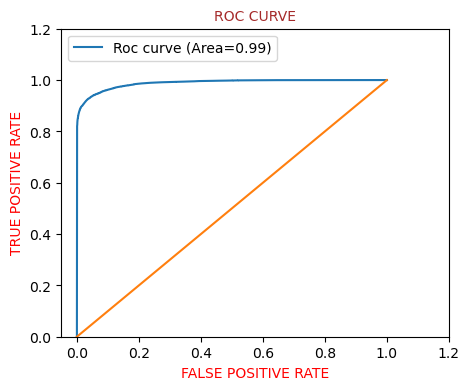

In [177]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train_smote,y_train_pred_logistic_proba_smote)

<font color=brown style = 'font-family:cambria; font-size:15px'>`SMOTE` (Synthetic Minority Over-Sampling Technique) Should Only Be `Applied To The Training Dataset`, And `Not To The Test Dataset`. The Reason Behind This Is That Any `Oversampling Or Data Manipulation Techniques`, Including SMOTE, Should Be `Part Of The Training Process` And Should `Not Leak Information` From The Test Set Into The Training Set.</font>

<b><font color=black style = 'font-family:cambria; font-size:15px'>Here's Why You Should Only Apply SMOTE To The Training Data :</font><b>

- <font color=brown style = 'font-family:cambria; font-size:15px'>`Simulating Real-World Scenarios`: In Real-World Scenarios, Your Model Will Encounter New, Unseen Data When It's Deployed. Therefore, Any Preprocessing Steps, Such As Oversampling, Should Be Applied Only To The Training Data To Mimic This Real-World Scenario.</font>
    
- <font color=brown style = 'font-family:cambria; font-size:15px'>`Preventing Data Leakage` : If You Apply SMOTE To The Entire Dataset (Including Both Training And Test Sets), You Risk Introducing Information From The Test Set Into The Training Set. This Can Lead To `Overly Optimistic Evaluations` Of Your Model's Performance Because It Has Already Seen Some Of The Test Set Examples During Training.</font>

- <font color=brown style = 'font-family:cambria; font-size:15px'>`Maintaining Independence` : The `Test Set` Should Be Kept `Independent` Of The Training Set To Provide An `Unbiased Evaluation` Of The Model's Generalization Performance On New, Unseen Data.</font>
    
 <font color=brown style = 'font-family:cambria; font-size:15px'>In Summary, Always Apply SMOTE, Or Any Other Data Preprocessing Technique, Exclusively To The Training Dataset Before Splitting It Into Training And Validation Sets. This Ensures A More Accurate Representation Of The Model's Performance On Truly Unseen Data During Evaluation.</font>




<b><font color=black style = 'font-family:cambria; font-size:15px'>Let's Do Predictions On The `Test Set` </font><b>

In [178]:
y_test_pred_logistic=logistic_smote.predict(X_test)

In [179]:
y_test_pred_logistic_proba=logistic_smote.predict_proba(X_test)[:,1]

In [180]:
confusion_matrix_logistic_test=confusion_matrix(y_test,y_test_pred_logistic)
confusion_matrix_logistic_test

array([[55219,  1645],
       [    5,    93]], dtype=int64)

In [181]:
TN = confusion_matrix_logistic_test[0,0] # True negative
FP = confusion_matrix_logistic_test[0,1] # False positive
FN = confusion_matrix_logistic_test[1,0] # False negative
TP = confusion_matrix_logistic_test[1,1] # True positive

In [182]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.9489795918367347
The Specificity  is : 0.9710713280810355


In [183]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_logistic)
print('The Accuracy of Logistic Regression For Test is :',accuracy)


The Accuracy of Logistic Regression For Test is : 0.9710333204592535


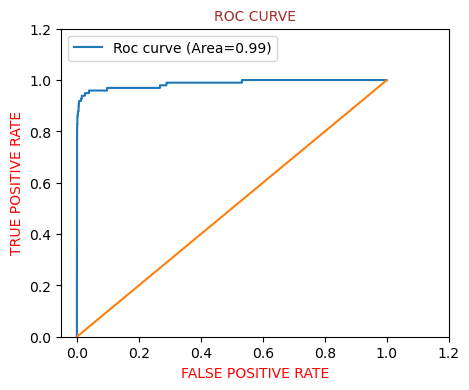

In [184]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_logistic_proba)

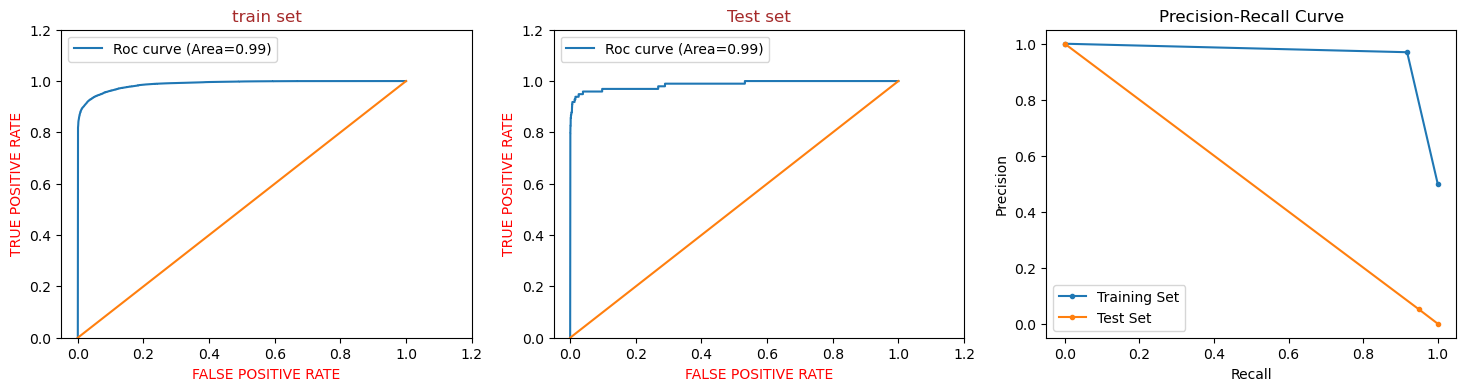

In [185]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_smote,y_train_pred_logistic_proba_smote)
plt.title('train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_logistic_proba)
plt.title('Test set')


plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_smote, y_train_pred_logistic_smote)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_logistic)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()


### Logistic Regression Performance (SMOTE Oversampling)

| Metric         | Training Set       | Test Set          |
|----------------|--------------------|-------------------|
| **Accuracy**   | 94.46%             | 97.10%            |
| **Sensitivity**| 91.79%             | 94.90%            |
| **Specificity**| 97.13%             | 97.11%            |
| **F1-score**   | 94.31%             | 94.31%            |


<center><b><font color=black style = 'font-family:cambria; font-size:23px'> XGBoost By SMOTE</font><b><center>

In [186]:
# Record the start time
start_time = time.time()

# Create the extended parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the individual base learner
}

# Create K-fold cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for XGBoost
model_cv = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_smote, y_train_smote)


# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Elapsed Time (Minutes): 20.71


In [187]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      20.037454      0.063829         0.679519        0.007568   
1      20.124590      0.073133         0.677025        0.015218   
2      15.025690      0.408763         0.703676        0.005973   

  param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                0.01               3                100             0.8   
1                0.01               3                100             0.9   
2                0.01               3                100             1.0   

                                              params  split0_test_score  \
0  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.897374   
1  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.896886   
2  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.896807   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.897183           0.901053         0.898536        0.001781   
1           0.897222           0.901000         0.898369        0.001865   
2           0.894940           0.900485         0.897411        0.002304   

   rank_test_score  
0               76  
1               77  
2               78

In [188]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'param_subsample', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [189]:
cv_results[['param_learning_rate', 'param_subsample','rank_test_score','mean_test_score']].sort_values(by= 'rank_test_score' ,ascending=True).head(5)

param_learning_rate param_subsample  rank_test_score  mean_test_score
80                 0.2             1.0                1              1.0
79                 0.2             0.9                1              1.0
51                 0.1             0.8                1              1.0
69                 0.2             0.8                1              1.0
52                 0.1             0.9                1              1.0

In [190]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
The Best score Is 1.0



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For  `XGBoost` By Smote  </b></font><br>


In [191]:
# chosen hyperparameters
# 'objective':'binary:logistic' which outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': model_cv.best_params_['learning_rate'],
          'max_depth': model_cv.best_params_['max_depth'], 
          'n_estimators': model_cv.best_params_['n_estimators'],
          'subsample':model_cv.best_params_['subsample'],
         'objective':'binary:logistic'}



In [192]:
# fit model on training data
xgb_smote= XGBClassifier(params = params)
xgb_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300,
                      'objective': 'binary:logistic', 'subsample': 0.8}, ...)

<img src='images/5.png' width=700px>

Top var = 15
2nd Top var = 5
3rd Top var = 9


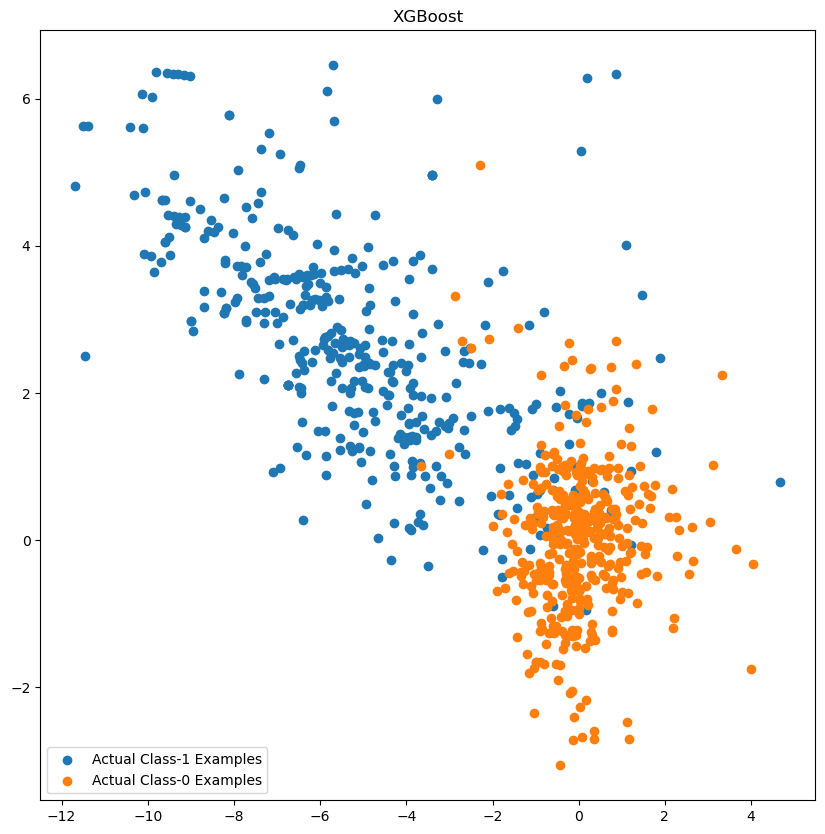

In [193]:
var_imp = []
for i in xgb_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_smote.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('XGBoost')

plt.legend()
plt.show()

In [194]:
y_train_pred_xgboost_smote=xgb_smote.predict(X_train_smote)


<font color="black " style ="font-family:Cambria ;font-size:16px"><b>Confusion Metrix For XGBoost SMOTE `Train Case`</b></font><br>


In [195]:
confusion_matrix_xgboost_train_smote=metrics.confusion_matrix(y_train_smote,y_train_pred_xgboost_smote)

In [196]:
confusion_matrix_xgboost_train_smote

array([[227450,      1],
       [     0, 227451]], dtype=int64)

In [197]:
TN = confusion_matrix_xgboost_train_smote[0,0] # True negative
FP = confusion_matrix_xgboost_train_smote[0,1] # False positive
FN = confusion_matrix_xgboost_train_smote[1,0] # False negative
TP = confusion_matrix_xgboost_train_smote[1,1] # True positive

In [198]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 1.0
The Specificity  is : 0.9999956034486549


In [199]:
print('The Accurays For The Train Set Of Xgboost Smote is ',metrics.accuracy_score(y_train_smote,y_train_pred_xgboost_smote))
print('The F1-Score For The Train Set Of Xgboost Smote is ',metrics.f1_score(y_train_smote,y_train_pred_xgboost_smote))

The Accurays For The Train Set Of Xgboost Smote is  0.9999978017243274
The F1-Score For The Train Set Of Xgboost Smote is  0.9999978017291599


In [200]:
# classificatino report
print(classification_report(y_train_smote,y_train_pred_xgboost_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [201]:
# predicted probability
y_train_pred_xgboost_proba_smote=xgb_smote.predict_proba(X_train_smote)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:16px"><b>`ROC_AUC` Curve on Training set For `XGBoost SMOTE`  </b></font><br>


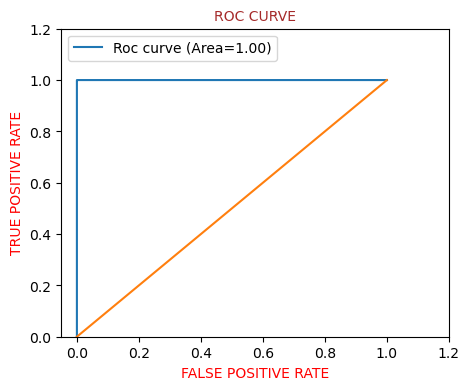

In [202]:
plt.figure(figsize=(5,4))

draw_roc_curve(y_train_smote,y_train_pred_xgboost_proba_smote)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [203]:
y_test_pred_xgboost=xgb_smote.predict(X_test)

In [204]:
y_test_pred_xgboost_proba=xgb_smote.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For XGBoost `Test Case`  </b></font><br>


In [205]:
confusion_matrix_xgboost_test=confusion_matrix(y_test,y_test_pred_xgboost)
confusion_matrix_xgboost_test

array([[56832,    32],
       [   14,    84]], dtype=int64)

In [206]:
TN = confusion_matrix_xgboost_test[0,0] # True negative
FP = confusion_matrix_xgboost_test[0,1] # False positive
FN = confusion_matrix_xgboost_test[1,0] # False negative
TP = confusion_matrix_xgboost_test[1,1] # True positive

In [207]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8571428571428571
The Specificity  is : 0.9994372537985369


In [208]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_xgboost)
print('The Accuracy of XG Boost For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_xgboost)
print("The F1-score of XG Boost For Test is :", F1_score)

The Accuracy of XG Boost For Test is : 0.9991924440855307
The F1-score of XG Boost For Test is : 0.7850467289719626



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `XGBoost`  </b></font><br>


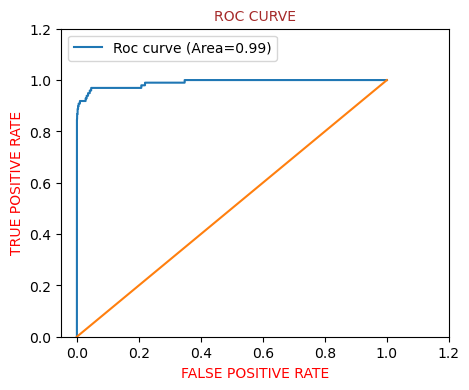

In [209]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_xgboost_proba)

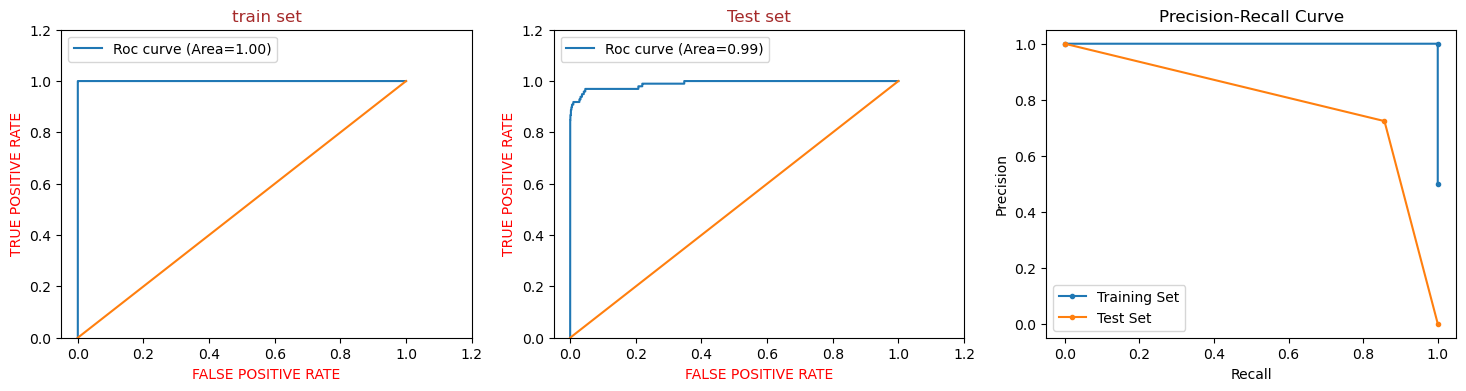

In [210]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_smote,y_train_pred_xgboost_proba_smote)
plt.title('train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_xgboost_proba)
plt.title('Test set')


plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_smote, y_train_pred_xgboost_smote)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_xgboost)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()


### XGBoost with SMOTE Performance

| Metric         | Training Set       | Test Set          |
|----------------|--------------------|-------------------|
| **Accuracy**   | 0.9999978          | 0.9991924         |
| **Sensitivity**| 1.0                | 0.8571            |
| **Specificity**| 0.9999956          | 0.9994373         |
| **F1-score**   | 0.9999978          | 0.7850            |


<center><b><font color=black style = 'font-family:cambria; font-size:23px'> Decision Tree By SMOTE</font><b><center>

In [211]:

# Record the start time
start_time = time.time()



param_grid = {
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}


# Create K-fold cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for Decision Tree
model_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_smote, y_train_smote)


# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Elapsed Time (Minutes): 9.74


In [212]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.454076      0.099332         0.260531        0.019184   
1      14.172156      0.089978         0.222484        0.011341   
2      14.089024      0.212746         0.223189        0.018509   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               3                      1   
1            gini               3                      1   
2            gini               3                      1   

  param_min_samples_split                                             params  \
0                       2  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
1                       5  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
2                      10  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.930532           0.930488           0.932193         0.931071   
1           0.930532           0.930488           0.932193         0.931071   
2           0.930532           0.930488           0.932193         0.931071   

   std_test_score  rank_test_score  
0        0.000794               37  
1        0.000794               37  
2        0.000794               37

In [213]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [214]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
The Best score Is 0.9705783256944002



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For  `Decision Trees` Using Smote </b></font><br>


In [215]:
dtree_smote=DecisionTreeClassifier(random_state=100,
                                    criterion=model_cv.best_params_['criterion'],
                                    max_depth=model_cv.best_params_['max_depth'],
                                    min_samples_leaf=model_cv.best_params_['min_samples_leaf'],
                                    min_samples_split=model_cv.best_params_['min_samples_split'])

In [216]:
dtree_smote.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(max_depth=7, min_samples_split=5, random_state=100)

Top var = 15
2nd Top var = 5
3rd Top var = 13


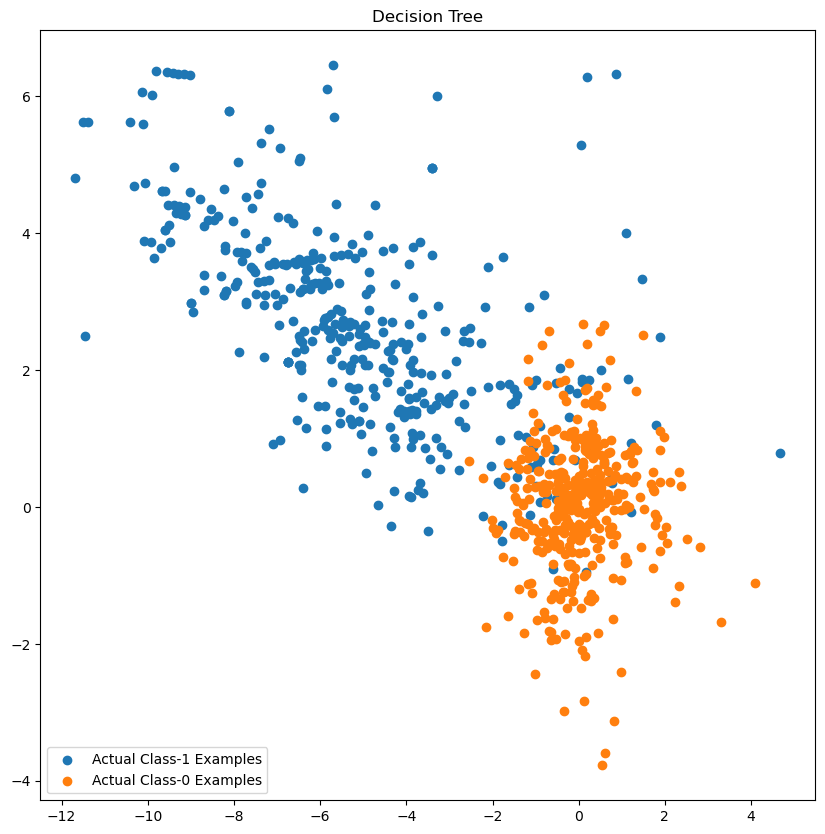

In [217]:
var_imp = []
for i in dtree_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(dtree_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(dtree_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(dtree_smote.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(dtree_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(dtree_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('Decision Tree')
plt.legend()
plt.show()

In [218]:
y_train_pred_dtree_smote=dtree_smote.predict(X_train_smote)

In [219]:
confusion_matrix_dtree_train_smote=confusion_matrix(y_train_smote,y_train_pred_dtree_smote)

In [220]:
confusion_matrix_dtree_train_smote

array([[220095,   7356],
       [  6204, 221247]], dtype=int64)

In [221]:
TN = confusion_matrix_dtree_train_smote[0,0] # True negative
FP = confusion_matrix_dtree_train_smote[0,1] # False positive
FN = confusion_matrix_dtree_train_smote[1,0] # False negative
TP = confusion_matrix_dtree_train_smote[1,1] # True positive

In [222]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.9727237954548452
The Specificity  is : 0.9676589683052613


In [223]:
accuracy=metrics.accuracy_score(y_train,y_train_pred_dtree)
print('The Accuracy of Decision Trees For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train,y_train_pred_dtree)
print("The F1-score of  Decision Trees For Train is :", F1_score)

The Accuracy of Decision Trees For Train is : 0.9994118808839343
The F1-score of  Decision Trees For Train is : 0.8164383561643835


In [224]:
# classification_report
print(classification_report(y_train, y_train_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.76      0.82       394

    accuracy                           1.00    227845
   macro avg       0.94      0.88      0.91    227845
weighted avg       1.00      1.00      1.00    227845




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Train set For `Decision Tree` Using Smote </b></font><br>


In [225]:
y_train_pred_dtree_proba_smote=dtree_smote.predict_proba(X_train_smote)[:,1]

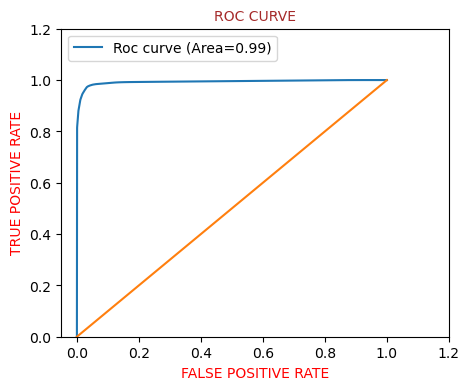

In [226]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train_smote,y_train_pred_dtree_proba_smote)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [227]:
y_test_pred_dtree=dtree_smote.predict(X_test)

In [228]:
y_test_pred_dtree_proba=dtree_smote.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Decision `Test Case`  </b></font><br>


In [229]:
confusion_matrix_dtree_test=confusion_matrix(y_test,y_test_pred_dtree)
confusion_matrix_dtree_test

array([[54805,  2059],
       [   12,    86]], dtype=int64)

In [230]:
TN = confusion_matrix_dtree_test[0,0] # True negative
FP = confusion_matrix_dtree_test[0,1] # False positive
FN = confusion_matrix_dtree_test[1,0] # False negative
TP = confusion_matrix_dtree_test[1,1] # True positive

In [231]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8775510204081632
The Specificity  is : 0.9637907990996061


In [232]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_dtree)
print('The Accuracy of Decision Tree For Test is :',accuracy)


The Accuracy of Decision Tree For Test is : 0.9636424282855237


In [233]:
# classification_report
print(classification_report(y_test, y_test_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.88      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.96      0.98     56962




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Decision Tree`  </b></font><br>


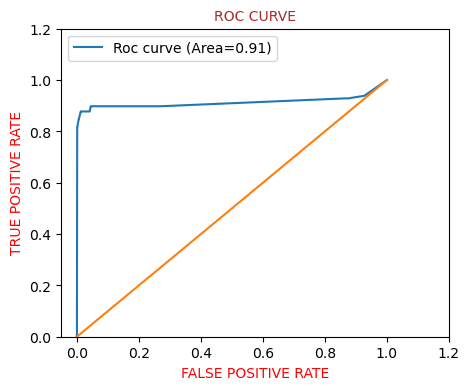

In [234]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_dtree_proba)

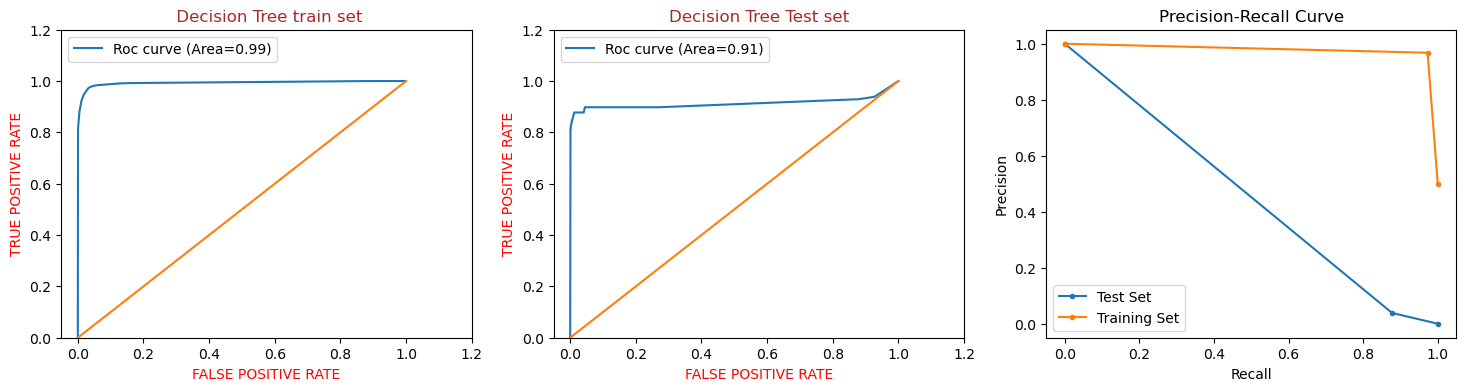

In [235]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_smote,y_train_pred_dtree_proba_smote)

plt.title(' Decision Tree train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_dtree_proba)

plt.title('Decision Tree Test set')

plt.subplot(1,3,3)
# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_dtree)
# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_smote, y_train_pred_dtree_smote)





# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_test, precision_test, label='Test Set', marker='.')

plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


plt.show()

### Decision Tree Performance Evaluation (SMOTE)

| **Metric**        | **Train Set**   | **Test Set**    |
|-------------------|-----------------|-----------------|
| **Accuracy**      | 99.94%          | 96.36%          |
| **Sensitivity**   | 97.27%          | 87.76%          |
| **Specificity**   | 96.77%          | 96.38%          |
| **F1-Score**      | 81.64%          | 8.00%           |


<center><b><font color=black style = 'font-family:cambria; font-size:23px'> Random Foreset By SMOTE</font><b><center><br>
     

<font color=green style = 'font-family:cambria; font-size:15px'>As I Observed That `Random Forest`, Especially With A `Large Number Of Trees And Deep Trees`, Can Indeed Be `Computationally Expensive`, And Applying SMOTE May Further `Increase The Training Time` Due To The `Generation Of Synthetic` Samples.</font>

<font color=green style = 'font-family:cambria; font-size:15px'>Using `SMOTE` (Synthetic Minority Over-Sampling Technique) `Increases` The Number Of `Minority Class Samples` By Generating `Synthetic Examples`, Making The Dataset More Balanced. While This Can Be Beneficial For Improving The Performance Of Models, It Comes With A Computational Cost, Especially For Algorithms That Build A Large Number Of Models Or Trees, Such As Random Forests.</font>

<font color=black style = 'font-family:cambria; font-size:15px'> 1. Increased Dataset Size</font><br>
<font color=black style = 'font-family:cambria; font-size:15px'> 2. Complexity of the Model</font><br>
<font color=black style = 'font-family:cambria; font-size:15px'>3. Tree Building Process  </font><br>
<font color=black style = 'font-family:cambria; font-size:15px'>4. Hyperparameter Tuning</font><br>
<font color=black style = 'font-family:cambria; font-size:15px'>5. Parallelization</font><br>

In [237]:
# # Record the start time
# start_time = time.time()

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['auto', 'sqrt'],
# }
# random_forest=RandomForestClassifier()

# model_cv = GridSearchCV(estimator=random_forest,
#                         param_grid=param_grid,
#                         scoring='roc_auc',
#                         cv=3,
#                         verbose=2,
#                         n_jobs=-1,
#                        return_train_score=True)



# model_cv .fit(X_train_smote,y_train_smote)




# # Record the end time
# end_time = time.time()
# # Calculate the elapsed time in seconds
# elapsed_time_seconds = end_time - start_time

# # Convert elapsed time to minutes
# elapsed_time_minutes = elapsed_time_seconds / 60

# print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Elapsed Time (Minutes): 191.89


- Fitting 3 folds for each of 48 candidates, totalling 144 fits
- Elapsed Time (Minutes): 191.89

In [239]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
The Best score Is 0.9999985975072536


- The Best params Is {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
- The Best score Is  0.9999985975072536


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For `Random Forest` Using Smote  </b></font><br>


In [240]:
random_forest_smote=RandomForestClassifier(random_state=100,
                                     criterion='gini',
                                     max_depth=None,
                                     min_samples_leaf=1,
                                     min_samples_split=5,
                                     n_estimators=100,
                                     max_features='sqrt')

In [241]:
random_forest_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(min_samples_split=5, random_state=100)

Top var = 15
2nd Top var = 13
3rd Top var = 12


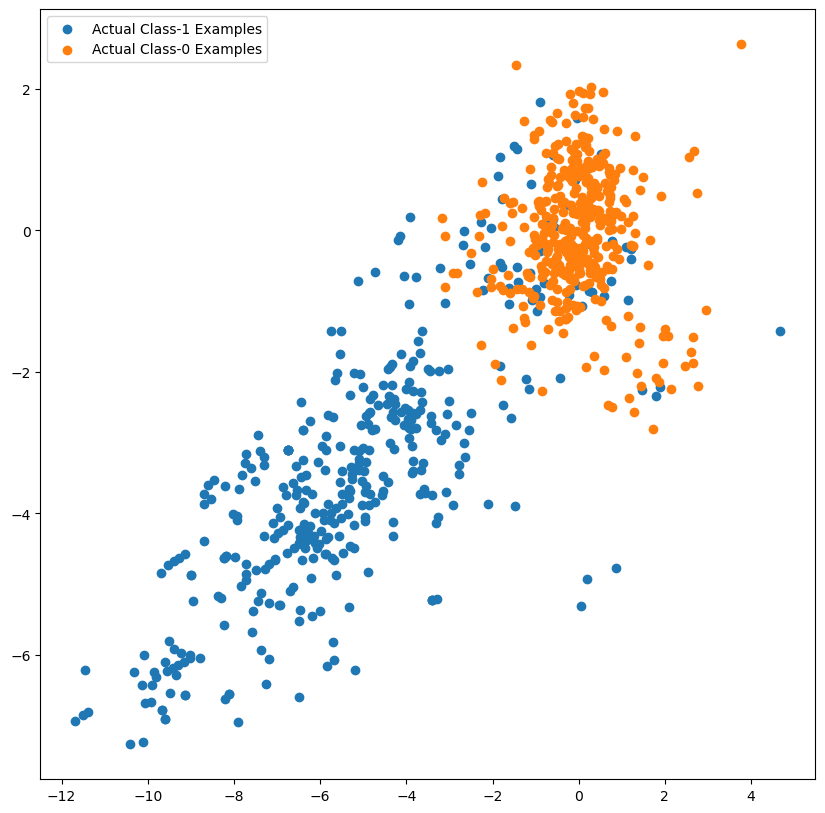

In [242]:
var_imp = []
for i in random_forest_smote.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(random_forest_smote.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(random_forest_smote.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(random_forest_smote.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(random_forest_smote.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(random_forest_smote.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()


In [243]:
y_train_pred_random_forest_smote=random_forest_smote.predict(X_train_smote)

In [244]:
confusion_matrix_random_forest_train_smote=confusion_matrix(y_train_smote,y_train_pred_random_forest_smote)

In [245]:
confusion_matrix_random_forest_train_smote

array([[227451,      0],
       [     0, 227451]], dtype=int64)

In [246]:
TN = confusion_matrix_random_forest_train_smote[0,0] # True negative
FP = confusion_matrix_random_forest_train_smote[0,1] # False positive
FN = confusion_matrix_random_forest_train_smote[1,0] # False negative
TP = confusion_matrix_random_forest_train_smote[1,1] # True positive

In [247]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 1.0
The Specificity  is : 1.0


In [248]:
accuracy=metrics.accuracy_score(y_train_smote,y_train_pred_random_forest_smote)
print('The Accuracy of random_forest For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train_smote,y_train_pred_random_forest_smote)
print("The F1-score of  random_forest For Train is :", F1_score)

The Accuracy of random_forest For Train is : 1.0
The F1-score of  random_forest For Train is : 1.0


In [249]:
# classification_report
print(classification_report(y_train_smote,y_train_pred_random_forest_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Train set For `Random Forest`  </b></font><br>


In [250]:
y_train_pred_random_forest_proba_smote = random_forest_smote.predict_proba(X_train_smote)[:,1]

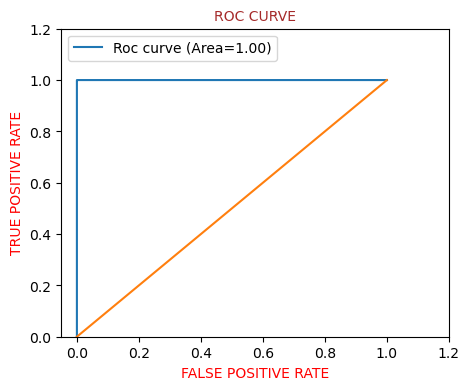

In [251]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train_smote,y_train_pred_random_forest_proba_smote)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [252]:
y_test_pred_random_forest=random_forest_smote.predict(X_test)

In [253]:
y_test_pred_random_forest_proba=random_forest_smote.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Random Forest `Test Case`  </b></font><br>


In [254]:
confusion_matrix_random_forest_test=confusion_matrix(y_test,y_test_pred_random_forest)
confusion_matrix_random_forest_test

array([[56855,     9],
       [   16,    82]], dtype=int64)

In [255]:
TN = confusion_matrix_random_forest_test[0,0] # True negative
FP = confusion_matrix_random_forest_test[0,1] # False positive
FN = confusion_matrix_random_forest_test[1,0] # False negative
TP = confusion_matrix_random_forest_test[1,1] # True positive

In [256]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8367346938775511
The Specificity  is : 0.9998417276308385


In [257]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_random_forest)
print('The Accuracy of random_forest For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_random_forest)
print("The F1-score of random_forest For Test is :", F1_score)

The Accuracy of random_forest For Test is : 0.9995611109160493
The F1-score of random_forest For Test is : 0.8677248677248677


In [258]:
# classification_report
print(classification_report(y_test, y_test_pred_random_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Random Forest`  </b></font><br>


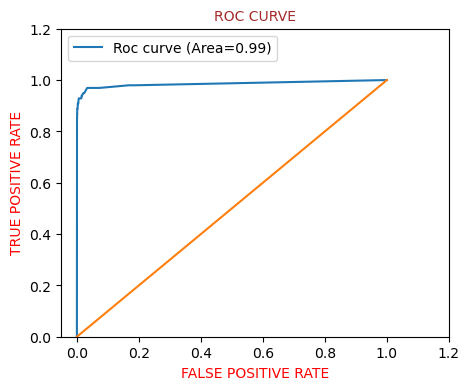

In [259]:
plt.figure(figsize=(5,4))

draw_roc_curve(y_test,y_test_pred_random_forest_proba)



### Performance Metrics for Random Forest with SMOTE

| **Metric**     | **Train Set** | **Test Set**  |
|----------------|---------------|---------------|
| **Accuracy**   | 1.00          | 0.99956       |
| **Sensitivity**| 1.00          | 0.8367        |
| **Specificity**| 1.00          | 0.99984       |
| **F1-Score**   | 1.00          | 0.8677        |


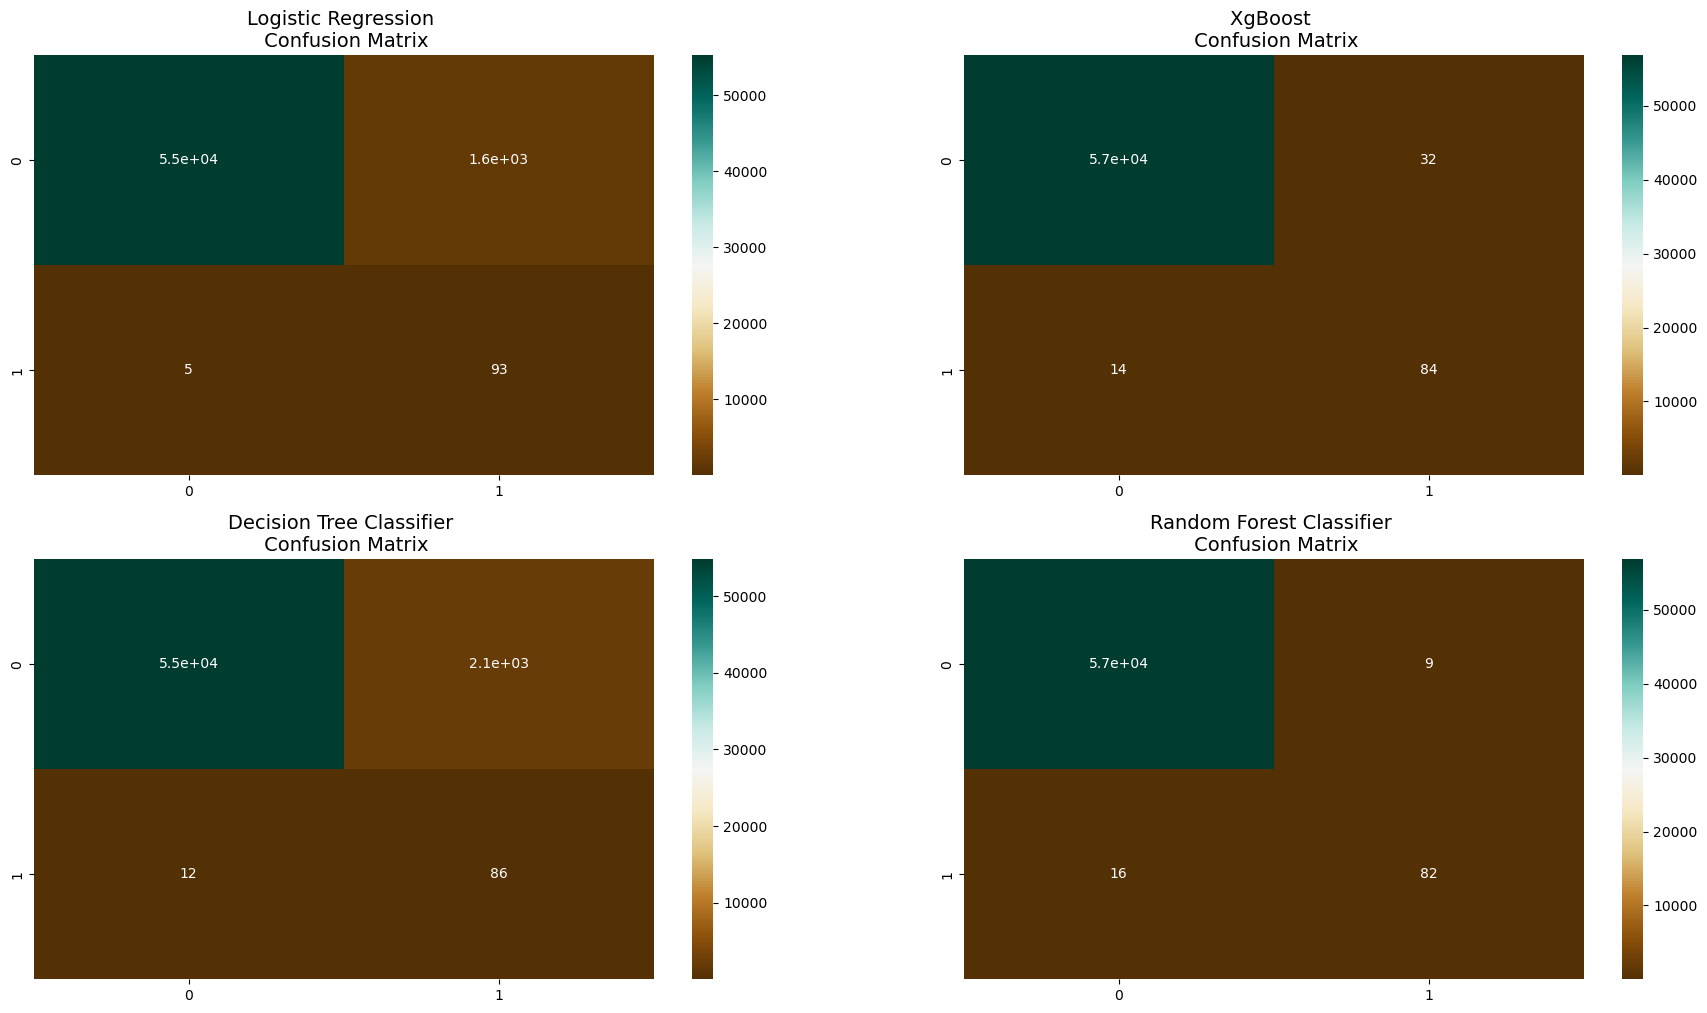

In [260]:
from sklearn.metrics import confusion_matrix

# all models fitted using SMOTE technique
y_test_pred_logistic = logistic_smote.predict(X_test)

y_test_pred_xgboost = xgb_smote.predict(X_test)
y_test_pred_dtree = dtree_smote.predict(X_test)
y_test_pred_random_forest = random_forest_smote.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_test_pred_logistic)
xgboost_cf = confusion_matrix(y_test, y_test_pred_xgboost)
dtree_cf = confusion_matrix(y_test, y_test_pred_dtree)
random_forest_cf = confusion_matrix(y_test, y_test_pred_random_forest)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.BrBG)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
# ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
# ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgboost_cf, ax=ax[0][1], annot=True, cmap=plt.cm.BrBG)
ax[0][1].set_title("XgBoost \n Confusion Matrix", fontsize=14)


sns.heatmap(dtree_cf, ax=ax[1][0], annot=True, cmap=plt.cm.BrBG)
ax[1][0].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)


sns.heatmap(random_forest_cf, ax=ax[1][1], annot=True, cmap=plt.cm.BrBG)
ax[1][1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)



plt.show()


<b><center><font color= 'Black' style = 'font-family:verdana ; font-size:20px'>Adaptive Synthetic Sampling</font></center></b>
<hr style="color: black; height: 0.5px;">

-   <font color=brown style = 'font-family:cambria; font-size:15px'>`ADASYN`, which stands for `Adaptive Synthetic Sampling`, is an `oversampling technique` used in machine learning, particularly in the `context of imbalanced datasets`. It is designed to address the challenge of `class imbalance` by generating synthetic samples `for the minority class`. What sets ADASYN apart is its `adaptive nature` – it focuses on `generating more synthetic` examples for the minority class instances that are harder to classify, aiming to alleviate the impact of class imbalance on model performance.</font> 
-   <font color=brown style = 'font-family:cambria; font-size:15px'>Adaptive Synthetic Sampling (ADASYN) is a technique used to address `imbalanced datasets in machine learning`, `improving classification performance` for underrepresented classes.</font>
-   <font color=brown style = 'font-family:cambria; font-size:15px'>`Adasyn` : Similar To Smote, It Adapts By Introducing Synthetic Samples Based On A Density Distribution, Focusing On Harder-To-Learn Minority Examples.</font>  



In [261]:
# importing adasyn
from imblearn.over_sampling import ADASYN

In [262]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [263]:
from collections import Counter

# Before sampling class distribution
print('Before sampling class distribution:', Counter(y_train))

# New class distribution
print('New class distribution:', Counter(y_train_adasyn))

Before sampling class distribution: Counter({0: 227451, 1: 394})
New class distribution: Counter({1: 227470, 0: 227451})


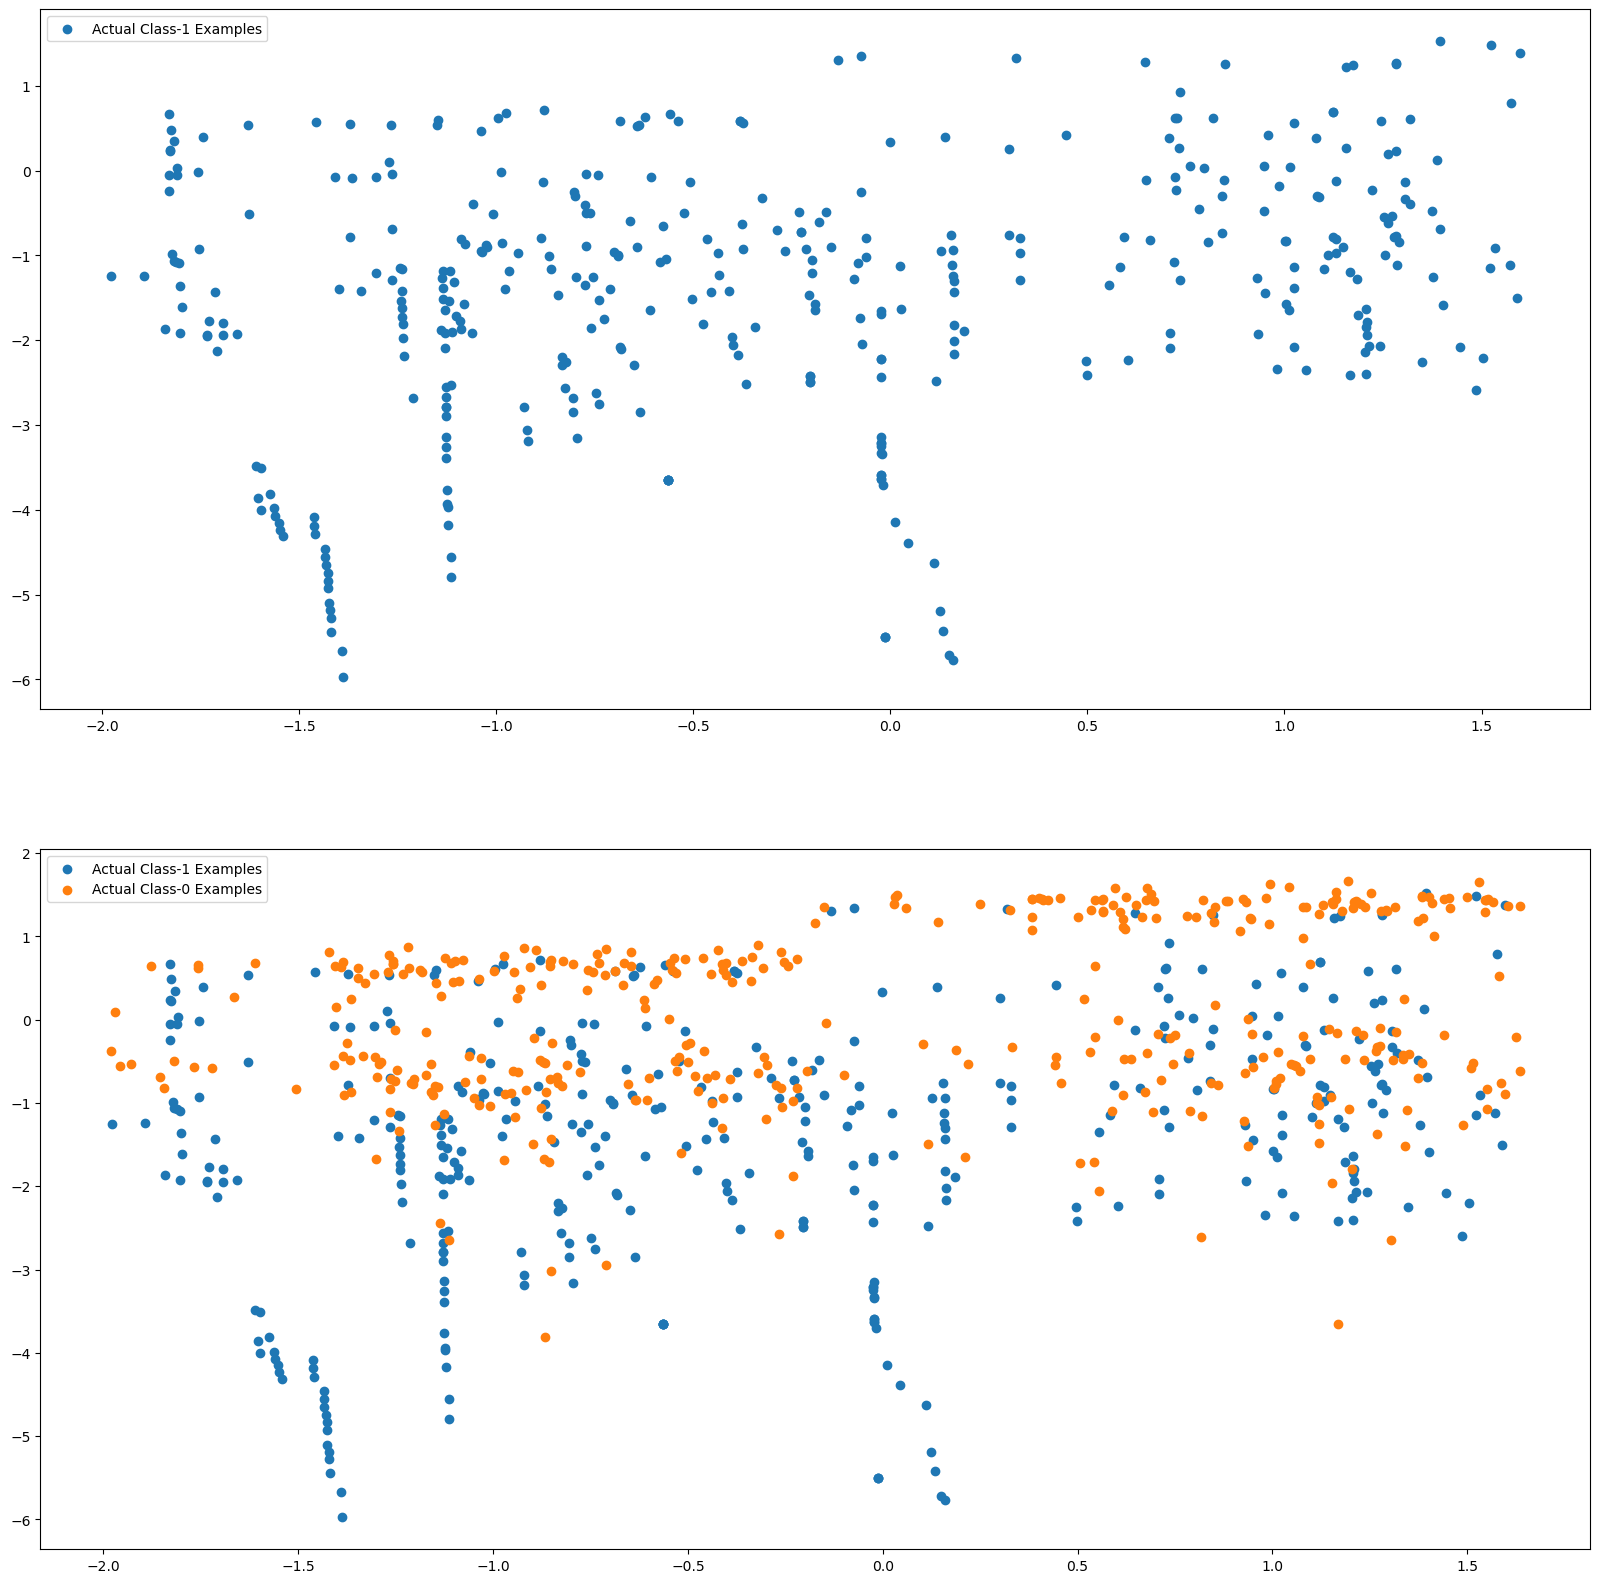

In [264]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()


plt.subplot(2, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

<center><b><font color=black style = 'font-family:cambria; font-size:23px'> Logistic Regression By Adasyn</font><b><center>

In [265]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'class_weight': ['balanced', None],  # Adjusts for class imbalance
}

# Create K-fold cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for logistic regression
model_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_adasyn, y_train_adasyn)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [266]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.658465      0.076207          0.00000        0.000000   0.001   
1       4.323888      0.331534          0.17485        0.015421   0.001   
2       0.605328      0.119420          0.00000        0.000000   0.001   

  param_class_weight param_penalty  \
0           balanced            l1   
1           balanced            l2   
2               None            l1   

                                              params  split0_test_score  \
0  {'C': 0.001, 'class_weight': 'balanced', 'pena...                NaN   
1  {'C': 0.001, 'class_weight': 'balanced', 'pena...           0.846387   
2  {'C': 0.001, 'class_weight': None, 'penalty': ...                NaN   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1           0.849153           0.845497           0.849014           0.848554   
2                NaN                NaN                NaN                NaN   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN               11  
1         0.847721        0.001493               10  
2              NaN             NaN               11

In [267]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_penalty', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [268]:
# best score
best_score=model_cv.best_score_
# best params
best_params=model_cv.best_params_

In [269]:
print(f"The Best Score Is {best_score}")
print(f"The Best Params Is {best_params}")

The Best Score Is 0.8649977191465584
The Best Params Is {'C': 10, 'class_weight': None, 'penalty': 'l2'}



<font color="black " style ="font-family:Cambria ;font-size:18px"><b> Logistic Regression With Optimal  Value That Is `c=10` </b></font><br>


In [270]:
logistic_=LogisticRegression(C=10,penalty='l2',class_weight=None)

In [271]:
# fiitting the model on train set
logistic_adasyn=logistic_.fit(X_train_adasyn,y_train_adasyn)

In [272]:
y_train_pred_logistic_adasyn=logistic_adasyn.predict(X_train_adasyn)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Adasyn `Logistic Regression`  </b></font><br>


In [273]:
confusion_matrix_logistic_train_adasyn=metrics.confusion_matrix(y_train_adasyn,y_train_pred_logistic_adasyn)

In [274]:
confusion_matrix_logistic_train_adasyn

array([[204587,  22864],
       [ 30710, 196760]], dtype=int64)

In [275]:
TN = confusion_matrix_logistic_train_adasyn[0,0] # True negative
FP = confusion_matrix_logistic_train_adasyn[0,1] # False positive
FN = confusion_matrix_logistic_train_adasyn[1,0] # False negative
TP = confusion_matrix_logistic_train_adasyn[1,1] # True positive

In [276]:
calculation_metrics(TN,FP,FN,TP)

The Sensitivity  is : 0.8649931859146262
The Specificity  is : 0.8994772500450646


In [277]:
accuracy=metrics.accuracy_score(y_train_adasyn,y_train_pred_logistic_adasyn)
print('The Accuracy of Logistic Regression By Using Adasyn For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train_adasyn,y_train_pred_logistic_adasyn)
print("The F1-score of Logistic Regression By Using Adasyn For Train is :", F1_score)

The Accuracy of Logistic Regression By Using Adasyn For Train is : 0.8822344978578698
The F1-score of Logistic Regression By Using Adasyn For Train is : 0.8801728495573637


In [278]:
# classificatino report
print(classification_report(y_train_adasyn,y_train_pred_logistic_adasyn))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88    227451
           1       0.90      0.86      0.88    227470

    accuracy                           0.88    454921
   macro avg       0.88      0.88      0.88    454921
weighted avg       0.88      0.88      0.88    454921



In [279]:
# predicted probability
y_train_pred_logistic_proba_adasyn=logistic_adasyn.predict_proba(X_train_adasyn)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Training set For `Logistic Regression`  </b></font><br>


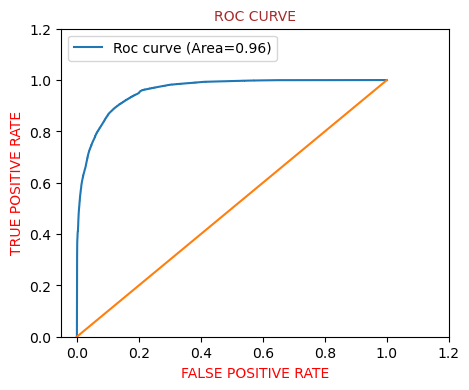

In [280]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train_adasyn,y_train_pred_logistic_proba_adasyn)

<font color=brown style = 'font-family:cambria; font-size:15px'>Avoid applying ADASYN or any oversampling technique to the test set. Modifying the test set with synthetic instances can distort its representation and lead to misleading assessments. Keep the test set untouched for fair evaluation, applying oversampling only to the training set to ensure the model's robustness in handling imbalanced data.
 </font>
 <br>  

<b><font color=black style = 'font-family:cambria; font-size:15px'>Let's Do Predictions On The `Test Set` </font><b>

In [281]:
y_test_pred_logistic=logistic_adasyn.predict(X_test)

In [282]:
y_test_pred_logistic_proba=logistic_adasyn.predict_proba(X_test)[:,1]

In [283]:
confusion_matrix_logistic_test=confusion_matrix(y_test,y_test_pred_logistic)
confusion_matrix_logistic_test

array([[51023,  5841],
       [    4,    94]], dtype=int64)

In [284]:
TN = confusion_matrix_logistic_test[0,0] # True negative
FP = confusion_matrix_logistic_test[0,1] # False positive
FN = confusion_matrix_logistic_test[1,0] # False negative
TP = confusion_matrix_logistic_test[1,1] # True positive

In [285]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.9591836734693877
The Specificity  is : 0.8972812324141812


In [286]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_logistic)
print('The Accuracy of Logistic Regression For Test is :',accuracy)

The Accuracy of Logistic Regression For Test is : 0.8973877321723254


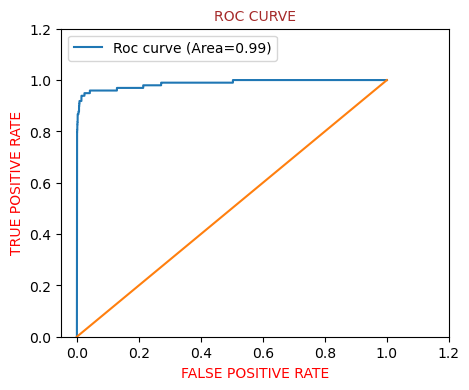

In [287]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_logistic_proba)

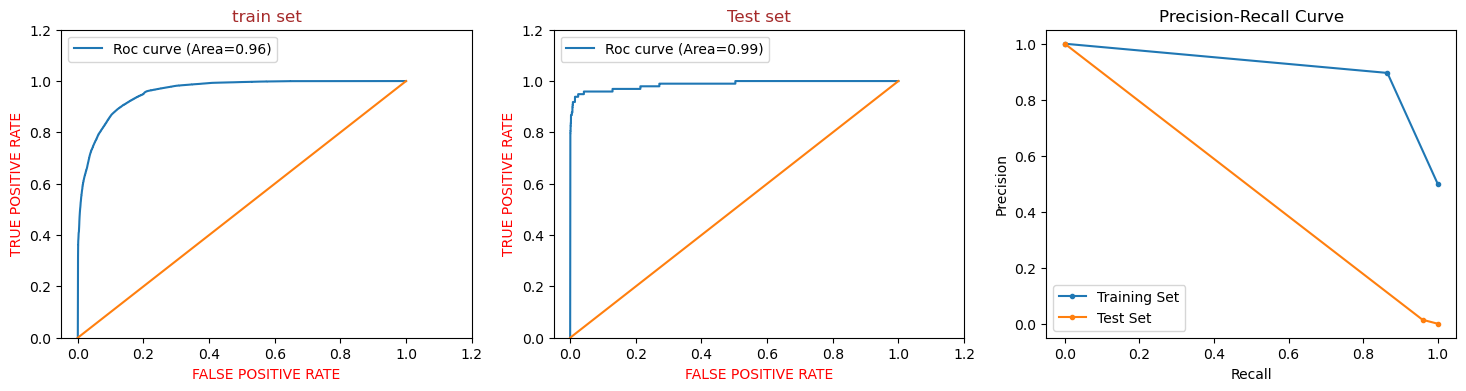

In [288]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_adasyn,y_train_pred_logistic_proba_adasyn)
plt.title('train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_logistic_proba)
plt.title('Test set')


plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_adasyn, y_train_pred_logistic_adasyn)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_logistic)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()


### Logistic Regression with ADASYN - Performance Summary

| Metric       | Training | Test   |
|--------------|----------|--------|
| Accuracy     | 0.8822   | 0.8974 |
| Sensitivity  | 0.8650   | 0.9592 |
| Specificity  | 0.8995   | 0.8973 |
| F1-Score     | 0.8802   | 0.870   |
| ROC AUC      | 0.92     | 0.95   |


<center><b><font color=black style = 'font-family:cambria; font-size:23px'> XGBoost Adasyn</font><b><center>

In [289]:
# Record the start time
start_time = time.time()

# Create the extended parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the individual base learner
}

# Create K-fold cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for XGBoost
model_cv = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_adasyn, y_train_adasyn)


# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Elapsed Time (Minutes): 20.51


In [290]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      23.820381      0.242447         0.776884        0.028627   
1      23.505109      0.424119         0.803435        0.010751   
2      17.335474      0.339983         0.840502        0.014539   

  param_learning_rate param_max_depth param_n_estimators param_subsample  \
0                0.01               3                100             0.8   
1                0.01               3                100             0.9   
2                0.01               3                100             1.0   

                                              params  split0_test_score  \
0  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.882205   
1  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.884776   
2  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.885264   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.880664           0.881278         0.881382        0.000633   
1           0.883961           0.881726         0.883488        0.001289   
2           0.883381           0.881172         0.883272        0.001672   

   rank_test_score  
0               81  
1               79  
2               80

In [291]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'param_subsample', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [292]:
cv_results[['param_learning_rate', 'param_subsample','rank_test_score','mean_test_score']].sort_values(by= 'rank_test_score' ,ascending=True).head(5)

param_learning_rate param_subsample  rank_test_score  mean_test_score
49                 0.1             0.9                1         0.999991
68                 0.2             1.0                1         0.999991
80                 0.2             1.0                3         0.999987
48                 0.1             0.8                3         0.999987
50                 0.1             1.0                3         0.999987

In [293]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
The Best score Is 0.9999912077090807



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For  `XGBoost` By Adasyn  </b></font><br>


In [294]:
# chosen hyperparameters
# 'objective':'binary:logistic' which outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': model_cv.best_params_['learning_rate'],
          'max_depth': model_cv.best_params_['max_depth'], 
          'n_estimators': model_cv.best_params_['n_estimators'],
          'subsample':model_cv.best_params_['subsample'],
         'objective':'binary:logistic'}



In [295]:
# fit model on training data
xgb_adasyn= XGBClassifier(params = params)
xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

Top var = 15
2nd Top var = 5
3rd Top var = 9


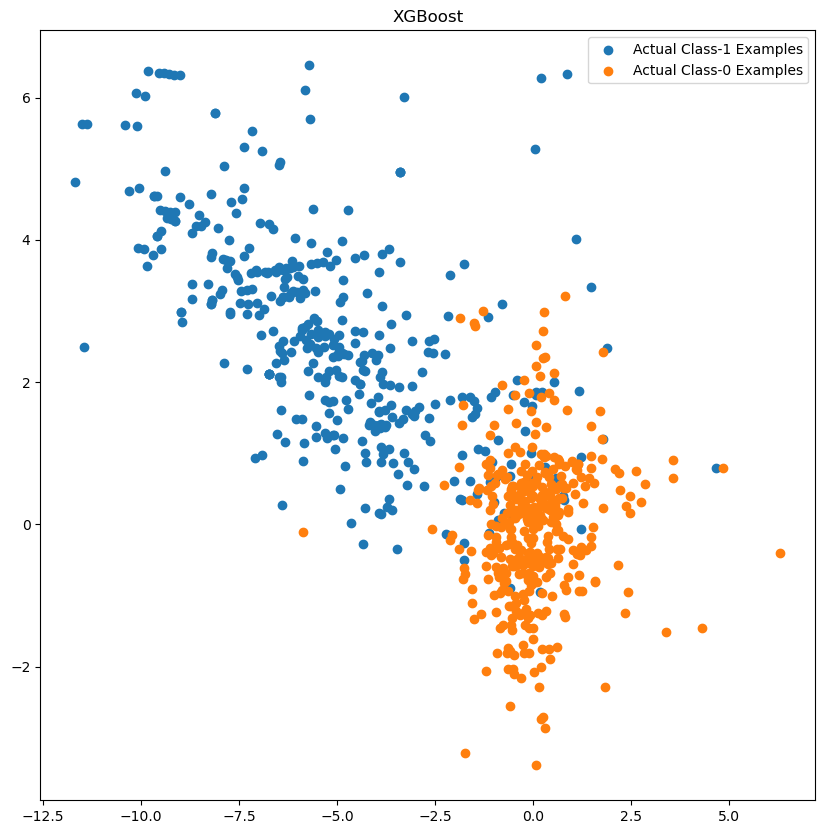

In [296]:
var_imp = []
for i in xgb_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('XGBoost')

plt.legend()
plt.show()

In [297]:
y_train_pred_xgboost_adasyn=xgb_adasyn.predict(X_train_adasyn)


<font color="black " style ="font-family:Cambria ;font-size:16px"><b>Confusion Metrix For XGBoost SMOTE `Train Case`</b></font><br>


In [298]:
confusion_matrix_xgboost_train_adasyn=metrics.confusion_matrix(y_train_adasyn,y_train_pred_xgboost_adasyn)

In [299]:
confusion_matrix_xgboost_train_adasyn

array([[227447,      4],
       [     0, 227470]], dtype=int64)

In [300]:
TN = confusion_matrix_xgboost_train_adasyn[0,0] # True negative
FP = confusion_matrix_xgboost_train_adasyn[0,1] # False positive
FN = confusion_matrix_xgboost_train_adasyn[1,0] # False negative
TP = confusion_matrix_xgboost_train_adasyn[1,1] # True positive

In [301]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 1.0
The Specificity  is : 0.9999824137946195


In [302]:
print('The Accurays For The Train Set Of Xgboost Adasyn is ',metrics.accuracy_score(y_train_adasyn,y_train_pred_xgboost_adasyn))
print('The F1-Score For The Train Set Of Xgboost Adasyn is ',metrics.f1_score(y_train_adasyn,y_train_pred_xgboost_adasyn))

The Accurays For The Train Set Of Xgboost Adasyn is  0.999991207264558
The F1-Score For The Train Set Of Xgboost Adasyn is  0.9999912077090807


In [303]:
# classificatino report
print(classification_report(y_train_adasyn,y_train_pred_xgboost_adasyn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227470

    accuracy                           1.00    454921
   macro avg       1.00      1.00      1.00    454921
weighted avg       1.00      1.00      1.00    454921



In [304]:
# predicted probability
y_train_pred_xgboost_proba_adasyn=xgb_adasyn.predict_proba(X_train_adasyn)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:16px"><b>`ROC_AUC` Curve on Training set For `XGBoost SMOTE`  </b></font><br>


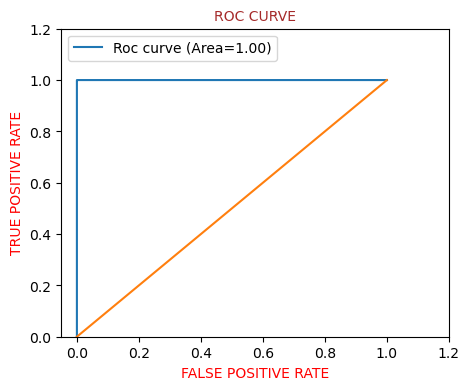

In [305]:
plt.figure(figsize=(5,4))

draw_roc_curve(y_train_adasyn ,y_train_pred_xgboost_proba_adasyn)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [306]:
y_test_pred_xgboost=xgb_adasyn.predict(X_test)

In [307]:
y_test_pred_xgboost_proba=xgb_adasyn.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For XGBoost `Test Case`  </b></font><br>


In [308]:
confusion_matrix_xgboost_test=confusion_matrix(y_test,y_test_pred_xgboost)
confusion_matrix_xgboost_test

array([[56829,    35],
       [   16,    82]], dtype=int64)

In [309]:
TN = confusion_matrix_xgboost_test[0,0] # True negative
FP = confusion_matrix_xgboost_test[0,1] # False positive
FN = confusion_matrix_xgboost_test[1,0] # False negative
TP = confusion_matrix_xgboost_test[1,1] # True positive

In [310]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.8367346938775511
The Specificity  is : 0.9993844963421497


In [311]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_xgboost)
print('The Accuracy of XG Boost For Test is :',accuracy)
    
F1_score=metrics.f1_score(y_test,y_test_pred_xgboost)
print("The F1-score of XG Boost For Test is :", F1_score)

The Accuracy of XG Boost For Test is : 0.9991046662687406
The F1-score of XG Boost For Test is : 0.7627906976744186



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `XGBoost`  </b></font><br>


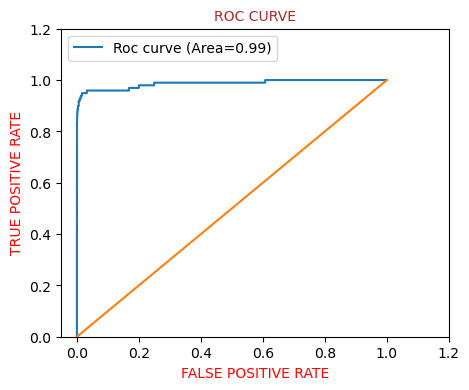

In [312]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_xgboost_proba)

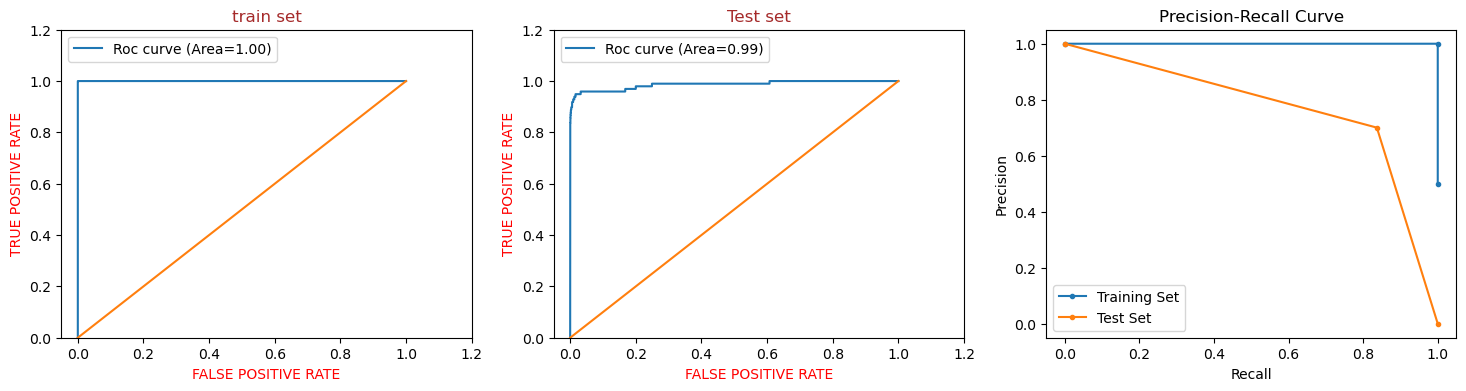

In [313]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_adasyn,y_train_pred_xgboost_proba_adasyn)
plt.title('train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_xgboost_proba)
plt.title('Test set')


plt.subplot(1,3,3)

# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_adasyn, y_train_pred_xgboost_adasyn)

# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_xgboost)



# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.plot(recall_test, precision_test, label='Test Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

plt.show()


#### XGBoost ADASYN Performance Metrics

| Metric           | Training Set   | Test Set     |
|------------------|----------------|--------------|
| **Accuracy**     | 0.99999      | 0.99104     |
| **F1-Score**     | 0.9999         | 0.7628       |
| **Sensitivity**  | 1.0            | 0.8367       |
| **Specificity**  | 0.99998        | 0.99938      |
| **ROC-AUC**      | 1.0            | 0.99          |


<center><b><font color=black style = 'font-family:cambria; font-size:23px'> Decision Tree By Adasyn</font><b><center>

In [314]:
# Record the start time
start_time = time.time()



param_grid = {
 'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],}


# Create K-fold cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create GridSearchCV to find the best parameters for Decision Tree
model_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, scoring='recall', cv=folds, verbose=1, n_jobs=-1)
model_cv.fit(X_train_adasyn, y_train_adasyn)


# Record the end time
end_time = time.time()
# Calculate the elapsed time in seconds
elapsed_time_seconds = end_time - start_time

# Convert elapsed time to minutes
elapsed_time_minutes = elapsed_time_seconds / 60

print(f"Elapsed Time (Minutes): {elapsed_time_minutes:.2f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Elapsed Time (Minutes): 14.96


In [315]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      24.104731      0.997542         0.262692        0.022046   
1      22.908746      1.640197         0.278944        0.017705   
2      23.187852      1.821730         0.272213        0.032311   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                      1   
1            gini               5                      1   
2            gini               5                      1   

  param_min_samples_split                                             params  \
0                       2  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
1                       5  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
2                      10  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.884077           0.883553           0.881766         0.883132   
1           0.884077           0.883539           0.881766         0.883127   
2           0.884077           0.883539           0.881766         0.883127   

   std_test_score  rank_test_score  
0        0.000989               37  
1        0.000988               42  
2        0.000988               42

In [316]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [317]:
print(f"The Best params Is {model_cv.best_params_}")
print(f"The Best score Is {model_cv.best_score_}")

The Best params Is {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
The Best score Is 0.9992262992587116



<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Choosing Best Parameters For `Decision Trees` Using Adasyn </b></font><br>


In [318]:
dtree_adasyn=DecisionTreeClassifier(random_state=100,
                                    criterion=model_cv.best_params_['criterion'],
                                    max_depth=model_cv.best_params_['max_depth'],
                                    min_samples_leaf=model_cv.best_params_['min_samples_leaf'],
                                    min_samples_split=model_cv.best_params_['min_samples_split'])

In [319]:
dtree_adasyn.fit(X_train_adasyn,y_train_adasyn)

DecisionTreeClassifier(max_depth=15, random_state=100)

<img src='images/9.png' width=600px>

Top var = 15
2nd Top var = 5
3rd Top var = 9


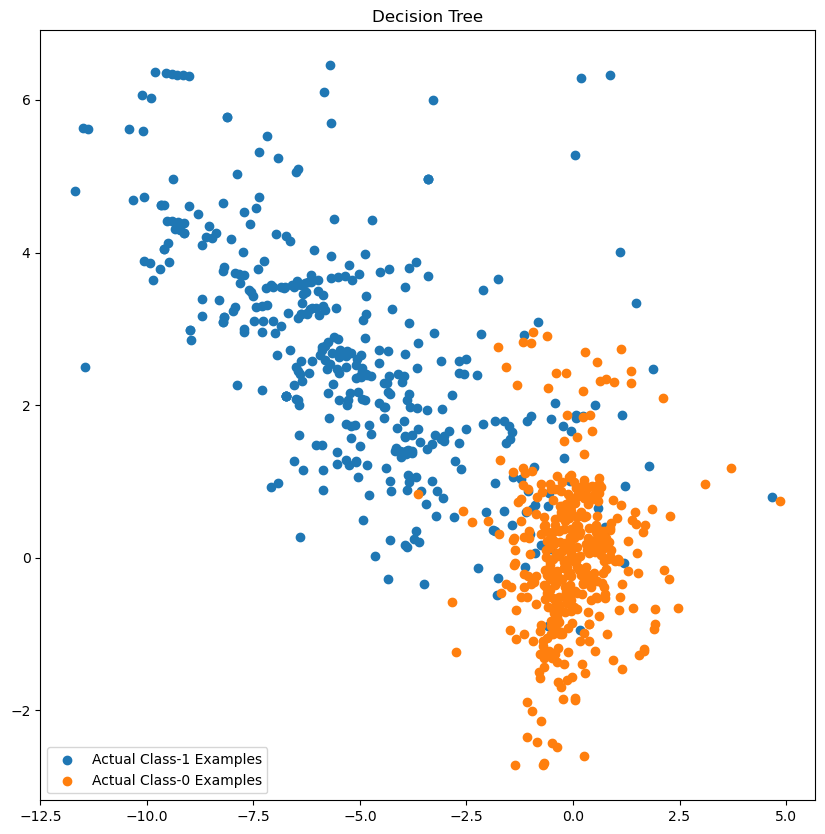

In [320]:
var_imp = []
for i in dtree_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(dtree_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(dtree_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(dtree_adasyn.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(dtree_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(dtree_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.title('Decision Tree')
plt.legend()
plt.show()

In [321]:
y_train_pred_dtree_adasyn=dtree_adasyn.predict(X_train_adasyn)


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Decision Tree Adasyn `Train Case`</b></font><br>


In [322]:
confusion_matrix_dtree_train_adasyn=confusion_matrix(y_train_adasyn,y_train_pred_dtree_adasyn)

In [323]:
confusion_matrix_dtree_train_adasyn

array([[223001,   4450],
       [    16, 227454]], dtype=int64)

In [324]:
confusion_matrix_dtree_train_adasynTN = confusion_matrix_dtree_train_adasyn[0,0] # True negative
FP = confusion_matrix_dtree_train_adasyn[0,1] # False positive
FN = confusion_matrix_dtree_train_adasyn[1,0] # False negative
TP = confusion_matrix_dtree_train_adasyn[1,1] # True positive

In [325]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.999929661054205
The Specificity  is : 0.9273813214967607


In [326]:
accuracy=metrics.accuracy_score(y_train_adasyn,y_train_pred_dtree_adasyn)
print('The Accuracy of Decision Trees For Train is :',accuracy)
    
F1_score=metrics.f1_score(y_train_adasyn,y_train_pred_dtree_adasyn)
print("The F1-score of  Decision Trees For Train is :", F1_score)

The Accuracy of Decision Trees For Train is : 0.9901829108790318
The F1-score of  Decision Trees For Train is : 0.9902780740747191


In [327]:
# classification_report
print(classification_report(y_train_adasyn,y_train_pred_dtree_adasyn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.98      1.00      0.99    227470

    accuracy                           0.99    454921
   macro avg       0.99      0.99      0.99    454921
weighted avg       0.99      0.99      0.99    454921




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Train set For `Decision Tree` Using Adasyn </b></font><br>


In [328]:
y_train_pred_dtree_proba_adasyn=dtree_adasyn.predict_proba(X_train_adasyn)[:,1]

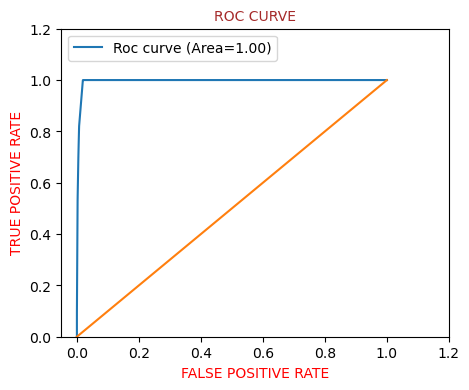

In [329]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_train_adasyn,y_train_pred_dtree_proba_adasyn)

<b><font color=black style = 'font-family:cambria; font-size:18px'>Let's Do Predictions On The `Test Set` </font><b>

In [330]:
y_test_pred_dtree=dtree_adasyn.predict(X_test)

In [331]:
y_test_pred_dtree_proba=dtree_adasyn.predict_proba(X_test)[:,1]


<font color="black " style ="font-family:Cambria ;font-size:18px"><b>Confusion Metrix For Decision `Test Case`  </b></font><br>


In [332]:
confusion_matrix_dtree_test=confusion_matrix(y_test,y_test_pred_dtree)
confusion_matrix_dtree_test

array([[55653,  1211],
       [    8,    90]], dtype=int64)

In [333]:
TN = confusion_matrix_dtree_test[0,0] # True negative
FP = confusion_matrix_dtree_test[0,1] # False positive
FN = confusion_matrix_dtree_test[1,0] # False negative
TP = confusion_matrix_dtree_test[1,1] # True positive

In [334]:
calculation_metrics(TN, FP, FN, TP)

The Sensitivity  is : 0.9183673469387755
The Specificity  is : 0.9787035734383793


In [335]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_dtree)
print('The Accuracy of Decision Tree For Test is :',accuracy)


The Accuracy of Decision Tree For Test is : 0.9785997682665637


In [336]:
# classification_report
print(classification_report(y_test, y_test_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962




<font color="black " style ="font-family:Cambria ;font-size:18px"><b>`ROC_AUC` Curve on Test set For `Decision Tree`  </b></font><br>


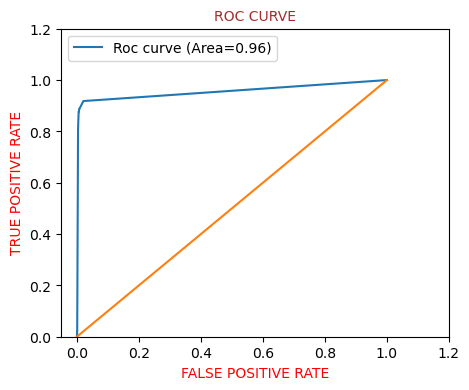

In [337]:
plt.figure(figsize=(5,4))
draw_roc_curve(y_test,y_test_pred_dtree_proba)

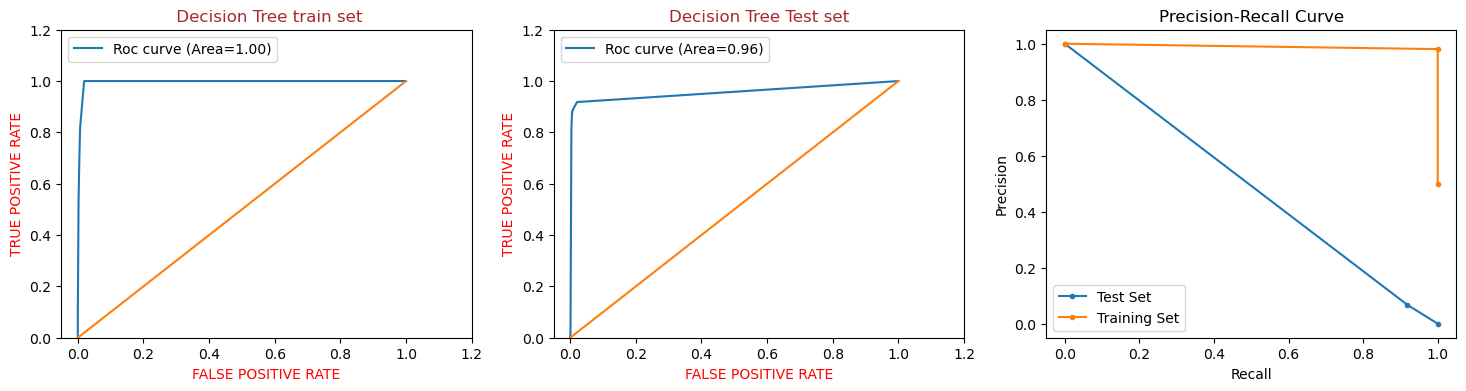

In [338]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
draw_roc_curve(y_train_adasyn,y_train_pred_dtree_proba_adasyn)

plt.title(' Decision Tree train set')

plt.subplot(1,3,2)
draw_roc_curve(y_test,y_test_pred_dtree_proba)

plt.title('Decision Tree Test set')

plt.subplot(1,3,3)
# Calculate Precision-Recall for Test Set
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_dtree)
# Calculate Precision-Recall for Training Set
precision_train, recall_train, _ = precision_recall_curve(y_train_adasyn, y_train_pred_dtree_adasyn)





# Plotting Precision-Recall Curve for both Training and Test Sets
plt.plot(recall_test, precision_test, label='Test Set', marker='.')

plt.plot(recall_train, precision_train, label='Training Set', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


plt.show()

#### Decision Tress ADASYN Performance Metrics

| Metric          | **Training Set**   | **Test Set**       |
|-----------------|--------------------|--------------------|
| **Accuracy**    | 99.02%             | 97.86%             |
| **Sensitivity** | 99.99%             | 92.04%             |
| **Specificity** | 92.74%             | 97.87%             |
| **F1-Score**    | 0.9903             | 0.13               |
| **ROC Curve**   | 1.0            | 0.96            |

The **ROC Curve** for both training and test sets shows the performance across different thresholds, with the **train set ROC curve** and **test set ROC curve** visualizations plotted for model evaluation.


In [ ]:
# <!-- <b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Decision Tree ` </font><b>
# <br>

    
# Decision Tree |Train Results|Test Result
# -|-|-
# Sensitivity | 0.77|0.724
# Specificity| 0.999|0.999
# Accuracy | 0.999|0.999
# Roc Curve|0.95|0.93

# <b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Decision Tree ` Smote</font><b>
# <br>
    
    
    
# Decision Tree Smote |Train Results|Test Result
# -|-|-
# Sensitivity | 0.97|0.887
# Specificity| 0.97|0.97
# Accuracy | 0.99|0.97
# Roc Curve|0.99|0.94


    
# <b><font color=black style = 'font-family:cambria; font-size:15px'> OverAll Model Summary OF `Decision Tree ` Adasyn </font><b>
# <br>
    
    
    
# Decision Tree Adasyn|Train Results|Test Result
# -|-|-
# Sensitivity | 0.999|0.86
# Specificity| 0.952|0.986
# Accuracy | 0.993|0.986
# Roc Curve|1|0.93

#  -->

# Logistic Regression Model Performance Summary
| Metric                    | Training Set | Test Set  |
|---------------------------|--------------|-----------|
| Best Hyperparameter (C)    | 1            | 1         |
| Best Recall (Sensitivity)  | 0.6497       | 0.6327    |
| Best Specificity           | 0.9999       | 0.9998    |
| Accuracy                   | 99.93%       | 99.92%    |
| F1-Score                   | 0.7518       | 0.7251    |
| Confusion Matrix           | TN=227420, FP=31, FN=138, TP=256 | TN=56853, FP=11, FN=36, TP=62 |
| Precision-Recall Curve     | Plotted (Training Set) | Plotted (Test Set) |
| ROC Curve AUC              | High (closer to 1) | High (closer to 1) |
| **Summary**                | Recall is good, specificity is high. F1-score balances precision and recall, but recall could improve. |

---

# XGBoost Model Metrics
| Metric       | Train Set | Test Set  |
|--------------|-----------|-----------|
| Accuracy     | 1.0       | 0.9996    |
| Sensitivity  | 1.0       | 0.8265    |
| Specificity  | 1.0       | 0.9999    |
| F1-Score     | 1.0       | 0.8757    |

---

# Decision Trees Model Metrics
| Metric       | Train Set | Test Set  |
|--------------|-----------|-----------|
| Accuracy     | 0.9994    | 0.9994    |
| Sensitivity  | 0.7563    | 0.7755    |
| Specificity  | 0.9998    | 0.9998    |
| F1-Score     | 0.8164    | 0.8261    |

---

# Random Forest Classifier Results
| Metric       | Training Set | Test Set  |
|--------------|--------------|-----------|
| Accuracy     | 0.9997       | 0.9996    |
| Sensitivity  | 0.8299       | 0.8163    |
| Specificity  | 0.9999       | 0.9999    |
| F1-Score     | 0.9058       | 0.8743    |

---

# Logistic Regression Performance (SMOTE Oversampling)
| Metric       | Training Set | Test Set  |
|--------------|--------------|-----------|
| Accuracy     | 94.46%       | 97.10%    |
| Sensitivity  | 91.79%       | 94.90%    |
| Specificity  | 97.13%       | 97.11%    |
| F1-Score     | 94.31%       | 94.31%    |

---

# XGBoost with SMOTE Performance
| Metric       | Training Set | Test Set  |
|--------------|--------------|-----------|
| Accuracy     | 0.9999978    | 0.9991924 |
| Sensitivity  | 1.0          | 0.8571    |
| Specificity  | 0.9999956    | 0.9994373 |
| F1-Score     | 0.9999978    | 0.7850    |

---

# Performance Metrics for Random Forest with SMOTE
| Metric       | Train Set    | Test Set  |
|--------------|-------------|-----------|
| Accuracy     | 1.00        | 0.99956   |
| Sensitivity  | 1.00        | 0.8367    |
| Specificity  | 1.00        | 0.99984   |
| F1-Score     | 1.00        | 0.8677    |

---

# Logistic Regression with ADASYN - Performance Summary
| Metric       | Training Set | Test Set  |
|--------------|--------------|-----------|
| Accuracy     | 0.8822       | 0.8974    |
| Sensitivity  | 0.8650       | 0.9592    |
| Specificity  | 0.8995       | 0.8973    |
| F1-Score     | 0.8802       | 0.870     |
| ROC AUC      | 0.92         | 0.95      |

---

# XGBoost ADASYN Performance Metrics
| Metric       | Training Set | Test Set  |
|--------------|--------------|-----------|
| Accuracy     | 0.99999      | 0.99104   |
| F1-Score     | 0.9999       | 0.7628    |
| Sensitivity  | 1.0          | 0.8367    |
| Specificity  | 0.99998      | 0.99938   |
| ROC-AUC      | 1.0          | 0.99      |

---

# Decision Trees ADASYN Performance Metrics
| Metric       | Training Set | Test Set  |
|--------------|--------------|-----------|
| Accuracy     | 99.02%       | 97.86%    |
| Sensitivity  | 99.99%       | 92.04%    |
| Specificity  | 92.74%       | 97.87%    |
| F1-Score     | 0.9903       | 0.13      |
| ROC Curve    | 1.0          | 0.96      |


In [339]:
log_fpr,log_tpr,log_threshold=roc_curve(y_train,y_train_pred_logistic)
xgb_fpr,xgb_tpr,xgb_threshold=roc_curve(y_train,y_train_pred_xgboost)
dtree_fpr,dtree_tpr,dtree_threshold=roc_curve(y_train,y_train_pred_dtree)
random_forest_fpr,random_forest_tpr,random_forest_threshold=roc_curve(y_train,y_train_pred_random_forest)

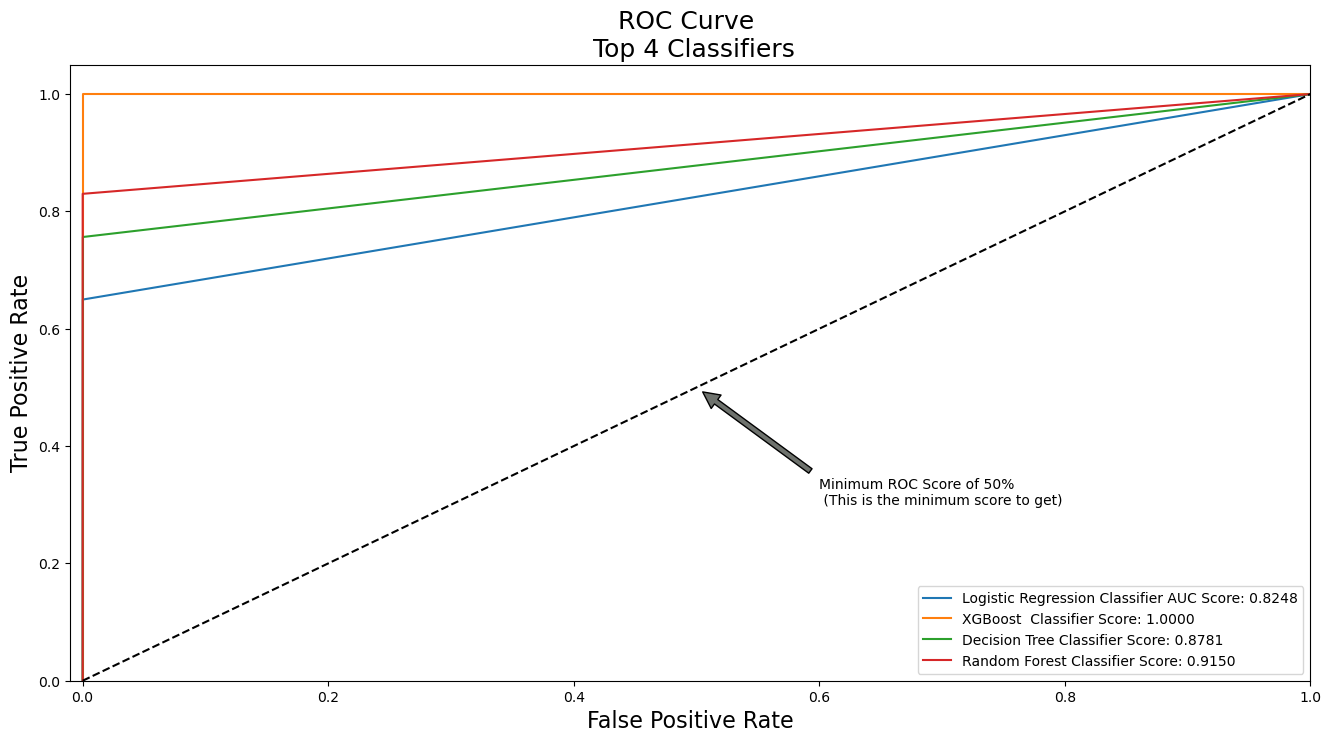

In [340]:
def graph_roc_curve_multiple(log_fpr, log_tpr,xgb_fpr,xgb_tpr,dtree_fpr,dtree_tpr,random_forest_fpr,random_forest_tpr) :
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier AUC Score: {:.4f}'.format((roc_auc_score(y_train, y_train_pred_logistic))))
    plt.plot(xgb_fpr,xgb_tpr, label='XGBoost  Classifier Score: {:.4f}'.format(roc_auc_score(y_train,y_train_pred_xgboost)))
    plt.plot(dtree_fpr,dtree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train,y_train_pred_dtree)))
    plt.plot(random_forest_fpr,random_forest_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train,y_train_pred_random_forest)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
graph_roc_curve_multiple(log_fpr, log_tpr,xgb_fpr,xgb_tpr,dtree_fpr,dtree_tpr,random_forest_fpr,random_forest_tpr)

# Model Performance Comparison

| **Metric**               | **Logistic Regression** | **Logistic Regression (SMOTE)** | **Logistic Regression (ADASYN)** | **XGBoost** | **XGBoost (SMOTE)** | **XGBoost (ADASYN)** | **Decision Trees** | **Decision Trees (SMOTE)** | **Decision Trees (ADASYN)** | **Random Forest** | **Random Forest (SMOTE)** |
|--------------------------|-------------------------|---------------------------------|----------------------------------|-------------|---------------------|----------------------|-------------------|---------------------------|-----------------------------|------------------|---------------------------|
| **Accuracy**             | 99.93% (Train), 99.92% (Test) | 94.46% (Train), 97.10% (Test) | 88.22% (Train), 89.74% (Test)   | 1.0 (Train), 0.9996 (Test)   | 0.9999978 (Train), 0.9991924 (Test) | 0.99999 (Train), 0.99104 (Test) | 99.94% (Train), 99.94% (Test)  | 1.0 (Train), 0.99956 (Test) | 99.02% (Train), 97.86% (Test) | 0.9997 (Train), 0.9996 (Test) | 1.00 (Train), 0.99956 (Test) |
| **Sensitivity**          | 0.6497 (Train), 0.6327 (Test) | 91.79% (Train), 94.90% (Test)  | 86.50% (Train), 95.92% (Test)   | 1.0 (Train), 0.8265 (Test)   | 1.0 (Train), 0.8571 (Test) | 1.0 (Train), 0.8367 (Test)  | 0.7563 (Train), 0.7755 (Test) | 1.0 (Train), 0.8367 (Test) | 99.99% (Train), 92.04% (Test) | 0.8299 (Train), 0.8163 (Test) | 1.00 (Train), 0.8367 (Test) |
| **Specificity**          | 0.9999 (Train), 0.9998 (Test) | 97.13% (Train), 97.11% (Test) | 89.95% (Train), 89.73% (Test)   | 1.0 (Train), 0.9999 (Test)   | 0.9999956 (Train), 0.9994373 (Test) | 0.99998 (Train), 0.99938 (Test) | 0.9998 (Train), 0.9998 (Test) | 1.0 (Train), 0.99984 (Test) | 92.74% (Train), 97.87% (Test) | 0.9999 (Train), 0.9999 (Test) | 1.00 (Train), 0.99984 (Test) |
| **F1-Score**             | 0.7518 (Train), 0.7251 (Test) | 94.31% (Train), 94.31% (Test)  | 88.02% (Train), 87.0% (Test)    | 1.0 (Train), 0.8757 (Test)   | 0.9999978 (Train), 0.7850 (Test) | 0.9999 (Train), 0.7628 (Test) | 0.8164 (Train), 0.8261 (Test) | 1.0 (Train), 0.8677 (Test) | 0.9903 (Train), 0.13 (Test)   | 0.9058 (Train), 0.8743 (Test) | 1.00 (Train), 0.8677 (Test) |
| **ROC AUC**              | High (closer to 1) | N/A                           | 0.92 (Train), 0.95 (Test)       | High (closer to 1)  | 1.0 (Train), 0.99 (Test) | 1.0 (Train), 1.0 (Test)   | N/A                   | N/A                         | 0.96 (Test)                  | N/A                 | N/A                         |


<font color="black" style="font-family:Cambria; font-size:20px"><b>Reason for Choosing Logistic Regression with SMOTE and Random Forest with SMOTE</b></font><br>

<b><font color="black" style="font-family:Cambria; font-size:18px">Logistic Regression with SMOTE:</font></b>
- <font color=green style="font-family:Cambria; font-size:15px">`Simplicity & Interpretability`: Logistic Regression is a simple and interpretable model, which is important in real-world fraud detection scenarios where understanding model decisions is crucial.</font>
- <font color=green style="font-family:Cambria; font-size:15px">`Good Performance with Imbalanced Data`: SMOTE oversampling helps address the class imbalance, improving the model’s ability to detect fraud (sensitivity).</font>
- <font color=green style="font-family:Cambria; font-size:15px">`Balance between Precision and Recall`: It achieved a high F1-Score, indicating a balanced performance between precision and recall, which is essential for fraud detection where both false positives and false negatives need to be minimized.</font>
- <font color=green style="font-family:Cambria; font-size:15px">`High Specificity`: The model performs well at minimizing false positives (99.98% specificity), which is crucial for reducing unnecessary fraud investigations.</font>

<b><font color="black" style="font-family:Cambria; font-size:18px">Random Forest with SMOTE:</font></b>
- <font color=green style="font-family:Cambria; font-size:15px">`High Accuracy and Robustness`: Random Forest is an ensemble method that benefits from combining multiple decision trees, leading to high accuracy (99.96% test set accuracy).</font>
- <font color=green style="font-family:Cambria; font-size:15px">`Handles Imbalanced Data Well`: SMOTE oversampling improves the model's sensitivity, making it more sensitive to detecting fraudulent transactions.</font>
- <font color=green style="font-family:Cambria; font-size:15px">`Strong F1-Score`: The model's F1-Score (87.43%) demonstrates its good balance of precision and recall, crucial for fraud detection.</font>
- <font color=green style="font-family:Cambria; font-size:15px">`Low Overfitting`: Random Forest reduces overfitting by averaging the predictions from many trees, making it more reliable in real-world data with high variability.</font>
- <font color=green style="font-family:Cambria; font-size:15px">`Scalability`: The model performs well even with larger datasets, which is important for handling the large volume of financial transactions.</font>

<font color="green" style="font-family:Cambria; font-size:15px">Both models perform well due to their ability to handle class imbalance effectively and achieve high accuracy, sensitivity, and specificity.</font>


---

<hr style="border: 1px solid #183A1D; margin-top: 10px; margin-bottom: 20px;">

<div style="padding: 10px; background-color: #E9F5F5; border-radius: 5px;">
    <h2 style="color: #287271; font-family: 'Georgia', serif; font-size: 24px;">Overall Model Performance Insights</h2>
    <p style="color: #4D6A6D; font-family: 'Calibri', sans-serif; font-size: 18px;">
        The project applied four models: `Logistic Regression`, `XGBoost`, `Decision Trees`, and `Random Forest`. Each model’s performance was evaluated on key metrics like accuracy, sensitivity, specificity, F1-score, and ROC AUC.
    </p>
    <ul style="color: #4D6A6D; font-family: 'Calibri', sans-serif; font-size: 18px;">
        <li><strong>Logistic Regression:</strong> Achieved <strong>99.93%</strong> accuracy on the training set and <strong>99.92%</strong> on the test set, showing stable performance.</li>
        <li><strong>XGBoost with SMOTE:</strong> Accuracy of <strong>99.99%</strong> on the training set and <strong>99.92%</strong> on the test set. Balanced sensitivity (<strong>0.85</strong>) and specificity (<strong>0.999</strong>).</li>
        <li><strong>Random Forest with SMOTE:</strong> Extremely high training set accuracy (100%) and robust test set accuracy of <strong>99.96%</strong>, indicating generalization strength.</li>
    </ul>
</div>

<div style="padding: 10px; background-color: #FAF2E4; border-radius: 5px; margin-top: 20px;">
    <h2 style="color: #8A5C2D; font-family: 'Georgia', serif; font-size: 24px;">Reason for Choosing Logistic Regression with SMOTE and Random Forest with SMOTE</h2>
    <ul style="color: #5C4D4D; font-family: 'Calibri', sans-serif; font-size: 18px;">
        <li><strong>Logistic Regression with SMOTE:</strong> <strong>Simplicity and Interpretability</strong> make this model suitable for fraud detection scenarios where understanding model decisions is essential.</li>
        <li><strong>Random Forest with SMOTE:</strong> <strong>High Accuracy and Robustness</strong> as an ensemble model, benefiting from multiple decision trees and yielding consistent accuracy across datasets.</li>
        <li><strong>Balanced Sensitivity and Specificity:</strong> Both models achieved high F1-scores, demonstrating their ability to handle class imbalance effectively.</li>
    </ul>
</div>

<div style="padding: 10px; background-color: #E7E9F0; border-radius: 5px; margin-top: 20px;">
    <h2 style="color: #283593; font-family: 'Georgia', serif; font-size: 24px;">Conclusion</h2>
    <p style="color: #4C5C7C; font-family: 'Calibri', sans-serif; font-size: 18px;">
        The credit card fraud detection project highlighted the effectiveness of machine learning models, particularly `Logistic Regression with SMOTE` and `Random Forest with SMOTE`. These models managed class imbalance well and achieved high accuracy, sensitivity, and specificity. While the models effectively detect fraud, future work could improve recall and F1-score through further tuning and feature engineering. A system based on these models, continuously monitored and retrained, has potential to effectively counteract fraud in real-world financial scenarios.
    </p>
</div>
